# Lending Club Case Study - Exploratory Data Analysis

**Group Members:**
1. Akash Apoorv Yadav
2. Anoop O

### Assignment:

You work for a consumer finance company **Lending Club** which specialises in lending various types of loans to urban customers. This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. When the company receives a loan application, the company has to **make a decision for loan approval based on the applicant’s profile.**
When a person applies for a loan, there are two types of decisions that could be taken by the company:

**1. Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

**Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)

**Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

**Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

**2. Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### Business Objectives:
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders.

Objective is to i**dentify the risky loan applicants at the time of loan application** so that such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, **to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.**  The company can utilise this knowledge for its portfolio and risk assessment. And thus minimise the risk of losing money while lending to customers.


# Exploratory Data Analysis



## Data Acquisition and Initial Exploration

### Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.gridspec as gridspec
%matplotlib inline

In [10]:
# Imports to remove
# from google.colab import drive

In [11]:
# # Cell to remove
# folder_path = '/content/drive/My Drive/LendingClubCaseStudy'
# drive.mount('/content/drive', force_remount=True)
# %cd $folder_path

### Loading Data

In [13]:
loan_df = pd.read_csv('loan.csv', low_memory=False)

### Preliminary Analysis

In [15]:
loan_df.head(10)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   
5  1075269    1311441       5000         5000           5000.0   36 months   
6  1069639    1304742       7000         7000           7000.0   60 months   
7  1072053    1288686       3000         3000           3000.0   36 months   
8  1071795    1306957       5600         5600           5600.0   60 months   
9  1071570    1306721       5375         5375           5350.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   
5    7.90%       156.46     A        A4  ...                NaN   
6   15.96%       170.08     C        C5  ...                NaN   
7   18.64%       109.43     E        E1  ...                NaN   
8   21.28%       152.39     F        F2  ...                NaN   
9   12.69%       121.45     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   
5                NaN            NaN               NaN                  0.0   
6                NaN            NaN               NaN                  0.0   
7                NaN            NaN               NaN                  0.0   
8                NaN            NaN               NaN                  0.0   
9                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   
5       0.0             NaN               NaN            NaN   
6       0.0             NaN               NaN            NaN   
7       0.0             NaN               NaN            NaN   
8       0.0             NaN               NaN            NaN   
9       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  
5                        NaN  
6                        NaN  
7                        NaN  
8                        NaN  
9                        NaN  

[10 rows x 111 columns]

In [16]:
loan_df.shape

(39717, 111)

In [17]:
loan_df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [18]:
loan_df.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

## Data Cleaning


Let's get the percentage of missing values and plot it on a Histogram

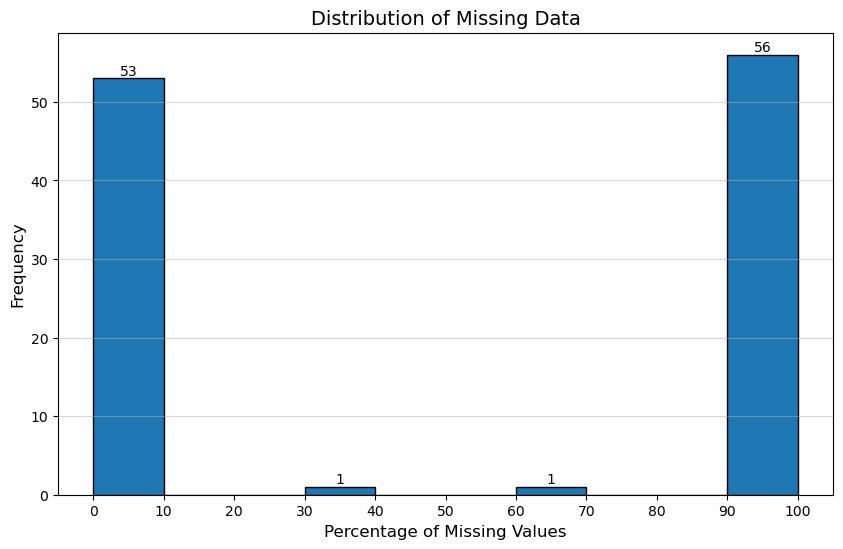

In [21]:
col_data_missing_percentage = loan_df.isna().sum() * 100 / len(loan_df)

plt.figure(figsize=(10, 6))
counts, edges, bars = plt.hist(col_data_missing_percentage, bins=10, edgecolor='black')
plt.bar_label(bars, labels=[int(count) if count > 0 else '' for count in counts])

plt.xlabel("Percentage of Missing Values", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Missing Data", fontsize=14)

plt.xticks(range(0, 101, 10))

plt.grid(axis='y', alpha=0.5)
plt.show()

From the histogram we have the following findings.

1.   56 columns have more than 90% missing values, we will simply drop these columns
2.   2 columns has missing values between 30%-70%, we will review these in next steps
3. 53 columns have less that 10% missing values, these are the prime candidates for data cleaning.



Listing the columns with more than 90% missing values to color-code the Data Dictionary

In [24]:
cols_to_remove = col_data_missing_percentage[
    (col_data_missing_percentage >= 90)
].index.tolist()
print(cols_to_remove)
len(cols_to_remove)

['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort'

56

Listing the columns with missing values between 30% and 70%

In [26]:
col_data_missing_percentage[(col_data_missing_percentage >= 30) & (col_data_missing_percentage <= 70)]

desc                      32.585543
mths_since_last_delinq    64.662487
dtype: float64

Analysing **mths_since_last_delinq**

In [28]:
print(loan_df.mths_since_last_delinq.dtype)
loan_df.mths_since_last_delinq.value_counts()

float64


mths_since_last_delinq
0.0      443
15.0     252
30.0     247
23.0     247
24.0     241
        ... 
89.0       1
107.0      1
85.0       1
97.0       1
95.0       1
Name: count, Length: 95, dtype: int64

**Decision:** **Drop mths_since_last_delinq**
**Reasons:**  

*   Even though it seems a promising variable, bias could be introduced as borrowers who are never delinquent will never show up on this list also
*   64.66% missing values in the column

Analysing **desc**

In [31]:
loan_df.desc.value_counts()

desc
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           210
Debt Consolidation                                                                                                                                                                  

**Decision**: **Drop desc**
**Reasons**:  

*   Missing values of 33%
*   purpose column provides concise information of the desc col

Considering the previous analysis we can safetly remove all columns with missing values more than 10%

In [34]:
# Drop columns with more than 90% missing values
threshold = 0.9
loan_df = loan_df.dropna(thresh=len(loan_df) * threshold, axis=1)

# Display summary statistics after dropping columns
print(round(loan_df.isna().sum() * 100 / len(loan_df), 2).sort_values(ascending=False))
loan_df.shape

emp_title                     6.19
emp_length                    2.71
pub_rec_bankruptcies          1.75
last_pymnt_d                  0.18
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
revol_util                    0.13
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
total_rec_prncp               0.00
out_prncp                     0.00
initial_list_status           0.00
out_prncp_inv                 0.00
total_acc                     0.00
total_pymnt                   0.00
total_pymnt_inv               0.00
collection_recovery_fee       0.00
total_rec_int                 0.00
total_rec_late_fee            0.00
recoveries                    0.00
pub_rec                       0.00
last_pymnt_amnt               0.00
policy_code                   0.00
application_type              0.00
acc_now_delinq                0.00
delinq_amnt                   0.00
revol_bal                     0.00
id                  

(39717, 53)

### Feature Selection


Let's look for constant features

In [37]:
constant = loan_df.loc[:, loan_df.nunique() == 1]
constant.head()

pymnt_plan initial_list_status  collections_12_mths_ex_med  policy_code  \
0          n                   f                         0.0            1   
1          n                   f                         0.0            1   
2          n                   f                         0.0            1   
3          n                   f                         0.0            1   
4          n                   f                         0.0            1   

  application_type  acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  \
0       INDIVIDUAL               0                       0.0            0   
1       INDIVIDUAL               0                       0.0            0   
2       INDIVIDUAL               0                       0.0            0   
3       INDIVIDUAL               0                       0.0            0   
4       INDIVIDUAL               0                       0.0            0   

   tax_liens  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0

In [38]:
drop_columns = constant.columns.tolist()
drop_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

Now let's look at features where there are no unique values (id, member_id, url)

In [40]:
none_unique = loan_df.loc[:, loan_df.nunique() == len(loan_df)]
none_unique.head()

id  member_id                                                url
0  1077501    1296599  https://lendingclub.com/browse/loanDetail.acti...
1  1077430    1314167  https://lendingclub.com/browse/loanDetail.acti...
2  1077175    1313524  https://lendingclub.com/browse/loanDetail.acti...
3  1076863    1277178  https://lendingclub.com/browse/loanDetail.acti...
4  1075358    1311748  https://lendingclub.com/browse/loanDetail.acti...

Decision: Drop columns id, member_id and url as they don't have any impact on loan default analysis

In [42]:
drop_columns.extend(['id', 'member_id', 'url'])

Analysing zipcode

In [44]:
loan_df.zip_code.value_counts()

zip_code
100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
        ... 
381xx      1
378xx      1
739xx      1
396xx      1
469xx      1
Name: count, Length: 823, dtype: int64

**Decision**: Drop zip_code column<br>
**Reasons**:

*   Suffixed with XX does not give real zip code information
*   redundant column as addr_state column provides similar value



In [46]:
drop_columns.append('zip_code')

Dropping the columns
Columns to be dropped:
1. **id**: a random identifier, does not contribute to analysis
2. **member_id**: a random identifier, does not contribute to analysis
3. pymnt_plan: Constant Feature with value 'n' for whole column, can be removed
4. url: does not contribute to loan default analysis
5. zip_code: redundant with addr_state, does not contribute to analysis
6. initial_list_status: Constant Feature with value 'f' for whole column, can be removed
7. policy_code: Constant Feature with value '1' for whole column, can be removed
8. application_type: Constant Feature with value 'INDIVIDUAL' for whole column, can be removed
9. acc_now_delinq: Constant Feature with value '0' for whole column, can be removed
10. delinq_amnt: Constant Feature with value '0' for whole column, can be removed

In [48]:
loan_df.drop(columns=drop_columns, inplace=True)
loan_df.shape

(39717, 40)

We are now left with 40 columns for further analysis.

In [50]:
loan_df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0       5000         5000           4975.0   36 months   10.65%       162.87   
1       2500         2500           2500.0   60 months   15.27%        59.83   
2       2400         2400           2400.0   36 months   15.96%        84.33   
3      10000        10000          10000.0   36 months   13.49%       339.31   
4       3000         3000           3000.0   60 months   12.69%        67.79   

  grade sub_grade                 emp_title emp_length  ... total_pymnt_inv  \
0     B        B2                       NaN  10+ years  ...         5833.84   
1     C        C4                     Ryder   < 1 year  ...         1008.71   
2     C        C5                       NaN  10+ years  ...         3005.67   
3     C        C1       AIR RESOURCES BOARD  10+ years  ...        12231.89   
4     B        B5  University Medical Group     1 year  ...         3513.33   

   total_rec_prncp total_rec_int total_rec_late_fee recoveries  \
0          5000.00        863.16               0.00       0.00   
1           456.46        435.17               0.00     117.08   
2          2400.00        605.67               0.00       0.00   
3         10000.00       2214.92              16.97       0.00   
4          2475.94       1037.39               0.00       0.00   

  collection_recovery_fee last_pymnt_d last_pymnt_amnt  last_credit_pull_d  \
0                    0.00       Jan-15          171.62              May-16   
1                    1.11       Apr-13          119.66              Sep-13   
2                    0.00       Jun-14          649.91              May-16   
3                    0.00       Jan-15          357.48              Apr-16   
4                    0.00       May-16           67.79              May-16   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 40 columns]

### Handling Missing Values

In [52]:
col_data_missing_percentage = loan_df.isna().sum() * 100 / len(loan_df)
remaining_cols_with_missing_values = col_data_missing_percentage[col_data_missing_percentage != 0].sort_values(ascending=False).index.tolist()
loan_df[remaining_cols_with_missing_values].nunique()

emp_title               28820
emp_length                 11
pub_rec_bankruptcies        3
last_pymnt_d              101
revol_util               1089
title                   19615
last_credit_pull_d        106
dtype: int64

**emp_title**: The job title supplied by the Borrower when applying for the loan.

As it contains borrower's job titles, let us remove the rows which are not available

It is not a categorical column

In [54]:
loan_df.dropna(subset=['emp_title'], inplace=True)

In [55]:
loan_df.emp_title.value_counts()

emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: count, Length: 28820, dtype: int64

In [56]:
loan_df.emp_title.isna().sum()

0

**emp_length**: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. The data however is in object format with data like 10+ years, we will convert it to int

It is clearly a categorical column. Let us remove the rows with missing data for this column.

In [58]:
loan_df.emp_length.isna().sum()

56

In [59]:
loan_df.dropna(subset=['emp_length'], inplace=True)

In [60]:
emp_length_list = loan_df.emp_length.value_counts().index.tolist()
print(emp_length_list)
emp_length_list.append(emp_length_list.pop(0))
emp_length_list.insert(1, emp_length_list.pop(5))
emp_length_dict = {}
for item in range(0, 11, 1):
  emp_length_dict[emp_length_list[item]] = item
emp_length_dict

['10+ years', '2 years', '< 1 year', '3 years', '4 years', '5 years', '1 year', '6 years', '7 years', '8 years', '9 years']


{'2 years': 0,
 '1 year': 1,
 '< 1 year': 2,
 '3 years': 3,
 '4 years': 4,
 '5 years': 5,
 '6 years': 6,
 '7 years': 7,
 '8 years': 8,
 '9 years': 9,
 '10+ years': 10}

In [61]:
loan_df.emp_length = loan_df.emp_length.map(emp_length_dict)

In [62]:
loan_df.emp_length.value_counts()

emp_length
10    8535
0     4273
2     4201
3     3982
4     3357
5     3177
1     3134
6     2158
7     1722
8     1435
9     1228
Name: count, dtype: int64

**pub_rec_bankruptcies**: Number of public record bankruptcies

This column is a categorical variable and has 654 missing values. But we cannot impute any values to it therefore we will drop the rows.

We will also convert the type of this feature for float64 to int

In [64]:
loan_df.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    35039
1.0     1502
2.0        7
Name: count, dtype: int64

In [65]:
loan_df.pub_rec_bankruptcies.isna().sum()

654

In [66]:
loan_df.dropna(subset=['pub_rec_bankruptcies'], inplace=True)

In [67]:
loan_df.pub_rec_bankruptcies = loan_df.pub_rec_bankruptcies.astype('int32')

In [68]:
loan_df.pub_rec_bankruptcies.dtype

dtype('int32')

In [69]:
col_data_missing_percentage = loan_df.isna().sum() * 100 / len(loan_df)
col_data_missing_percentage[col_data_missing_percentage>0].sort_values(ascending=False)

last_pymnt_d    0.175112
revol_util      0.125862
title           0.024625
dtype: float64

As the percentage of remaining missing data is very low compared to the entire dataset, we can eliminate these rows instead of imputing any values.

In [71]:
loan_df.dropna(subset=['last_pymnt_d', 'revol_util', 'title'], inplace=True)

In [72]:
col_data_missing_percentage = loan_df.isna().sum() * 100 / len(loan_df)
col_data_missing_percentage[col_data_missing_percentage>0].sort_values(ascending=False)

Series([], dtype: float64)

In [73]:
loan_df.drop_duplicates(inplace=True)

Now we don't have any missing data across the dataset, let us observe the new shape of loan_df

In [75]:
loan_df.shape

(36433, 40)

### Fixing Incorrect Datatypes

int_rate column is of type object but should be of type float, removing % symbol and converting to float

In [78]:
loan_df.int_rate = loan_df.int_rate.str.replace('%', '').astype(float)

revol_util column is of type object but should be of type float, removing % symbol and converting to float

In [80]:
loan_df.revol_util = loan_df.revol_util.str.replace('%', '').astype(float)

term column is of type object but should be of type int, removing ' months' and converting to int

In [82]:
loan_df.term = loan_df.term.str.replace(' months', '').astype(int)

### Identifying and formatting date columns

In [84]:
loan_df[["issue_d","earliest_cr_line", "last_pymnt_d", "last_credit_pull_d"]].value_counts()

issue_d  earliest_cr_line  last_pymnt_d  last_credit_pull_d
Jun-11   Jan-97            Jul-14        Jul-14                4
Oct-11   Nov-98            May-16        May-16                4
Sep-11   Aug-98            Sep-14        Sep-14                4
Jan-11   Dec-98            Jan-14        Jan-14                4
Sep-11   Mar-99            May-16        May-16                4
                                                              ..
Jan-10   Dec-88            Jan-13        Feb-13                1
         Dec-73            Dec-10        Dec-10                1
         Dec-06            Jan-12        Dec-11                1
         Dec-04            Mar-13        Mar-13                1
Jun-10   Jun-89            Sep-12        Mar-16                1
Name: count, Length: 35270, dtype: int64

In [85]:
datetime_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
loan_df[datetime_columns] = loan_df[datetime_columns].apply(pd.to_datetime, format='%b-%y')

In [86]:
loan_df[datetime_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             36433 non-null  datetime64[ns]
 1   earliest_cr_line    36433 non-null  datetime64[ns]
 2   last_pymnt_d        36433 non-null  datetime64[ns]
 3   last_credit_pull_d  36433 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


**issue_d**: The month in which the loan was funded. Let's split it into issue_d_year and issue_d_month

In [88]:
loan_df['issue_d_year'] = loan_df['issue_d'].dt.year
loan_df['issue_d_month'] = loan_df['issue_d'].dt.month

**earliest_cr_line:** The month the borrower's earliest reported credit line was opened. Splitting the column into two earliest_cr_line_year and earliest_cr_line_month

In [90]:
loan_df['earliest_cr_line_year'] = loan_df['earliest_cr_line'].dt.year
loan_df['earliest_cr_line_month'] = loan_df['earliest_cr_line'].dt.month

last_pymnt_d: Last month payment was received, splitting this col into last_pymnt_d_month and last_pymnt_d_year

In [92]:
loan_df['last_pymnt_d_month'] = loan_df['last_pymnt_d'].dt.month
loan_df['last_pymnt_d_year'] = loan_df['last_pymnt_d'].dt.year

**last_credit_pull_d**: The most recent month LC pulled credit for this loan, splitting this col into last_credit_pull_d_year, last_credit_pull_d_month

In [94]:
loan_df['last_credit_pull_d_year'] = loan_df['last_credit_pull_d'].dt.year
loan_df['last_credit_pull_d_month'] = loan_df['last_credit_pull_d'].dt.month

In [95]:
loan_df.drop(columns=datetime_columns, inplace=True)

In [96]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36433 entries, 1 to 39680
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 36433 non-null  int64  
 1   funded_amnt               36433 non-null  int64  
 2   funded_amnt_inv           36433 non-null  float64
 3   term                      36433 non-null  int32  
 4   int_rate                  36433 non-null  float64
 5   installment               36433 non-null  float64
 6   grade                     36433 non-null  object 
 7   sub_grade                 36433 non-null  object 
 8   emp_title                 36433 non-null  object 
 9   emp_length                36433 non-null  int64  
 10  home_ownership            36433 non-null  object 
 11  annual_inc                36433 non-null  float64
 12  verification_status       36433 non-null  object 
 13  loan_status               36433 non-null  object 
 14  purpose    

### Standardization of precision columns

In [98]:
loan_df = loan_df.round(decimals=2)

In [99]:
loan_df.select_dtypes(include=['float64']).head()

funded_amnt_inv  int_rate  installment  annual_inc    dti  revol_util  \
1           2500.0     15.27        59.83     30000.0   1.00         9.4   
3          10000.0     13.49       339.31     49200.0  20.00        21.0   
4           3000.0     12.69        67.79     80000.0  17.94        53.9   
5           5000.0      7.90       156.46     36000.0  11.20        28.3   
6           7000.0     15.96       170.08     47004.0  23.51        85.6   

   out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
1       0.00           0.00      1008.71          1008.71           456.46   
3       0.00           0.00     12231.89         12231.89         10000.00   
4     524.06         524.06      3513.33          3513.33          2475.94   
5       0.00           0.00      5632.21          5632.21          5000.00   
6       0.00           0.00     10110.84         10110.84          6985.61   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
1         435.17                0.00      117.08                     1.11   
3        2214.92               16.97        0.00                     0.00   
4        1037.39                0.00        0.00                     0.00   
5         632.21                0.00        0.00                     0.00   
6        3125.23                0.00        0.00                     0.00   

   last_pymnt_amnt  
1           119.66  
3           357.48  
4            67.79  
5           161.03  
6          1313.76

In [100]:
loan_df.verification_status.value_counts()

verification_status
Not Verified       15056
Verified           11926
Source Verified     9451
Name: count, dtype: int64

### Data filtering

We don't need to keep the 'Current' loans under consideration as they are considered as not-defaulted. Removing them from our analysis.

In [103]:
loan_df.loan_status.value_counts()

loan_status
Fully Paid     30424
Charged Off     4943
Current         1066
Name: count, dtype: int64

In [104]:
loan_df = loan_df[loan_df.loan_status != 'Current']

#### Removing Constant Features

Let us check if any new constant features have developed

In [107]:
loan_df.loc[:, loan_df.nunique() == 1]

out_prncp  out_prncp_inv
1            0.0            0.0
3            0.0            0.0
5            0.0            0.0
6            0.0            0.0
7            0.0            0.0
...          ...            ...
39551        0.0            0.0
39562        0.0            0.0
39623        0.0            0.0
39666        0.0            0.0
39680        0.0            0.0

[35367 rows x 2 columns]

In [108]:
loan_df[['loan_status', 'out_prncp', 'out_prncp_inv']].value_counts()

loan_status  out_prncp  out_prncp_inv
Fully Paid   0.0        0.0              30424
Charged Off  0.0        0.0               4943
Name: count, dtype: int64

**Observations:**
* As all data of out_prncp and out_prncp_inv columns was for Current loan, these columns hold 0 significance for our analysis. Dropping them.

In [110]:
loan_df.drop(columns=['out_prncp', 'out_prncp_inv'], inplace=True)

In [111]:
loan_df.shape

(35367, 42)

***We now have 42 colums and 35367 rows.***

## Analysis

### Univariate and Segmented Univariate Analysis

#### Visualisation Setup

Importing Roboto font

In [118]:
import matplotlib.font_manager as fm

font_path = 'assets/Roboto-Regular.ttf'
fontprop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
# print(fontprop.get_name())
# print(fontprop)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['font.sans-serif'] = [fontprop.get_name()]

Function for analysing categorical columns

In [120]:
enableYGrids=True
enableXGrids=False
snsDespine=True

In [121]:
def manage_grid_lines(ax):
  if not enableXGrids and not enableYGrids:
    ax.grid(False)
  else:
    if enableXGrids:
        ax.grid(axis='x', linestyle='--', alpha=0.5)
    if enableYGrids:
        ax.grid(axis='y', linestyle='--', alpha=0.5)

In [122]:
def plot_categorical_distribution(dataframe, column_name, title, colors='viridis', rotations=0, sort_index=False, legend=False):
    """
    Plots the distribution of a categorical column using Seaborn.

    Args:
      dataframe (pd.DataFrame): The input DataFrame.
      column_name (str): The name of the categorical column to plot
      title (str): The label of the categorical column to plot
      colors (list | str): The color palette to use for the plot
      rotations (int): The number of degrees to rotate the x-axis labels
      sort_index (bool): Whether to sort the x-axis labels by index
      legend (bool): Whether to add a legend to the plot
    """

    sns.set_theme(style="whitegrid", font_scale=1.2)

    # Dynamically calculate figure width based on unique categories
    n_categories = dataframe[column_name].nunique()
    fig_width = max(10, n_categories * 0.5)

    plt.figure(figsize=(fig_width, 6))
    # text_col_name = column_name.replace('_', ' ').title()
    palette = sns.color_palette(colors, n_colors=n_categories)
    order = sorted(dataframe[column_name].unique()) if sort_index else None

    # Create count plot
    ax = sns.countplot(
        x=column_name,
        data=dataframe,
        palette=palette,
        order=order,
        hue=column_name,
        hue_order=order,
        legend=legend
    )
    if snsDespine:
      sns.despine(left=True, bottom=True)
    manage_grid_lines(ax)

    title_font_size = 16
    plt.xlabel(title, fontsize=title_font_size - 2, labelpad=10)
    plt.ylabel('Count', fontsize=title_font_size - 2, labelpad=10)
    plt.title(f'Distribution of {title}', fontsize=title_font_size, pad=10)

    # Add labels with counts
    for container in ax.containers:
        ax.bar_label(container, fontsize=title_font_size - 6, padding=3)

    plt.xticks(rotation=rotations, fontsize=title_font_size - 4)
    plt.yticks(fontsize=title_font_size - 4)
    plt.tight_layout()
    plt.show()
# Testing
# plot_categorical_distribution(loan_df, 'grade', 'Loan Status')


Function for analysing distribution plots for quantative variables

In [124]:
def plot_distribution(dataframe, column_name, title, color="#6BCB77", kde=True):
    """
    Function to create a distribution plot and a boxplot as subplots.

    Parameters:
    - data: DataFrame containing the data.
    - column: Column to plot the distribution for.
    - title: Title of the distribution plot.
    - xlabel: Label for the x-axis.
    - color: Color of the plots (default: Material Design green).
    - kde: Whether to overlay a Kernel Density Estimate on the distribution plot (default: True).
    """

    sns.set_theme(style="whitegrid", font_scale=1.2)

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    sns.histplot(
        data=dataframe,
        x=column_name,
        kde=kde,
        color=color,
        ax=ax[0]
    )
    ax[0].set_title(f'{title} Distribution', fontsize=16, pad=10)
    ax[0].set_xlabel(title, fontsize=14, labelpad=15)
    ax[0].set_ylabel("Density" if kde else "Frequency", fontsize=14, labelpad=10)
    ax[0].grid(False)
    manage_grid_lines(ax[0])
    sns.boxplot(
        x=dataframe[column_name],
        y=dataframe['loan_status'],
        data=dataframe,
        palette='viridis',
        ax=ax[1]
    )
    ax[1].set_title(f"{title} by Loan Status", fontsize=16, pad=10)  # Adjust fontsize
    ax[1].set_xlabel(title, fontsize=14, labelpad=15)  # Adjust fontsize and labelpad
    ax[1].set_ylabel("Loan Status", fontsize=14, labelpad=10)  # Adjust fontsize and labelpad
    ax[1].grid(False)
    if snsDespine:
        sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()
# Test
# plot_distribution(loan_df, 'loan_amnt', 'Loan Amount')

Plot the distribution of a categorical variable across the entire dataset and within "Charged Off"

In [126]:
def plot_percentages_by_category(dataframe, column_name, column_label, plot_axis='y', rotation=0, title_padding=10, sortbyindex=False, colors='viridis'):
    """
    Plot the distribution of a categorical variable across the entire dataset and within "Charged Off" loans.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the categorical column to analyze.
        column_label (str): The label for the categorical column.
        plot_axis (str): The axis orientation ('x' or 'y'). Default is 'y'.
        rotation (int): Rotation angle for x-axis labels. Default is 0.
        title_padding (int): Padding for the title. Default is 10.
        sortbyindex (bool): Whether to sort the bars by index. Default is False.
        colors (list | str): Color palette for the bars. Default is 'viridis'.
    """
    sns.set_theme(style="whitegrid", font_scale=1.2)
    def plot_subplot(data, ax, title, orientation='y'):
        counts = data.value_counts()
        values = data.value_counts(normalize=True) * 100

        if sortbyindex:
            values = values.sort_index()
            counts = counts.sort_index()

        if orientation == 'y':
            barplot = sns.barplot(
                x=values.values, y=values.index, ax=ax,
                palette=palette)
            ax.set_ylabel(column_label, fontsize=14, labelpad=10)
            ax.set_xlabel('Percent %', fontsize=14, labelpad=15)
        else:
            barplot = sns.barplot(
                x=values.index, y=values.values, ax=ax,
                palette=palette
            )
            ax.set_xlabel(column_label, fontsize=14, labelpad=15)
            ax.set_ylabel('Percent %', fontsize=14, labelpad=10)

        ax.set_title(title, fontsize=16, pad=title_padding)

        # Add bar labels with percentages and counts
        labels = [f'{p:.1f}% ({c})' for p, c in zip(values, counts)]
        for i, label in enumerate(labels):
            ax.bar_label(ax.containers[i], labels=[label], fontsize=10, fmt='%.2f%%', label_type='edge', rotation=rotation, padding=3)
        manage_grid_lines(ax)
        if snsDespine:
          sns.despine(left=True, bottom=True)
        # ax.grid(False)

    # Calculate dynamic figure size
    n_categories = dataframe[column_name].nunique()
    palette = sns.color_palette(colors, n_colors=n_categories)
    fig_width = max(12, n_categories * 0.5)

    fig = plt.figure(figsize=(fig_width, 6))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])

    # Plot overall distribution
    plot_subplot(dataframe[column_name], ax1, title='Overall Distribution', orientation=plot_axis)

    # Plot distribution for "Charged Off" loans
    charged_off_data = dataframe[dataframe['loan_status'] == 'Charged Off'][column_name]
    plot_subplot(charged_off_data, ax2, title='Charged Off Distribution', orientation=plot_axis)

    plt.tight_layout()
    plt.show()

# plot_percentages_by_category(loan_df, 'loan_status', 'Loan Status', 'x')


Function to calculate and displays the percentage of loans in a specified status (e.g., 'Charged Off') for each category of a given variable

In [128]:
def plot_percent_against_loan_status(
    dataframe, column_name, column_label, rotation=0, title_padding=10,
    palette='viridis', display_counts=True, loan_status='Charged Off'
):
    """
    Plots the percentage of loans with a specified loan status against another categorical variable using Seaborn.

    Args:
        dataframe (pd.DataFrame): The input DataFrame.
        column_name (str): The column to group by.
        column_label (str): Label for the x-axis.
        rotation (int): Rotation angle for x-tick labels. Default is 0.
        title_padding (int): Padding for the title. Default is 10.
        palette (str): Seaborn palette for the bar plot. Default is 'viridis'.
        display_counts (bool): Whether to display counts along with percentages in the bar labels.
        loan_status (str): The loan status to analyze. Default is 'Charged Off'.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    sns.set_theme(style="whitegrid")

    # Create cross-tabulations
    crosstab_percent = pd.crosstab(dataframe['loan_status'], dataframe[column_name], normalize='columns') * 100
    crosstab_count = pd.crosstab(dataframe['loan_status'], dataframe[column_name])

    # Extract the percentages and counts for the specified `loan_status`
    percentages = crosstab_percent.loc[loan_status]
    counts = crosstab_count.loc[loan_status]

    # Prepare data for Seaborn
    plot_data = pd.DataFrame({
        column_label: percentages.index,
        'Percentage': percentages.values,
        'Counts': counts.values
    })

    # Dynamically calculate figure width
    n_categories = len(percentages)
    fig_width = max(10, n_categories * 0.5)

    plt.figure(figsize=(fig_width, 6))
    palette = sns.color_palette(palette, n_colors=n_categories)

    # Create bar plot
    ax = sns.barplot(
        x=column_label,
        y='Percentage',
        data=plot_data,
        palette=palette
    )

    # Remove spines and grid
    if snsDespine:
      sns.despine(left=True, bottom=True)
    ax.grid(False)
    manage_grid_lines(ax)
    # Add labels
    ax.set_xlabel(column_label, fontsize=14, labelpad=15)
    ax.set_ylabel(f'% of loans {loan_status}', fontsize=14, labelpad=10)
    plt.title(f'Loan Status by {column_label}', fontsize=16, pad=title_padding)

    # Add bar labels with percentages and counts
    labels = [f'{p:.1f}% ({c})' for p, c in zip(percentages.values, counts.values)]
    for i, container in enumerate(ax.containers):
        ax.bar_label(container, labels=[labels[i]], label_type='edge', padding=3, fontsize=10, rotation=rotation)

    # Adjust tick labels
    plt.xticks(rotation=rotation, fontsize=12)
    plt.yticks(fontsize=12)

    # Adjust layout
    plt.tight_layout()
    plt.show()

# plot_percent_against_loan_status(loan_df, 'grade', 'Grade')

Function to perform univariate analysis

In [130]:
def perform_univariate_analysis(dataframe, column_name):
    heading = f"Univariate Analysis of '{column_name}'";
    print(f"\n{'='*len(heading)}")
    print(f"Univariate Analysis of '{column_name}'")
    print(f"{'='*len(heading)}")

    # Grouped description
    grouped_description = dataframe.groupby('loan_status')[column_name].describe()
    print("\nDescription grouped by loan_status:")
    print(grouped_description)

    # Grouped count
    grouped_count = dataframe.groupby('loan_status')[column_name].count()
    print("\nCount grouped by loan_status:")
    print(grouped_count)

    # Value counts
    value_counts = dataframe[column_name].value_counts()
    print("\nOverall value counts:")
    print(value_counts)


Function to perform bivariate analysis

In [132]:
def bivariate_analysis(df, x_col, y_col, plot_type='scatter',xticksRotation=0, **kwargs):
    """
    Performs bivariate analysis on a DataFrame with enhanced plot styling.

    Args:
        df: pandas DataFrame.
        x_col: Name of the column for the x-axis.
        y_col: Name of the column for the y-axis.
        plot_type: Type of plot to create ('scatter', 'line', 'bar', 'box', 'count').
                   Defaults to 'scatter'.

    Returns:
        None (displays the plot).
    """
    sns.set_theme(style="whitegrid", font_scale=1.2)  # Set theme for consistent styling

    # Dynamically calculate figure width based on unique categories (for bar and count plots)
    if plot_type in ['bar', 'count']:
        n_categories = df[x_col].nunique()
        fig_width = max(10, n_categories * 0.5)
        plt.figure(figsize=(fig_width, 6))
    else:
        plt.figure(figsize=(10, 6))  # Default figure size for other plot types

    if plot_type == 'scatter':
        ax = sns.scatterplot(x=x_col, y=y_col, data=df, **kwargs)
    elif plot_type == 'line':
        ax = sns.lineplot(x=x_col, y=y_col, data=df, **kwargs)
    elif plot_type == 'bar':
        ax = sns.barplot(x=x_col, y=y_col, data=df, **kwargs)
    elif plot_type == 'box':
        ax = sns.boxplot(x=x_col, y=y_col, data=df, width=0.45, **kwargs)
    elif plot_type == 'count':
        ax = sns.countplot(x=x_col, hue=y_col, data=df, **kwargs)
    else:
        print("Invalid plot type. Choose from 'scatter', 'line', 'bar', 'box', 'count'.")
        return

    # Apply consistent plot styling
    if snsDespine:
        sns.despine(left=True, bottom=True)  # Remove spines
    ax.grid(False)  # Remove grid lines
    manage_grid_lines(ax)
    title_font_size = 16  # Set title font size
    plt.xlabel(x_col, fontsize=title_font_size - 2, labelpad=10)  # Set x-axis label
    plt.ylabel(y_col, fontsize=title_font_size - 2, labelpad=10)  # Set y-axis label
    plt.title(f'{plot_type.capitalize()} Plot of {x_col} vs. {y_col}',
              fontsize=title_font_size, pad=10)  # Set title

    plt.xticks(rotation=xticksRotation if xticksRotation else 0, fontsize=title_font_size - 4)  # Set x-tick labels
    plt.yticks(fontsize=title_font_size - 4)  # Set y-tick labels

    plt.tight_layout()
    plt.show()

#### Categorical Features

##### loan_status

**Definition** <br>
Current status of the loan

In [136]:
perform_univariate_analysis(loan_df, 'loan_status')


Univariate Analysis of 'loan_status'

Description grouped by loan_status:
             count unique          top   freq
loan_status                                  
Charged Off   4943      1  Charged Off   4943
Fully Paid   30424      1   Fully Paid  30424

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: loan_status, dtype: int64

Overall value counts:
loan_status
Fully Paid     30424
Charged Off     4943
Name: count, dtype: int64


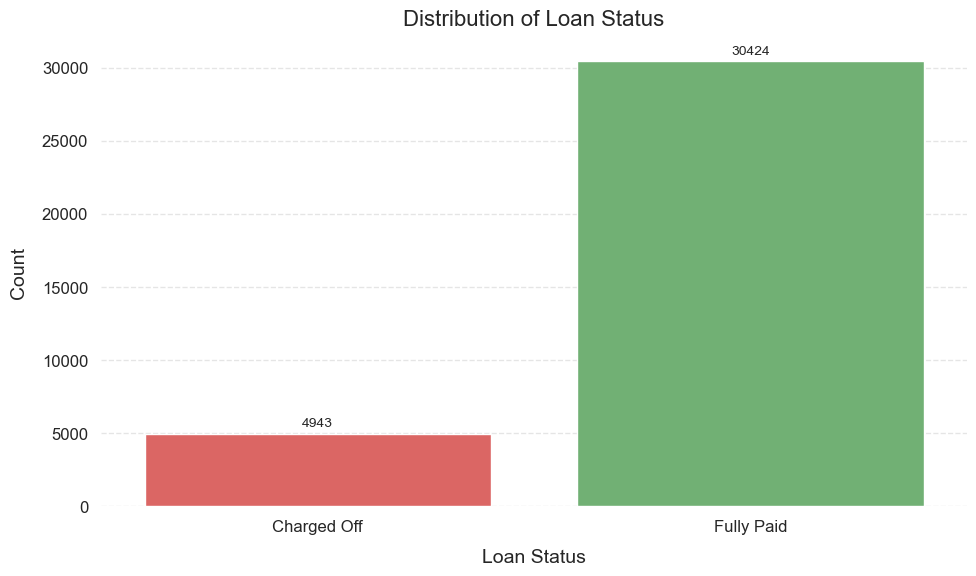

In [137]:
colors = ['#EF5350', '#66BB6A']
plot_categorical_distribution(loan_df, 'loan_status', 'Loan Status', colors, rotations=0)

In [138]:
charged_off_loan_percent = round(loan_df[loan_df.loan_status == 'Charged Off'].loan_status.count() / loan_df.loan_status.count() * 100, 2)
print(f'Percentage of Charged Off loans: {charged_off_loan_percent}%')

Percentage of Charged Off loans: 13.98%


In [139]:
# Find cutoff rate of keyCalculate 20% of 13.98%
key_risk_factor_percent = round(charged_off_loan_percent + charged_off_loan_percent * 0.2, 2)
print(f'{key_risk_factor_percent}%')

16.78%


The dataset reveals a baseline loan default rate of 13.98%. To identify significant risk factors, we will focus on categories where the default rate surpasses 20%.  Specifically,  feature variables that contribute to a 16.78% or higher increase in the proportion of charged-off loans will be examined in detail.

##### **term**

**Definition** <br>
The number of payments on the loan. Values are in months and can be either 36 or 60

In [143]:
perform_univariate_analysis(loan_df, 'term')


Univariate Analysis of 'term'

Description grouped by loan_status:
               count       mean        std   min   25%   50%   75%   max
loan_status                                                             
Charged Off   4943.0  46.744892  11.935390  36.0  36.0  36.0  60.0  60.0
Fully Paid   30424.0  41.346043   9.986397  36.0  36.0  36.0  36.0  60.0

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: term, dtype: int64

Overall value counts:
term
36    26377
60     8990
Name: count, dtype: int64


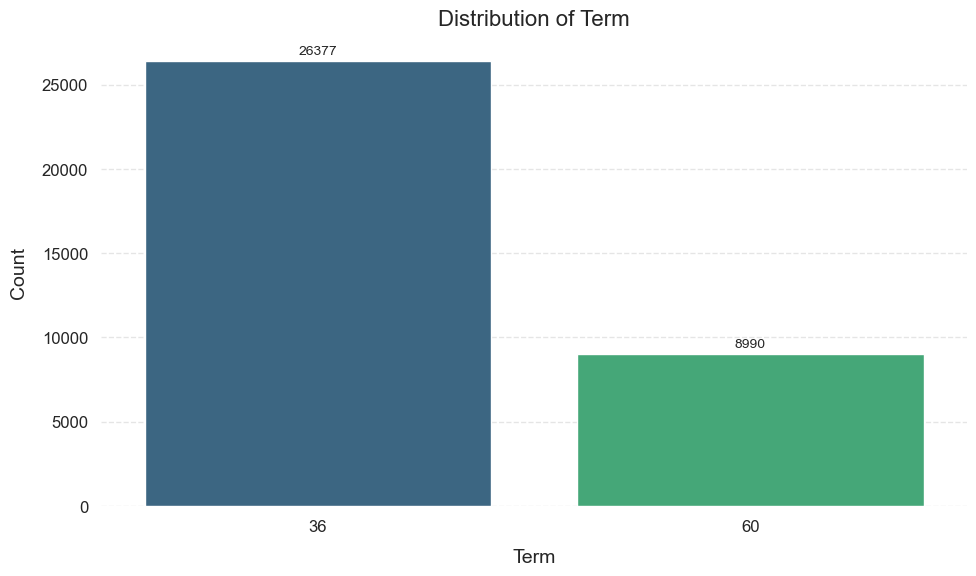

In [144]:
plot_categorical_distribution(loan_df, 'term', 'Term')

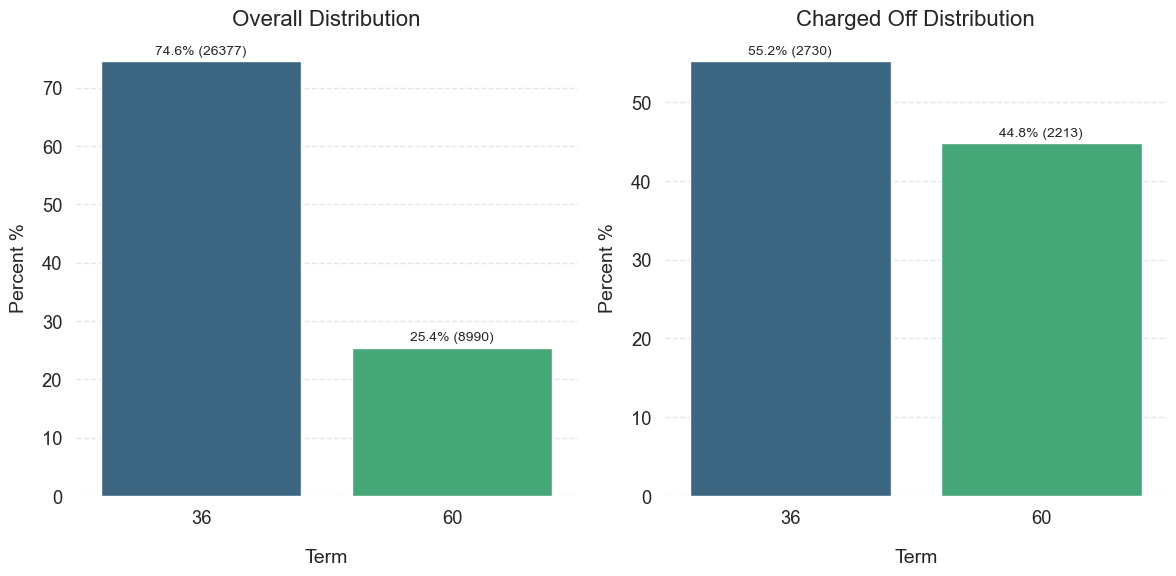

In [145]:
plot_percentages_by_category(loan_df, 'term', 'Term', 'x', 0, 10)

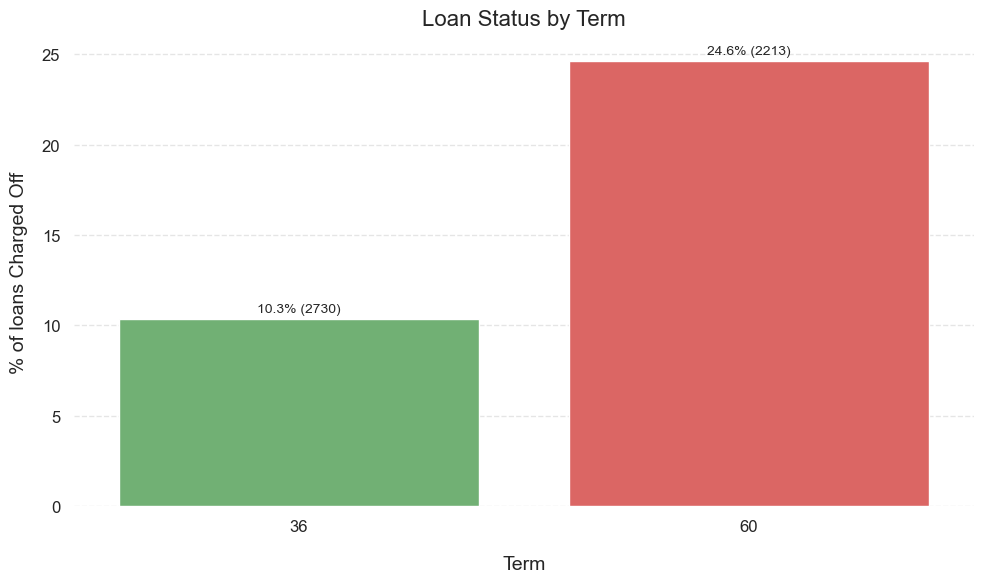

In [146]:
colors = ['#66BB6A', '#EF5350']
plot_percent_against_loan_status(loan_df, 'term', 'Term', palette=colors)

**Observations:**
* Most loans are issued for a term of 36 months
* 36-month term loans make up around 75% of the total loans
* 60-month term loans have a higher percentage of charged-off loans (around 24.6%) compared to 36-month term loans (around 10%)

##### grade

**Definition** <br>
LC assigned loan grade

In [150]:
perform_univariate_analysis(loan_df, 'grade')


Univariate Analysis of 'grade'

Description grouped by loan_status:
             count unique top  freq
loan_status                        
Charged Off   4943      7   B  1253
Fully Paid   30424      7   B  9465

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: grade, dtype: int64

Overall value counts:
grade
B    10718
A     9140
C     7181
D     4663
E     2481
F      902
G      282
Name: count, dtype: int64


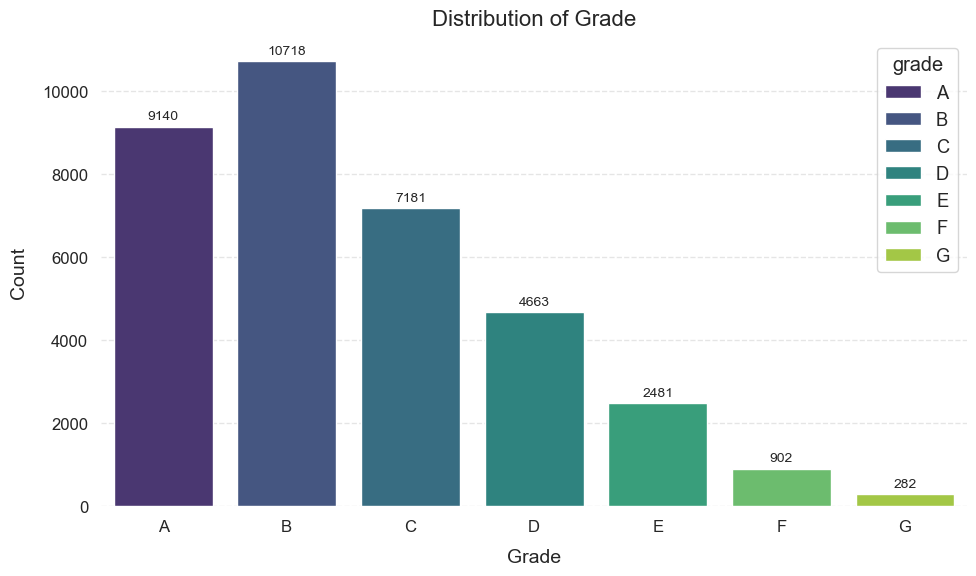

In [151]:
# import colorcet as cc
plot_categorical_distribution(loan_df, 'grade', 'Grade', rotations=0, sort_index=True, legend=True)

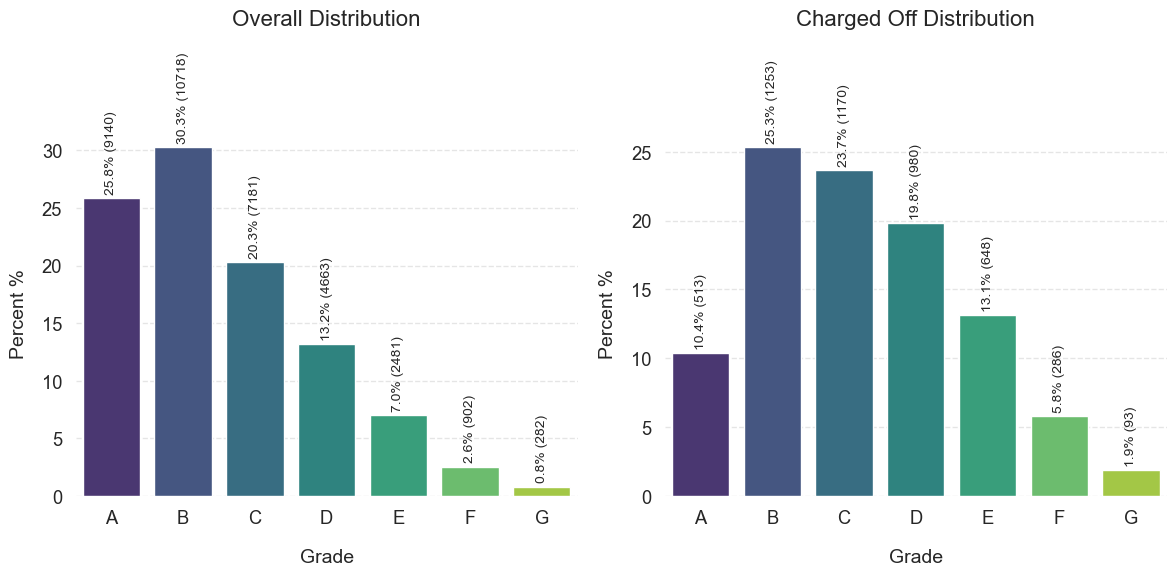

In [152]:
plot_percentages_by_category(loan_df, 'grade', 'Grade', 'x', 90, 75, True)

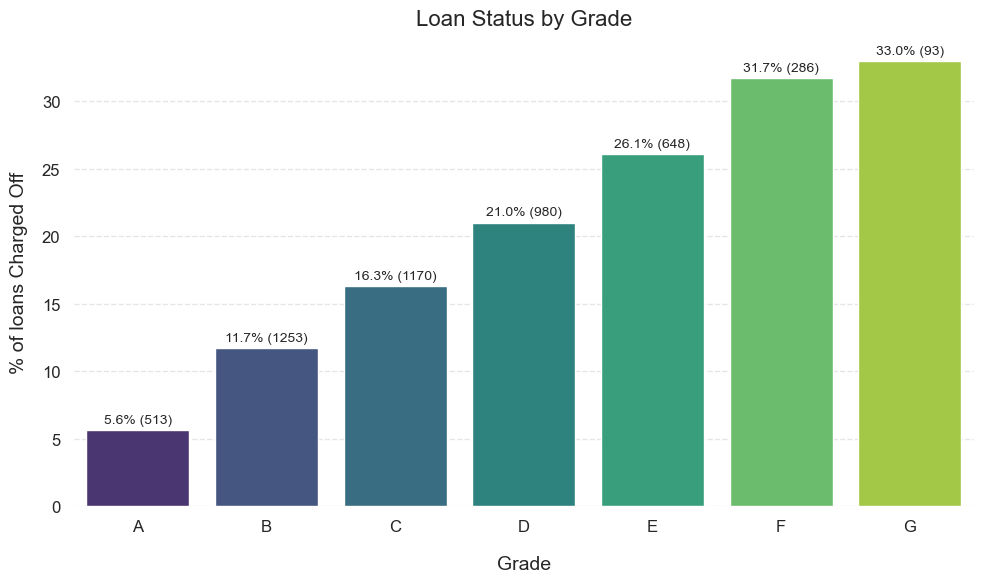

In [153]:
plot_percent_against_loan_status(loan_df, 'grade', 'Grade')

**Observations:**
* Most loans are assigned grades A, B, and C, with fewer loans in the lower grades (D-G)
* Approximately 80% loans are sanctioned in grades (A-C)
* The charge-off percentage steadily increases as loan grades decline, with Grade G loans showing the highest risk
* Lending Club's Grading system works

##### sub_grade

**Definition** <br>
LC assigned loan sub-grade

In [157]:
perform_univariate_analysis(loan_df, 'sub_grade')


Univariate Analysis of 'sub_grade'

Description grouped by loan_status:
             count unique top  freq
loan_status                        
Charged Off   4943     35  B5   331
Fully Paid   30424     35  A4  2504

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: sub_grade, dtype: int64

Overall value counts:
sub_grade
A4    2662
B3    2589
A5    2487
B5    2444
B4    2247
C1    1874
B2    1825
C2    1791
A3    1630
B1    1613
C3    1369
A2    1356
D2    1184
C4    1095
C5    1052
D3    1022
A1    1005
D4     848
D1     846
D5     763
E1     691
E2     566
E3     482
E4     394
E5     348
F1     293
F2     214
F3     160
F4     136
F5      99
G1      88
G2      74
G4      54
G3      41
G5      25
Name: count, dtype: int64


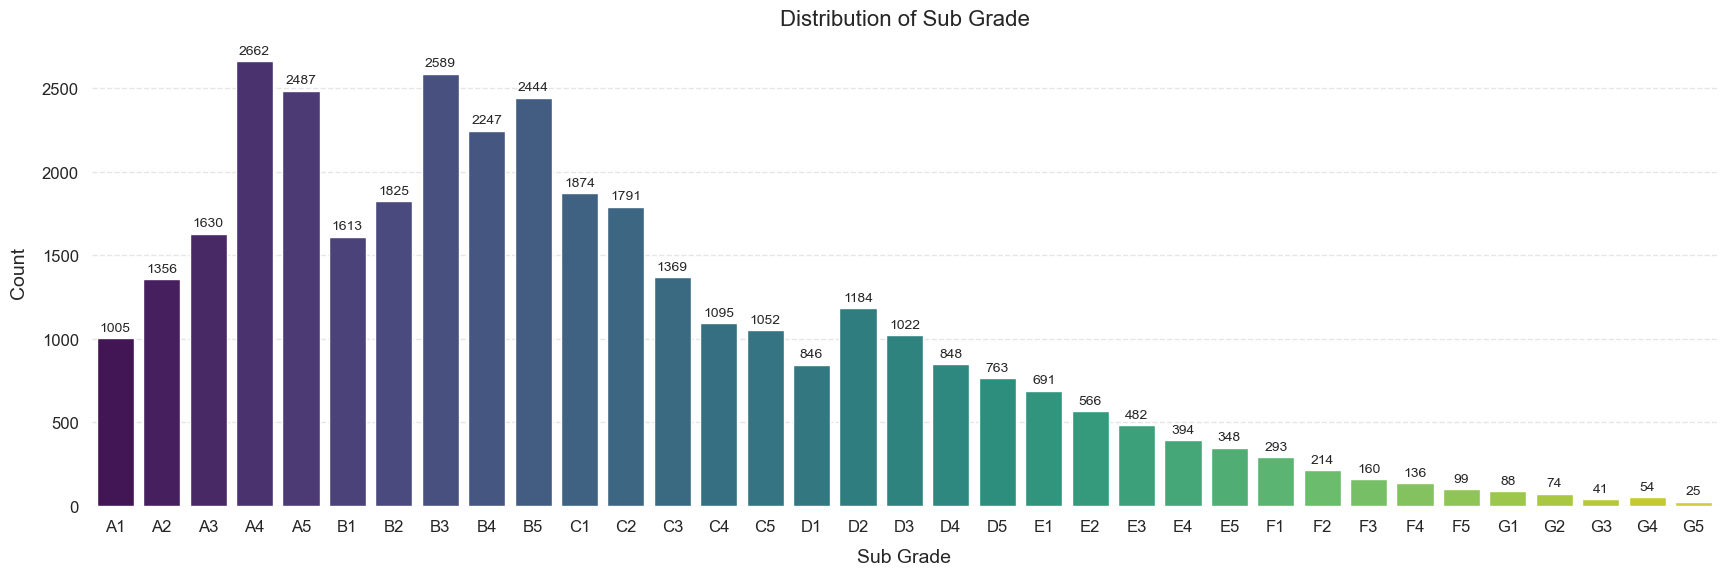

In [158]:
plot_categorical_distribution(loan_df, 'sub_grade', 'Sub Grade', rotations=0, sort_index=True)

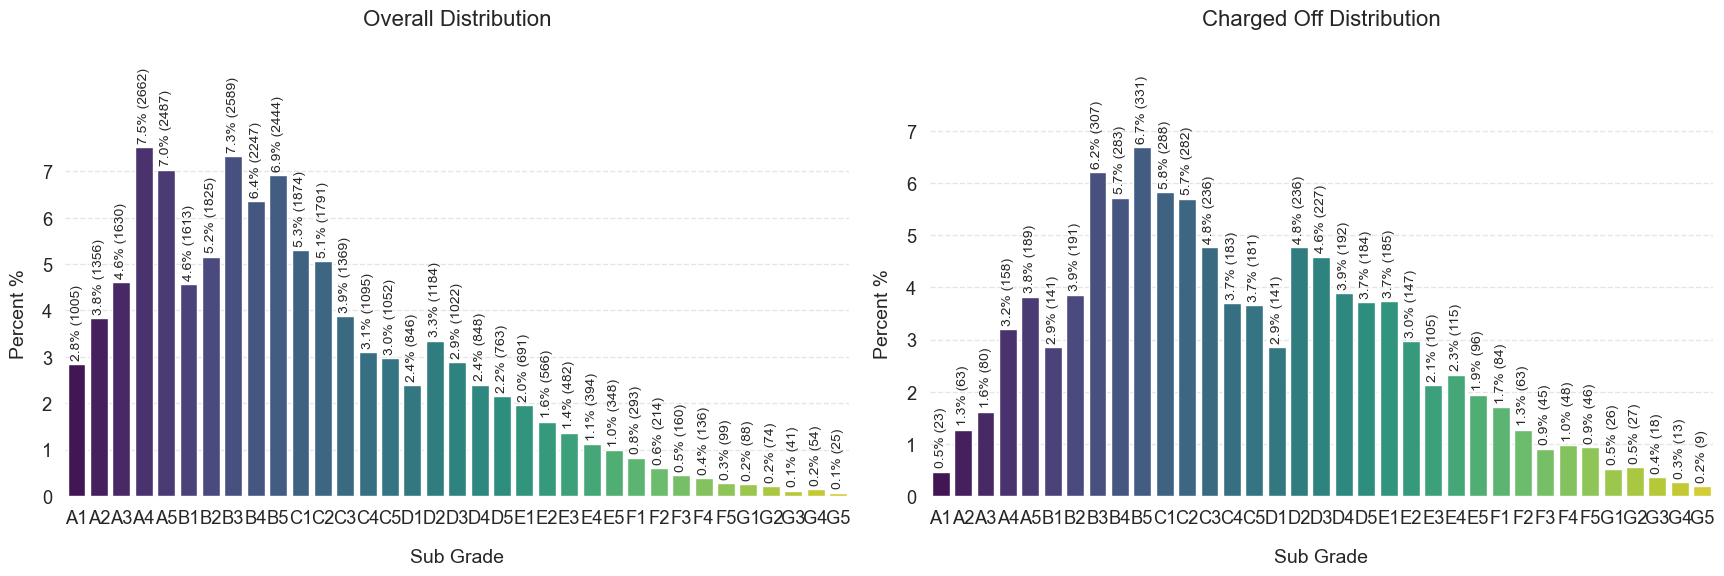

In [159]:
plot_percentages_by_category(loan_df, 'sub_grade', 'Sub Grade', 'x', 90, 75, True)

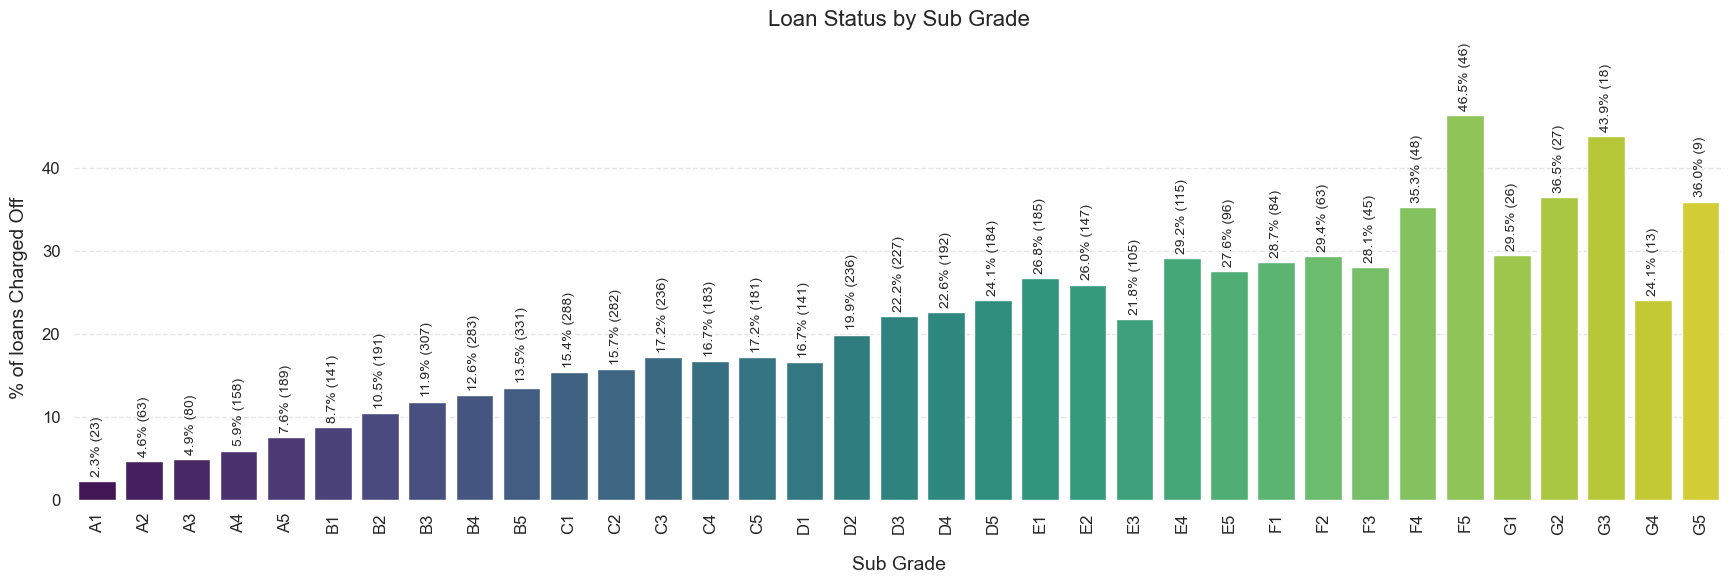

In [160]:
plot_percent_against_loan_status(loan_df, 'sub_grade', 'Sub Grade', 90, 50)

**Observations:**
* Sub_grade steadily follows the grade, the charge-off percentage generally increases as sub-grades descend within each loan grade, suggesting a finer granularity of risk assessment
* We will not consider this as; grade is able to abstract and capture the findings across grade levels

In [162]:
loan_df.drop('sub_grade', axis=1, inplace=True)

##### emp_length

**Definition** <br>
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years

In [165]:
perform_univariate_analysis(loan_df, 'emp_length')


Univariate Analysis of 'emp_length'

Description grouped by loan_status:
               count      mean       std  min  25%  50%  75%   max
loan_status                                                       
Charged Off   4943.0  5.156383  3.572913  0.0  2.0  5.0  9.0  10.0
Fully Paid   30424.0  4.948560  3.538141  0.0  2.0  4.0  9.0  10.0

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: emp_length, dtype: int64

Overall value counts:
emp_length
10    8028
0     4083
2     3978
3     3833
4     3206
5     3043
1     2959
6     2062
7     1638
8     1361
9     1176
Name: count, dtype: int64


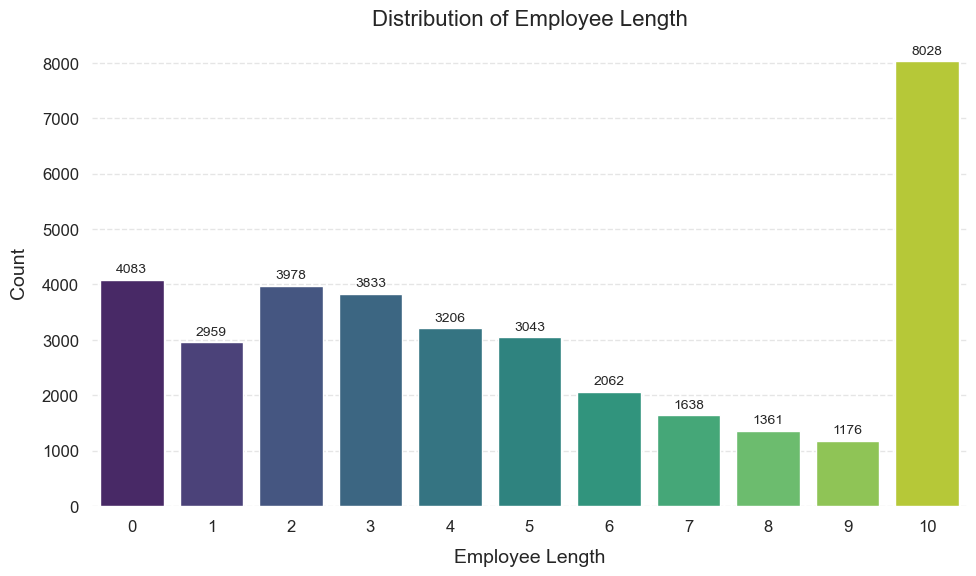

In [166]:
plot_categorical_distribution(loan_df, 'emp_length', 'Employee Length', rotations=0, sort_index=True)

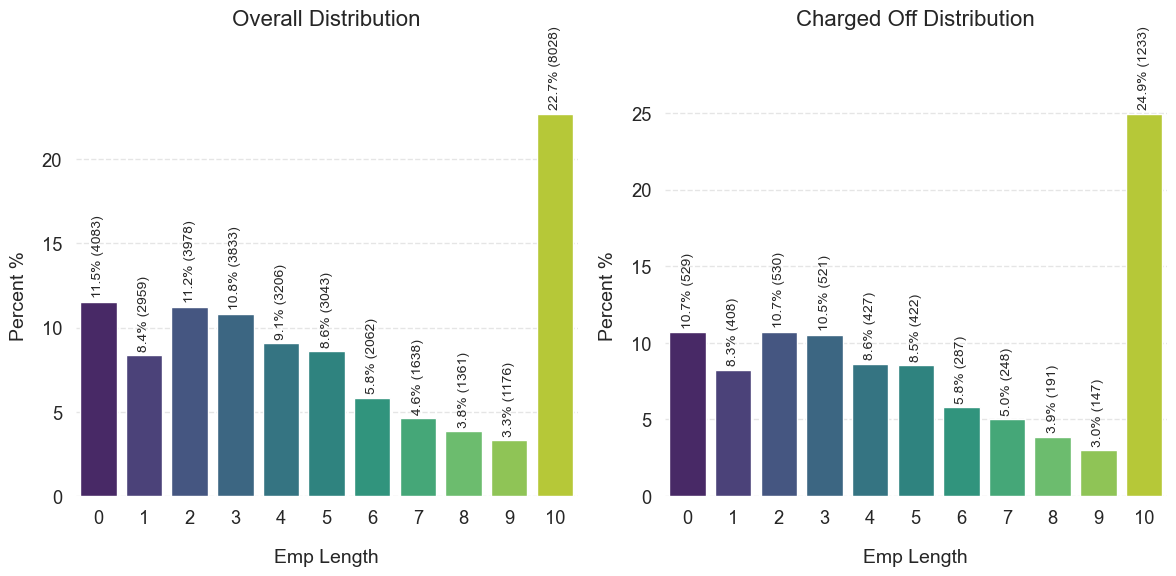

In [167]:
plot_percentages_by_category(loan_df, 'emp_length', 'Emp Length',  'x', 90, 50, True)

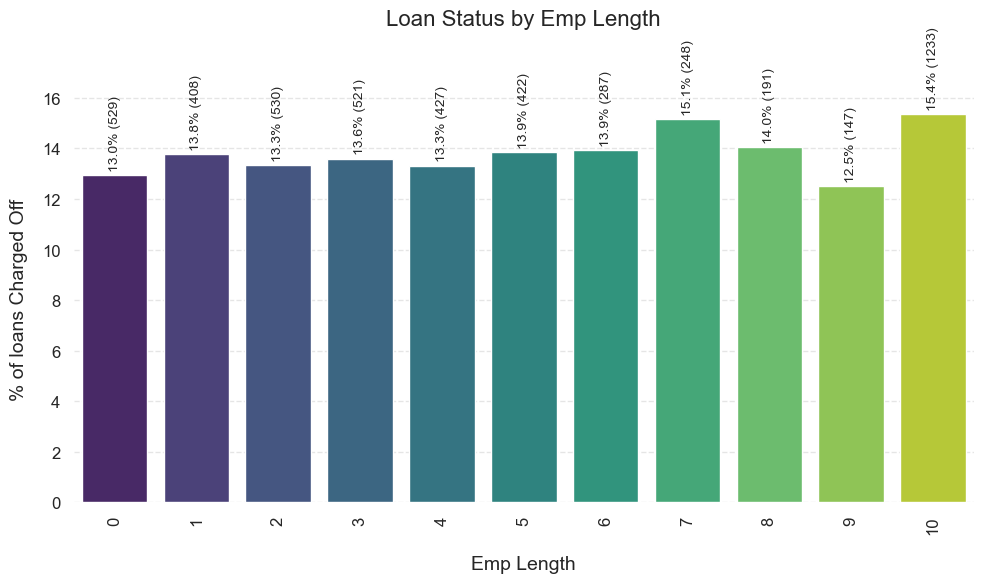

In [168]:
plot_percent_against_loan_status(loan_df, 'emp_length', 'Emp Length', 90, 50)

**Observations:**
* Loans are distributed across various employment lengths, with 10+ years and less than 1 year having higher frequencies
* Employee length doesn't show a strong trend in charged-off percentage, indicating it might not be a primary indicator of loan default on its own

##### home_ownership

**Definition** <br>
The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER

In [172]:
perform_univariate_analysis(loan_df, 'home_ownership')


Univariate Analysis of 'home_ownership'

Description grouped by loan_status:
             count unique   top   freq
loan_status                           
Charged Off   4943      4  RENT   2517
Fully Paid   30424      4  RENT  14548

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: home_ownership, dtype: int64

Overall value counts:
home_ownership
RENT        17065
MORTGAGE    15703
OWN          2505
OTHER          94
Name: count, dtype: int64


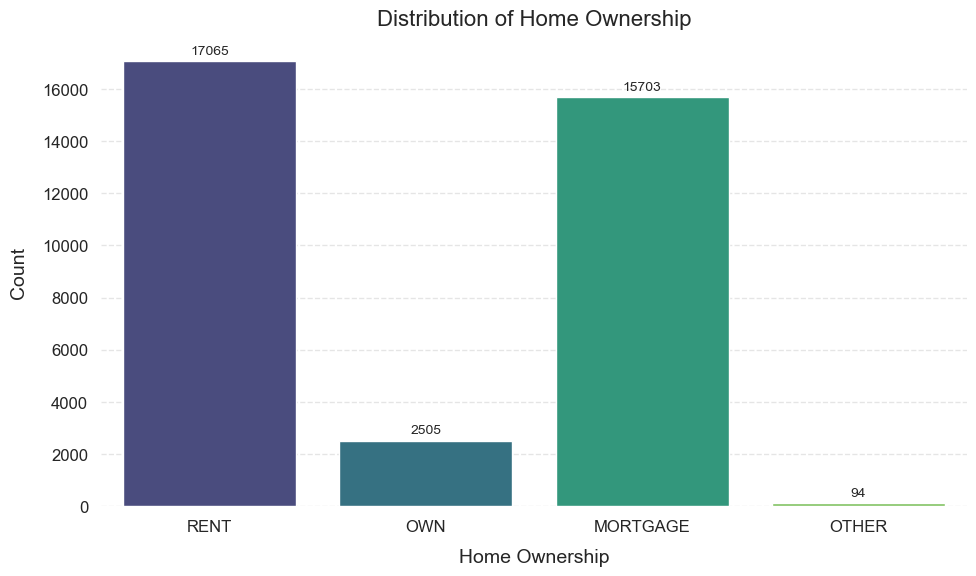

In [173]:
plot_categorical_distribution(loan_df, 'home_ownership', 'Home Ownership')

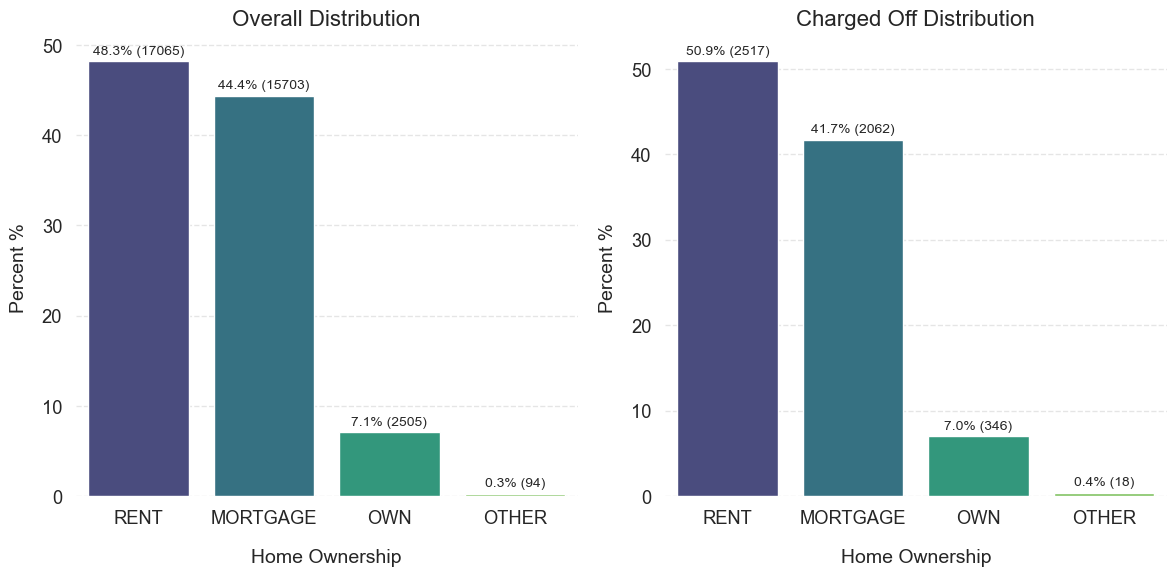

In [174]:
plot_percentages_by_category(loan_df, 'home_ownership', 'Home Ownership', 'x')

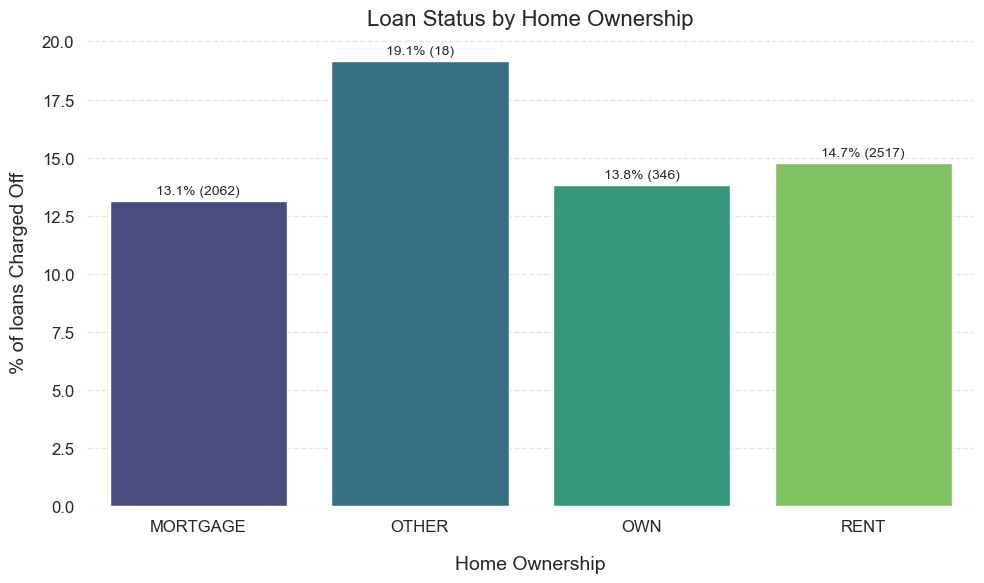

In [175]:
plot_percent_against_loan_status(loan_df, 'home_ownership', 'Home Ownership')

**Observations:**

*   Most borrowers are either renting or have mortgages, with fewer borrowers categorized as owners or "Other"
* Rent and Mortgage have a high charged off % contributing to approx 92% of all charged off loans in the charged off distribution
* While 'Other' home ownership has the highest charged-off percentage (19.1%), the small sample size of 18 limits its significance in overall analysis.<br>
All categories fall below the key risk threshold (16.78%).



##### verification_status

**Definition**<br>
Indicates if income was verified by LC, not verified, or if the income source was verified

In [179]:
perform_univariate_analysis(loan_df, 'verification_status')


Univariate Analysis of 'verification_status'

Description grouped by loan_status:
             count unique           top   freq
loan_status                                   
Charged Off   4943      3      Verified   1851
Fully Paid   30424      3  Not Verified  13070

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: verification_status, dtype: int64

Overall value counts:
verification_status
Not Verified       14840
Verified           11363
Source Verified     9164
Name: count, dtype: int64


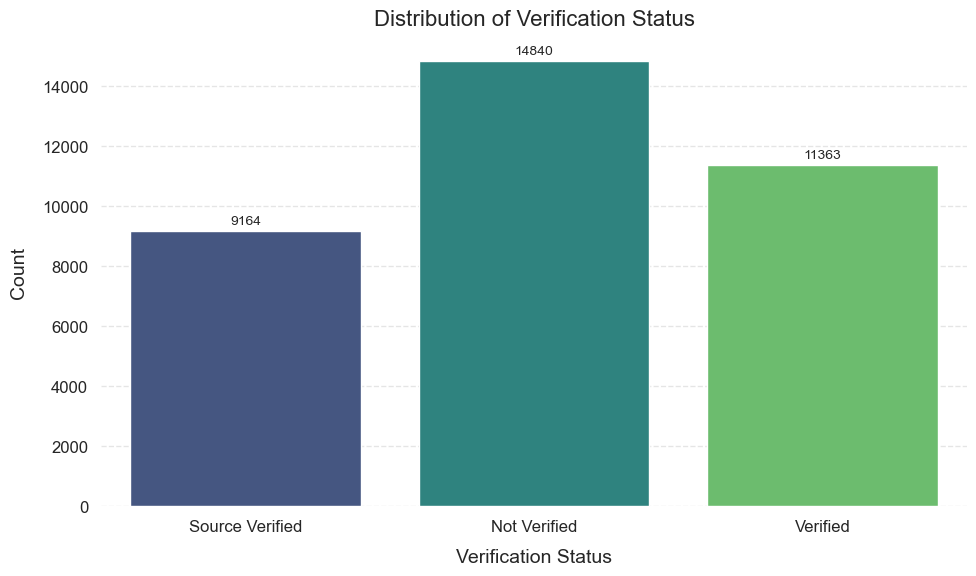

In [180]:
plot_categorical_distribution(loan_df, 'verification_status', 'Verification Status', rotations=0)

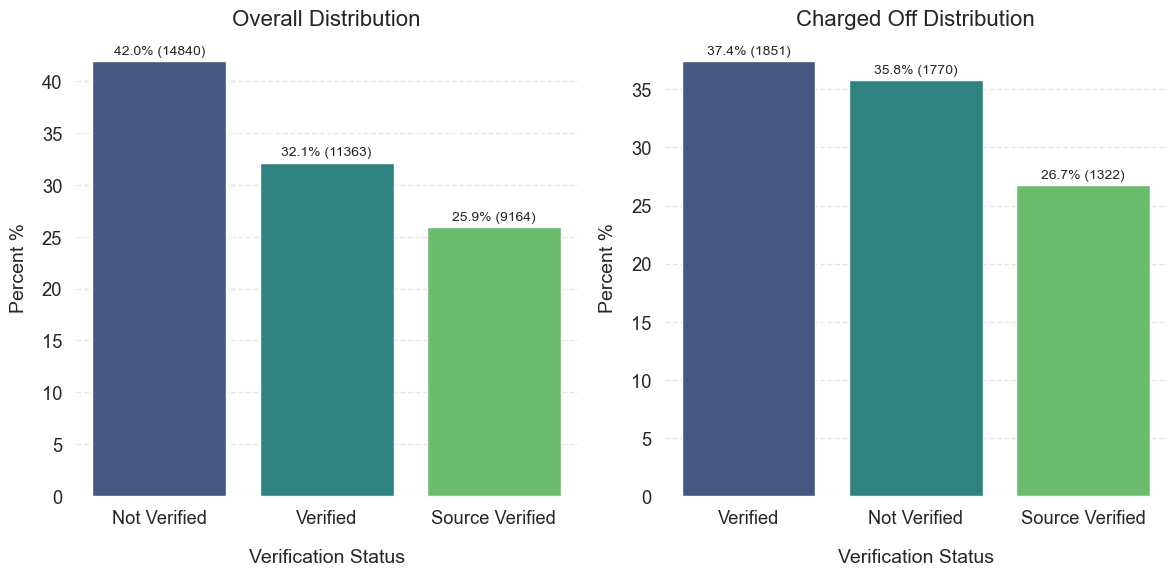

In [181]:
plot_percentages_by_category(loan_df, 'verification_status', 'Verification Status','x')

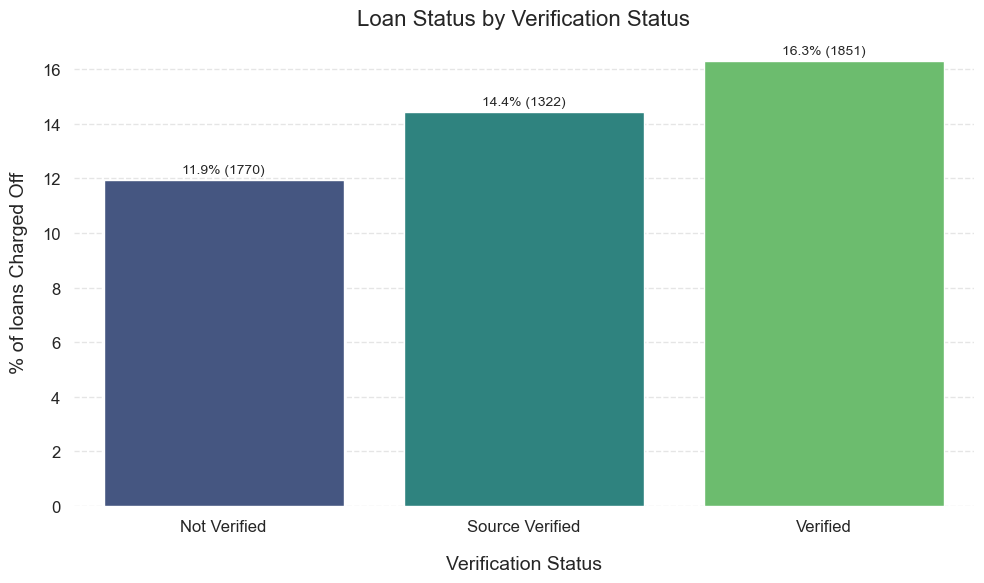

In [182]:
plot_percent_against_loan_status(loan_df, 'verification_status', 'Verification Status')

**Observations:**
* A substantial number of borrowers are not verified
* Interestingly, loans with "Verified" income sources show the highest charge-off percentage (16.3%), exceeding both "Not Verified" and "Source Verified" categories
* All categories fall below the key risk threshold (16.78%)

##### purpose

**Definition** <br>
A category provided by the borrower for the loan request

In [186]:
perform_univariate_analysis(loan_df, 'purpose')


Univariate Analysis of 'purpose'

Description grouped by loan_status:
             count unique                 top   freq
loan_status                                         
Charged Off   4943     14  debt_consolidation   2509
Fully Paid   30424     14  debt_consolidation  14402

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: purpose, dtype: int64

Overall value counts:
purpose
debt_consolidation    16911
credit_card            4626
other                  3462
home_improvement       2614
major_purchase         1973
car                    1395
small_business         1351
wedding                 865
medical                 622
moving                  523
vacation                332
house                   330
educational             276
renewable_energy         87
Name: count, dtype: int64


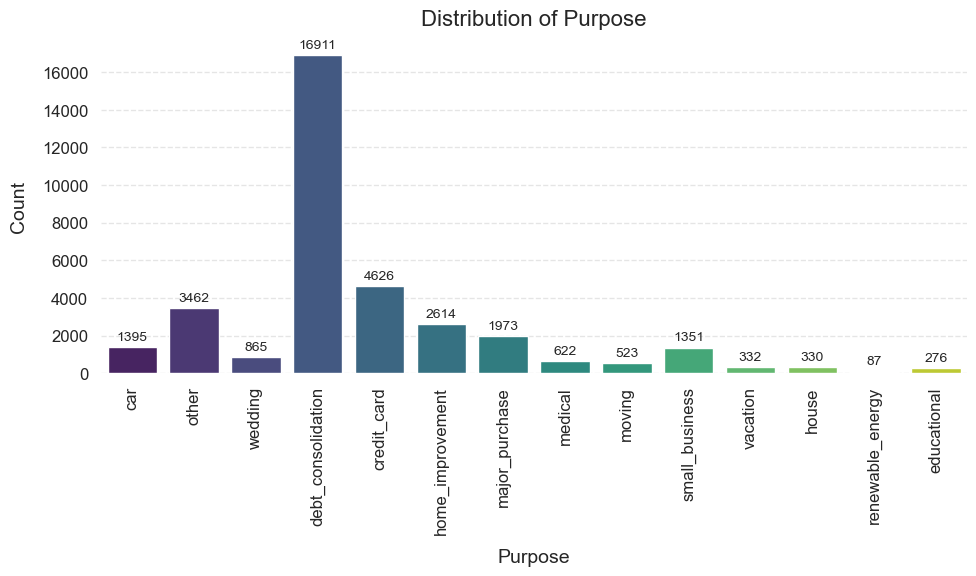

In [187]:
# material_palette_15 = [
#     "#2196F3",  # Blue
#     "#E91E63",  # Pink
#     "#4CAF50",  # Green
#     "#FFC107",  # Amber
#     "#673AB7",  # Deep Purple
#     "#00BCD4",  # Cyan
#     "#FF5722",  # Deep Orange
#     "#795548",  # Brown
#     "#9C27B0",  # Purple
#     "#3F51B5",  # Indigo
#     "#009688",  # Teal
#     "#FF9800",  # Orange
#     "#607D8B",  # Blue Grey
#     "#CDDC39",  # Lime
#     "#FFEB3B"   # Yellow
# ]

# pastel_palette_15 = [
#     "#BBDEFB",  # Pastel Blue
#     "#F8BBD0",  # Pastel Pink
#     "#C8E6C9",  # Pastel Green
#     "#FFF9C4",  # Pastel Amber
#     "#E1BEE7",  # Pastel Purple
#     "#B2EBF2",  # Pastel Cyan
#     "#FFCCBC",  # Pastel Orange
#     "#D7CCC8",  # Pastel Brown
#     "#E040FB",  # Pastel Magenta (bright accent)
#     "#C5CAE9",  # Pastel Indigo
#     "#B2DFDB",  # Pastel Teal
#     "#FFE0B2",  # Pastel Orange (lighter)
#     "#CFD8DC",  # Pastel Blue Grey
#     "#F0F4C3",  # Pastel Lime
#     "#FFFDE7"   # Pastel Yellow
# ]
plot_categorical_distribution(loan_df, 'purpose', 'Purpose', rotations=90)

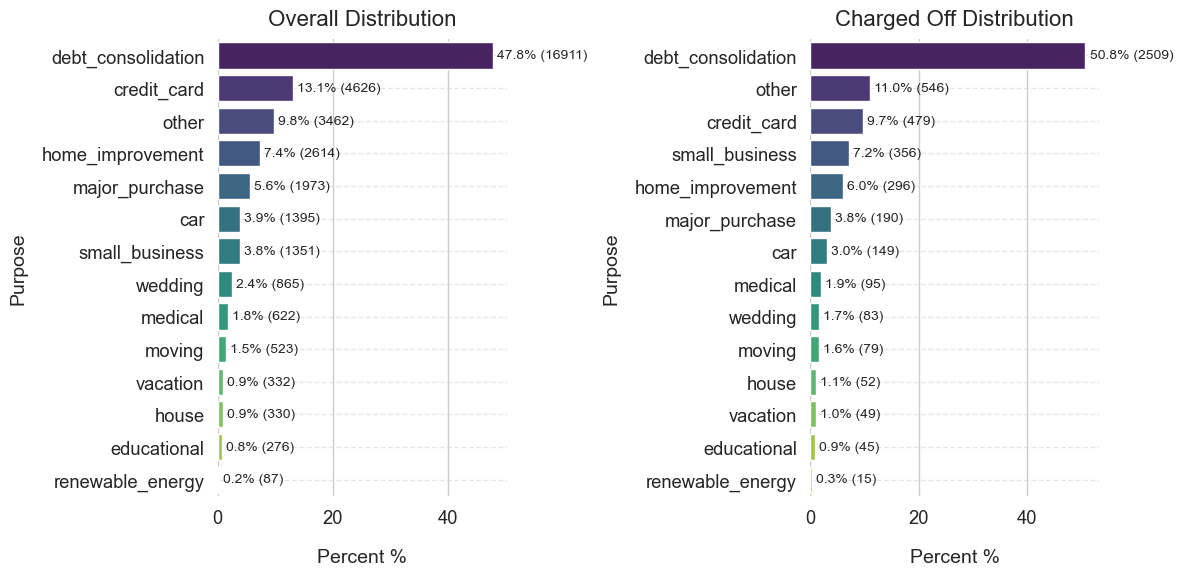

In [188]:
plot_percentages_by_category(loan_df, 'purpose', 'Purpose', 'y')

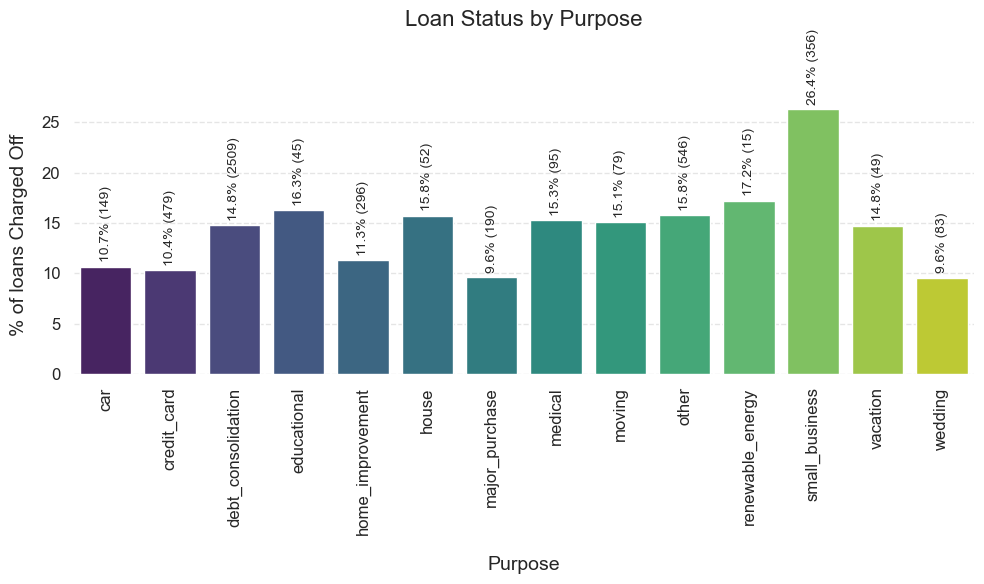

In [189]:
plot_percent_against_loan_status(loan_df, 'purpose', 'Purpose', 90, 50)

**Observations:**
* Debt consolidation is the primary driver of both loan origination and charge-offs, representing nearly half of all loans. This highlights its significance in the lending landscape and potential risk concentration.
* "Other" loan purposes show a disproportionately higher charge-off rate, indicating a potentially higher risk category requiring further investigation. This suggests that loans for less common purposes might warrant closer scrutiny.
* Small business loans experience a significant jump in charge-off representation (an 89.5% increase), raising concerns about the heightened default risk associated with this sector. This flags small business loans as a potentially vulnerable area deserving of attention.

##### inq_last_6mths

**Definition** <br>
The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [193]:
perform_univariate_analysis(loan_df, 'inq_last_6mths')


Univariate Analysis of 'inq_last_6mths'

Description grouped by loan_status:
               count      mean       std  min  25%  50%  75%  max
loan_status                                                      
Charged Off   4943.0  1.046126  1.137055  0.0  0.0  1.0  2.0  8.0
Fully Paid   30424.0  0.837891  1.049297  0.0  0.0  1.0  1.0  8.0

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: inq_last_6mths, dtype: int64

Overall value counts:
inq_last_6mths
0    17183
1     9774
2     5208
3     2703
4      280
5      123
6       54
7       31
8       11
Name: count, dtype: int64


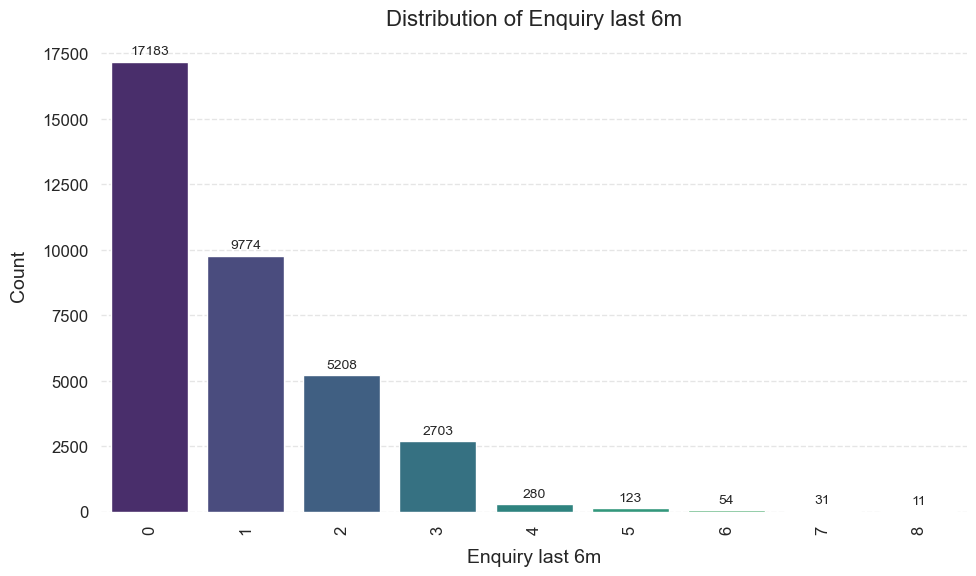

In [194]:
plot_categorical_distribution(loan_df, 'inq_last_6mths', 'Enquiry last 6m', rotations=90)

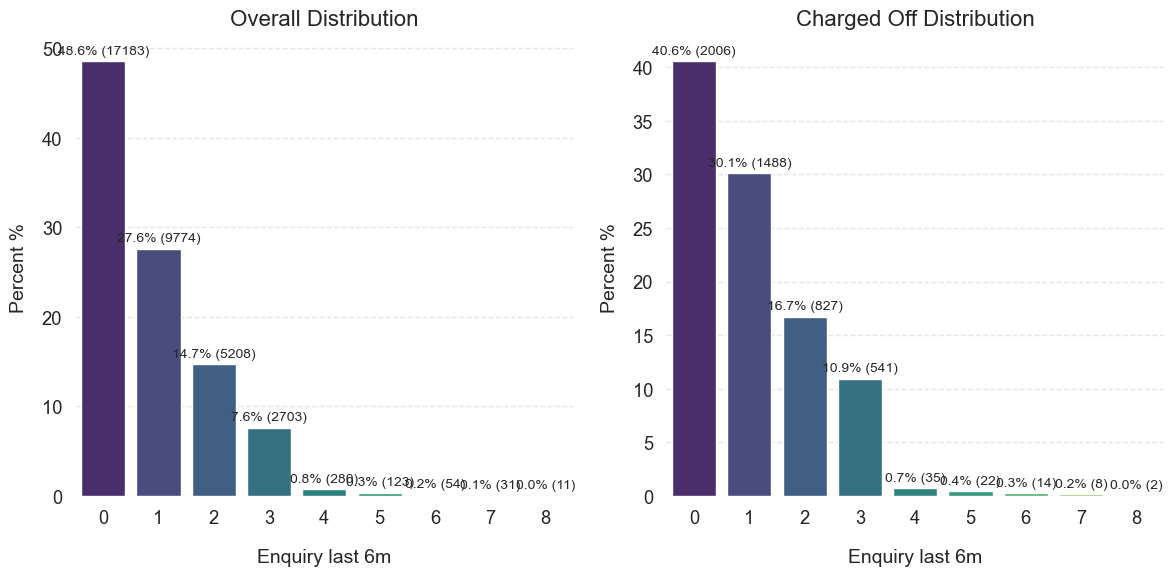

In [195]:
plot_percentages_by_category(loan_df, 'inq_last_6mths', 'Enquiry last 6m', 'x')

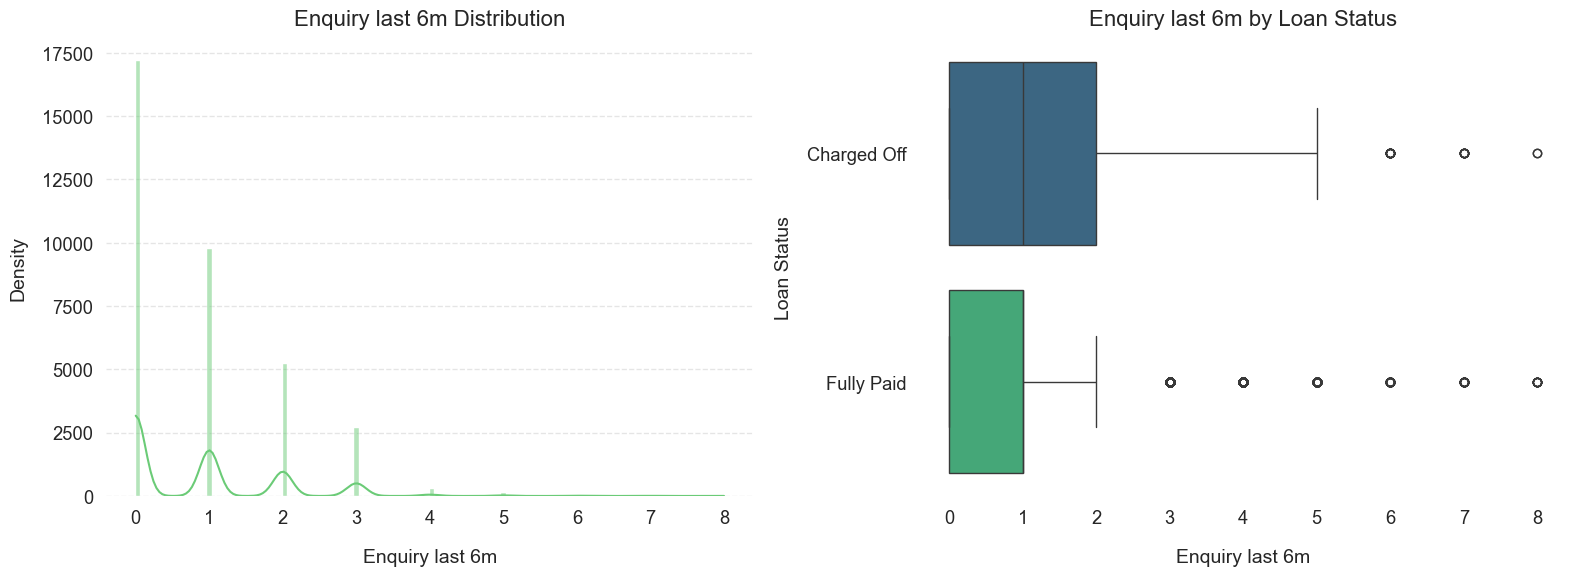

In [196]:
plot_distribution(loan_df, 'inq_last_6mths', 'Enquiry last 6m')

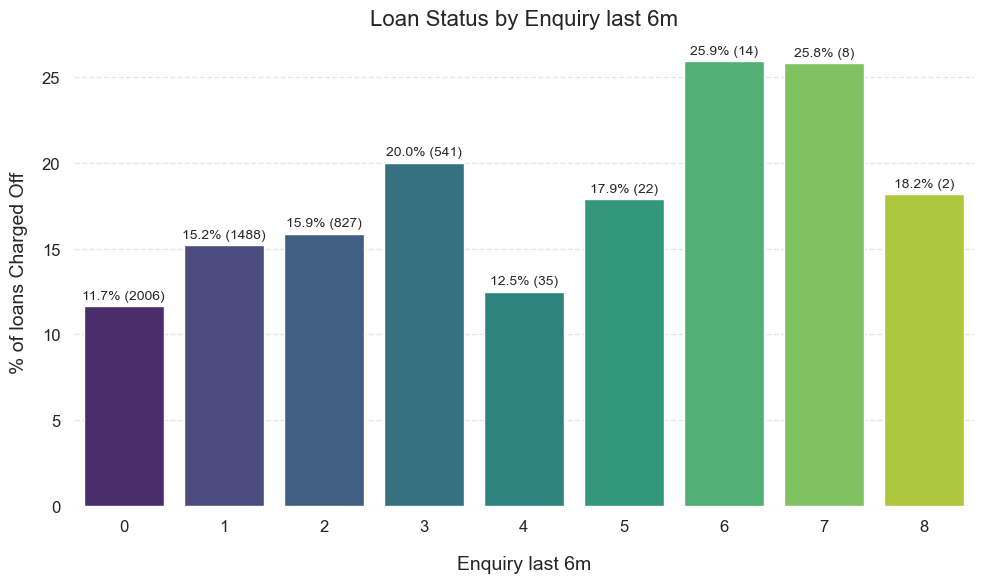

In [197]:
plot_percent_against_loan_status(loan_df, 'inq_last_6mths', 'Enquiry last 6m')

**Observations:**
* Most borrowers have 0 or 1 inquiries, indicating relatively stable finances. Lending Club should prioritize these applicants to minimize risk.
* Charged-off percentage increases with the number of inquiries, signaling potential financial distress. Scrutinizing borrowers with frequent inquiries is crucial.
* Borrowers with 3+ inquiries pose a significant risk, exceeding the 16.78% threshold, potentially warranting stricter lending criteria or further verification

##### pub_rec

**Definition**<br>
Number of derogatory public records

In [201]:
perform_univariate_analysis(loan_df, 'pub_rec')


Univariate Analysis of 'pub_rec'

Description grouped by loan_status:
               count      mean       std  min  25%  50%  75%  max
loan_status                                                      
Charged Off   4943.0  0.082541  0.282472  0.0  0.0  0.0  0.0  2.0
Fully Paid   30424.0  0.049533  0.226905  0.0  0.0  0.0  0.0  4.0

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: pub_rec, dtype: int64

Overall value counts:
pub_rec
0    33516
1     1798
2       44
3        7
4        2
Name: count, dtype: int64


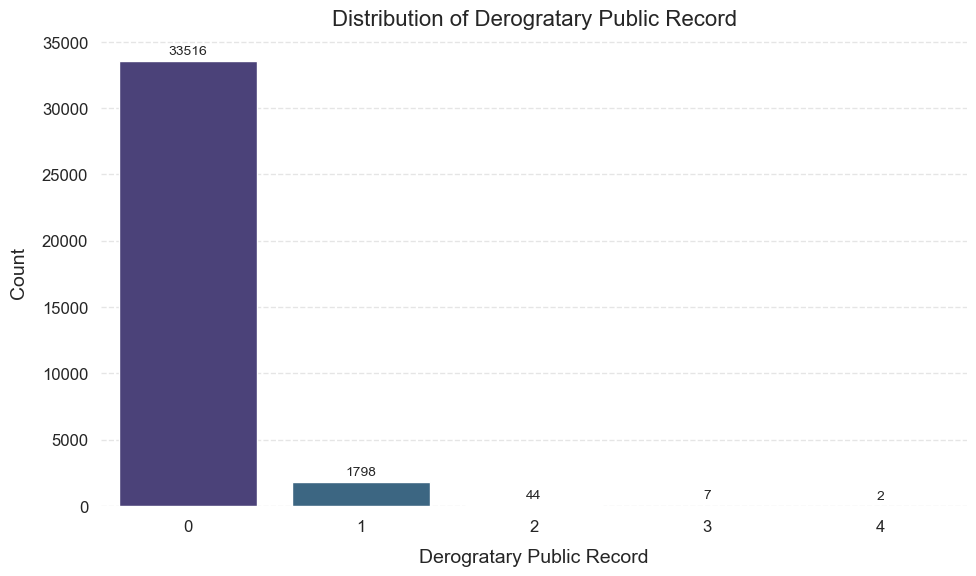

In [202]:
plot_categorical_distribution(loan_df, 'pub_rec', 'Derogratary Public Record')

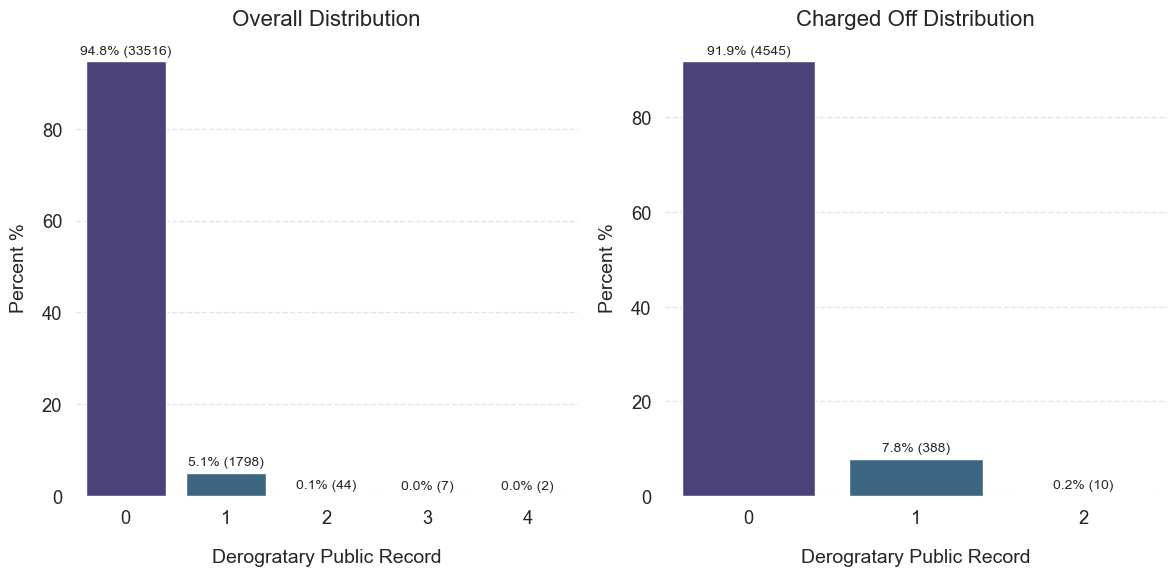

In [203]:
plot_percentages_by_category(loan_df, 'pub_rec', 'Derogratary Public Record', 'x')

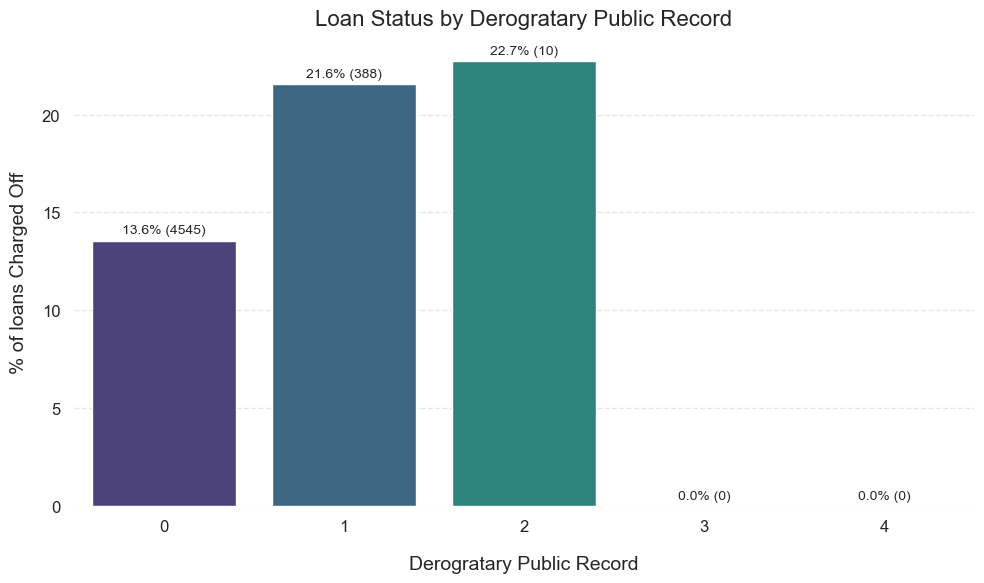

In [204]:
plot_percent_against_loan_status(loan_df, 'pub_rec', 'Derogratary Public Record')

**Observations:**
* Few loans are offered to individuals with derogatory public records, reflecting Lending Club's cautious approach.
* Borrowers with 1 or more public records have a heightened risk of default (around 22%), exceeding the key risk factor threshold (16.78%).
* Lending Club should maintain stringent criteria for loans to individuals with derogatory public records to mitigate potential losses.

##### pub_rec_bankruptcies

**Definition**<br>
Number of public record bankruptcies

In [208]:
perform_univariate_analysis(loan_df, 'pub_rec_bankruptcies')


Univariate Analysis of 'pub_rec_bankruptcies'

Description grouped by loan_status:
               count      mean       std  min  25%  50%  75%  max
loan_status                                                      
Charged Off   4943.0  0.063726  0.245941  0.0  0.0  0.0  0.0  2.0
Fully Paid   30424.0  0.038095  0.191943  0.0  0.0  0.0  0.0  2.0

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: pub_rec_bankruptcies, dtype: int64

Overall value counts:
pub_rec_bankruptcies
0    33898
1     1464
2        5
Name: count, dtype: int64


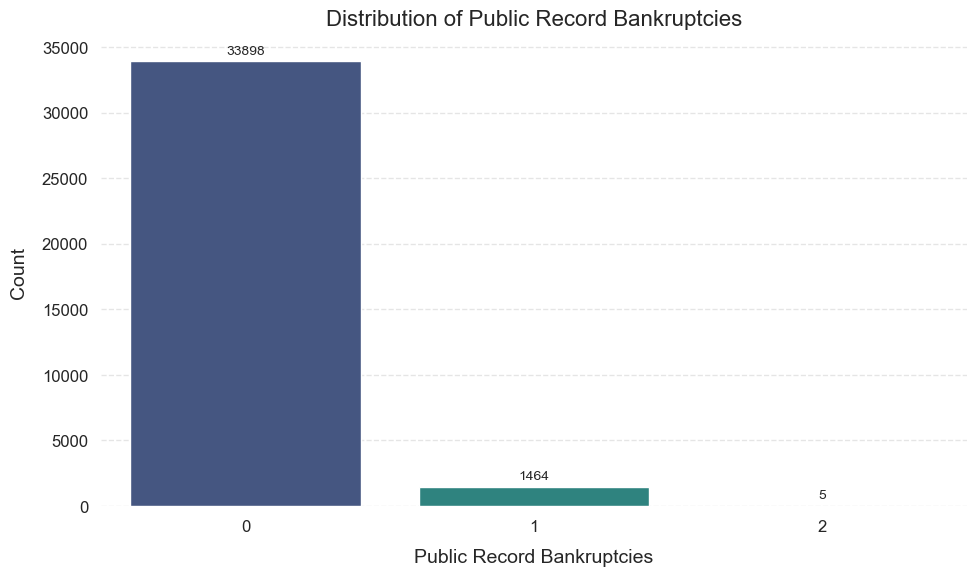

In [209]:
plot_categorical_distribution(loan_df, 'pub_rec_bankruptcies', 'Public Record Bankruptcies')

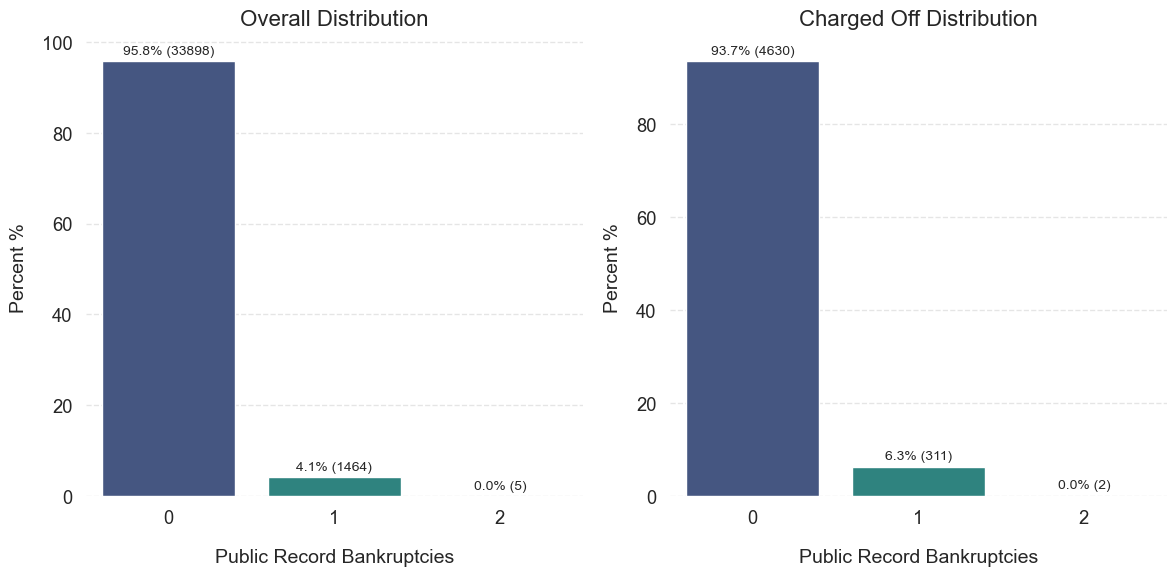

In [210]:
plot_percentages_by_category(loan_df, 'pub_rec_bankruptcies', 'Public Record Bankruptcies', 'x')

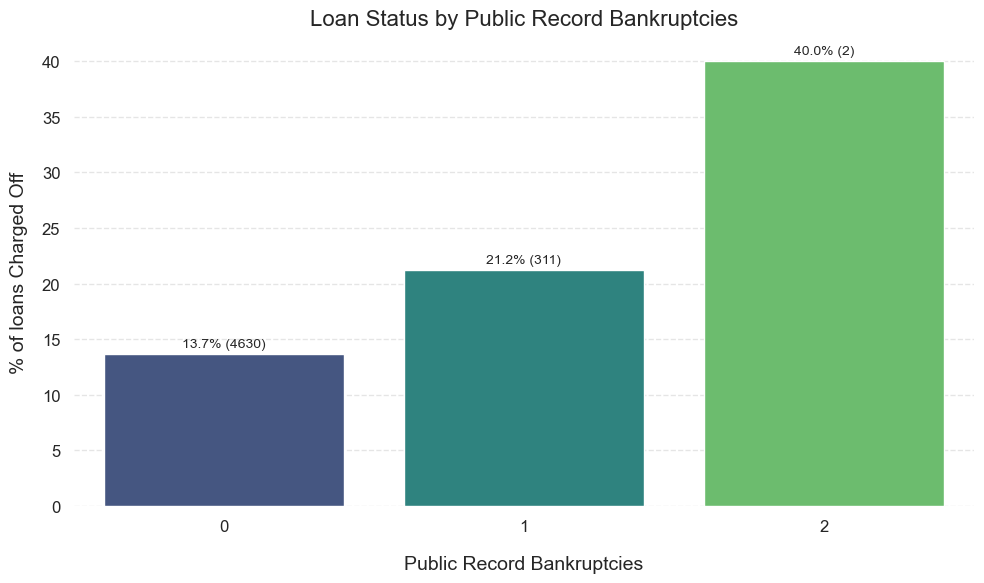

In [211]:
plot_percent_against_loan_status(loan_df, 'pub_rec_bankruptcies', 'Public Record Bankruptcies')

**Observations:**

* Most borrowers have 0 public record bankruptcies, suggesting a generally low risk in this area.
* However, borrowers with 1 or more bankruptcies have a significantly higher charged-off percentage, exceeding the key risk factor threshold (16.78%). This makes it a crucial risk indicator.
* Lending Club should exercise caution when considering loans for individuals with a history of bankruptcy, potentially implementing stricter lending guidelines or risk mitigation strategies.



##### emp_title

**Definition**
The job title supplied by the Borrower when applying for the loan. Employer Title replaces Employer Name for all loans listed after 9/23/2013

In [214]:
top10_emp_title = loan_df.emp_title.value_counts(normalize=False).head(10)
top10_emp_title

emp_title
US Army              128
Bank of America      106
IBM                   65
AT&T                  57
Kaiser Permanente     55
Wells Fargo           52
UPS                   51
USAF                  51
US Air Force          50
Walmart               44
Name: count, dtype: int64

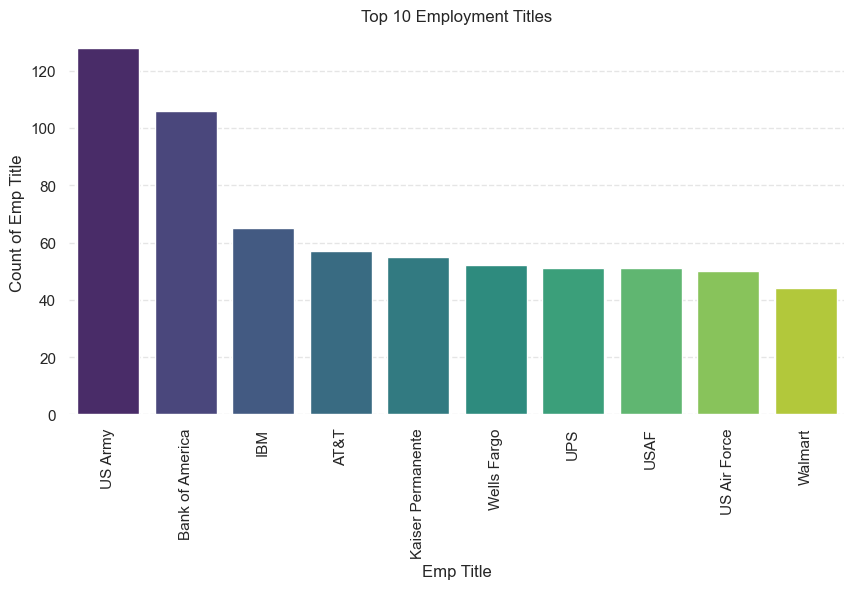

In [215]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=top10_emp_title.index, y=top10_emp_title.values, palette='viridis')
ax.set_ylabel('Count of Emp Title')
ax.set_xlabel('Emp Title')
plt.xticks(rotation=90)
manage_grid_lines(ax)
sns.despine(left=True, bottom=True)
plt.title('Top 10 Employment Titles')
plt.show()

**Observation:**
* The majority of loan takers are from the US Army, followed by Bank of America, IBM, and AT&T.
* Kaiser Permanente, Wells Fargo, UPS, USAF, US Air Force, and Walmart are also among the top 10 loan-taking employers.
* The number of loans per employer is relatively low, suggesting this variable is unlikely to significantly impact default rates.

#### Numerical Features

##### loan_amnt

**Definition**<br>
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [220]:
perform_univariate_analysis(loan_df, 'loan_amnt')


Univariate Analysis of 'loan_amnt'

Description grouped by loan_status:
               count          mean          std     min     25%      50%  \
loan_status                                                                
Charged Off   4943.0  12286.147077  8064.255961  1000.0  6000.0  10000.0   
Fully Paid   30424.0  10945.731166  7181.867451   500.0  5500.0   9600.0   

                 75%      max  
loan_status                    
Charged Off  17000.0  35000.0  
Fully Paid   15000.0  35000.0  

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: loan_amnt, dtype: int64

Overall value counts:
loan_amnt
10000    2587
12000    2118
5000     1821
6000     1748
15000    1701
         ... 
16550       1
11775       1
28600       1
11275       1
23575       1
Name: count, Length: 847, dtype: int64


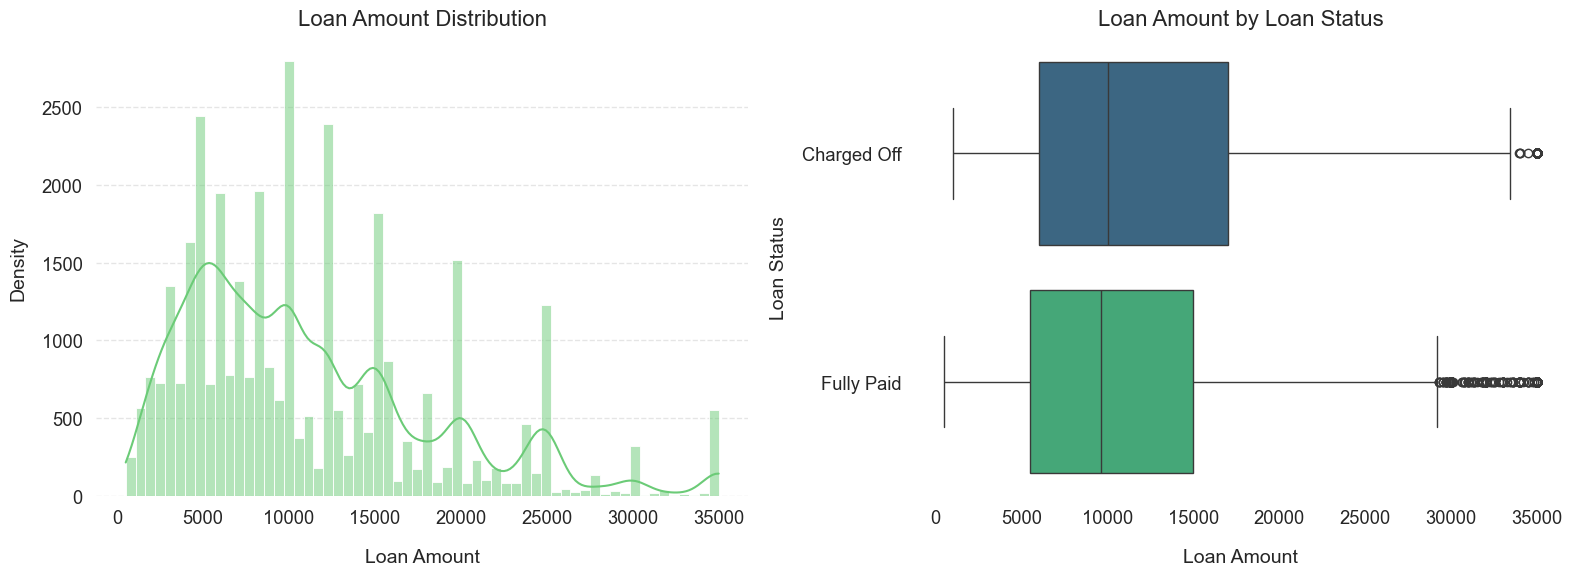

In [221]:
plot_distribution(loan_df, 'loan_amnt', 'Loan Amount')

Observations from the Distribution Plot: <br>

*   Most loans are clustered between \$5000 and \$15000
*   The distribution skews slightly to the right, indicating the presence of higher loan amounts, but they are less frequent
* There are noticeable peaks at certain amounts, suggesting these amounts might be common loan thresholds or limits offered by the lender
* Loans above \$20,000 are less frequent

Observations from the Box Plot: <br>

*   Overall median of Fully Paid loans tends to be slightly lower than those of Charged off
*   IQR for Charged Off loans is wider that Fully Paid loans indicating greater variance.
* The wider IQR and outliers for "Charged Off" loans do suggest that higher loan amounts are riskier, but this observation should be validated with further statistical analysis or correlation tests.





##### int_rate

**Definition**<br>
Interest Rate on the loan

In [225]:
perform_univariate_analysis(loan_df, 'int_rate')


Univariate Analysis of 'int_rate'

Description grouped by loan_status:
               count       mean       std   min    25%    50%    75%    max
loan_status                                                                
Charged Off   4943.0  13.929828  3.647619  5.42  11.49  13.79  16.45  24.40
Fully Paid   30424.0  11.667243  3.613734  5.42   8.59  11.49  14.09  24.11

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: int_rate, dtype: int64

Overall value counts:
int_rate
10.99    862
11.49    735
7.51     731
13.49    709
7.88     674
        ... 
17.46      1
16.96      1
16.20      1
18.72      1
11.22      1
Name: count, Length: 334, dtype: int64


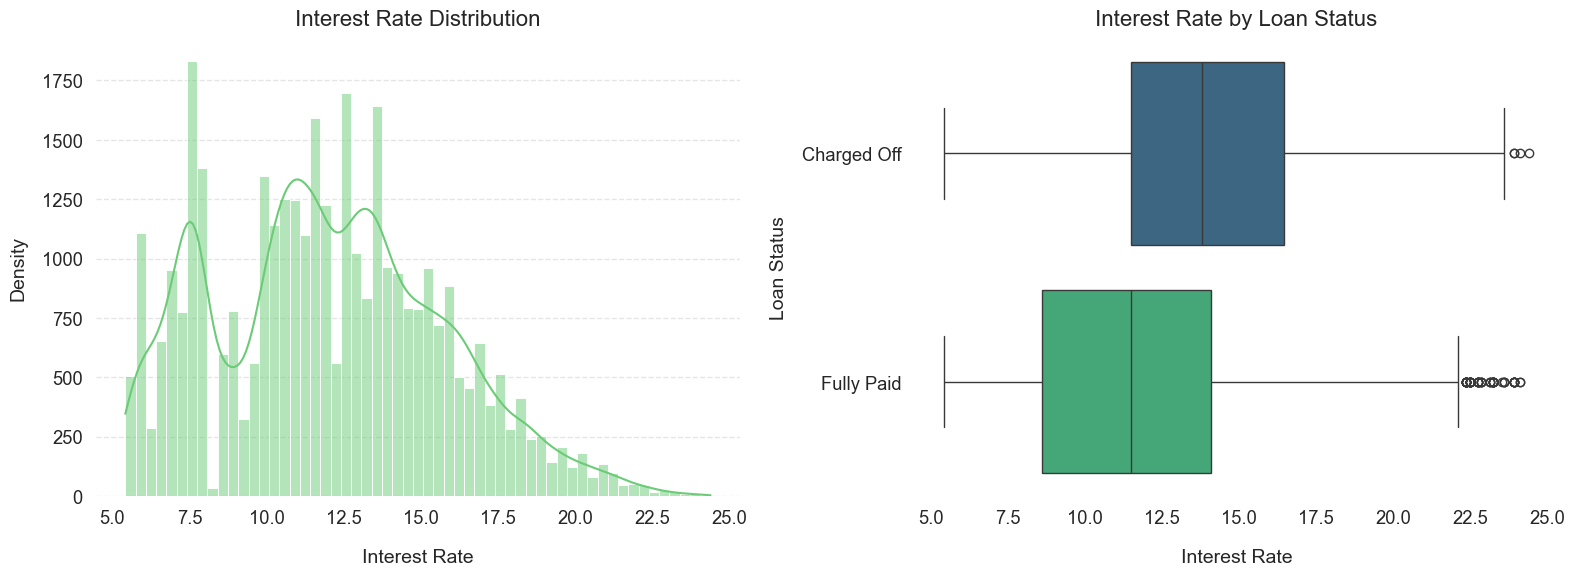

In [226]:
plot_distribution(loan_df, 'int_rate', 'Interest Rate')

**Observation:**
* The interest rate on loans ranges from 5.42% to 24.4%, with an average of 11.8%.
* Charged-off loans tend to have higher interest rates compared to fully paid loans. This is expected, as lenders typically charge higher rates to compensate for the increased risk associated with borrowers who are more likely to default. Further analysis is needed to explore this relationship in more detail.

##### installment

**Definition**<br>The monthly payment owed by the borrower if the loan originates.

In [229]:
perform_univariate_analysis(loan_df, 'installment')


Univariate Analysis of 'installment'

Description grouped by loan_status:
               count        mean         std    min       25%     50%  \
loan_status                                                             
Charged Off   4943.0  338.848452  214.527655  22.79  172.4350  298.33   
Fully Paid   30424.0  321.638693  205.828423  16.08  167.2975  278.24   

                  75%      max  
loan_status                     
Charged Off  458.3150  1305.19  
Fully Paid   422.3075  1295.21  

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: installment, dtype: int64

Overall value counts:
installment
311.11    65
311.02    53
180.96    52
150.80    43
368.45    43
          ..
515.16     1
460.71     1
165.26     1
456.63     1
99.44      1
Name: count, Length: 14028, dtype: int64


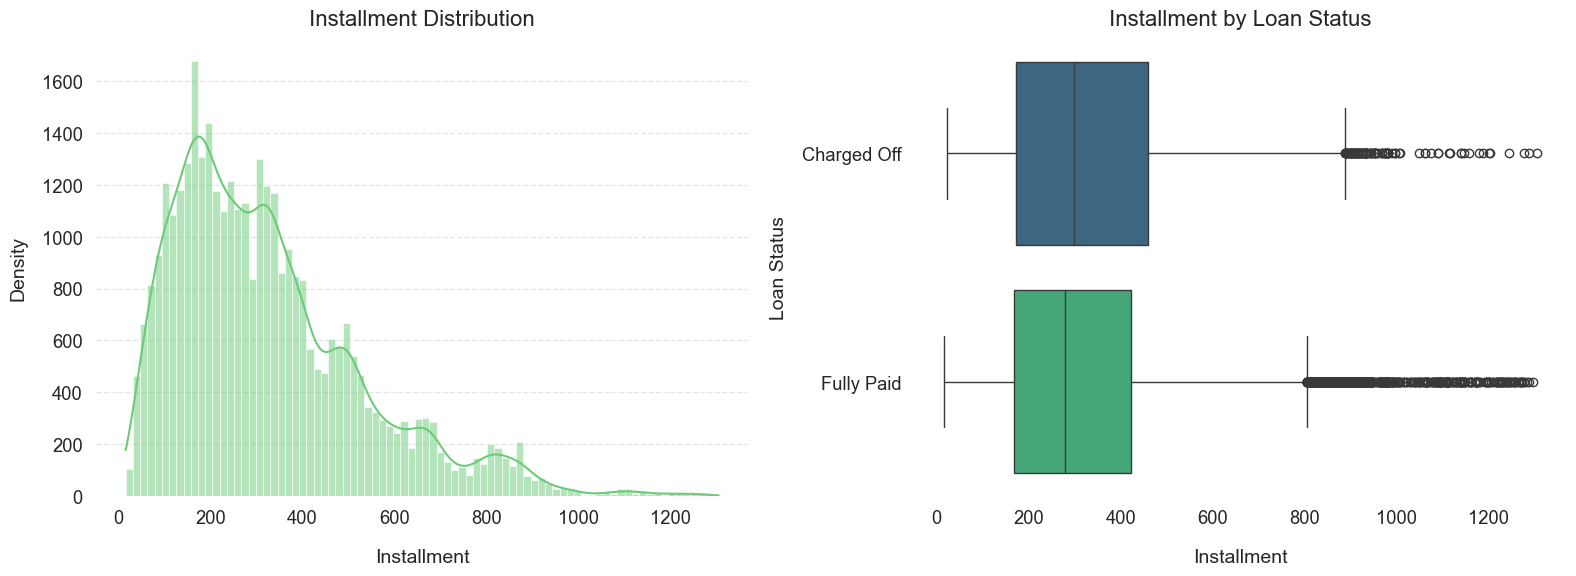

In [230]:
plot_distribution(loan_df, 'installment', 'Installment')

**Observation:**
-  Installment Amount varies largely between 170.08 to 420 with median of 280
-  Loans Charged Off have high installment on average

##### annual_inc
**Definition**<br>The self-reported annual income provided by the borrower during registration.

In [233]:
perform_univariate_analysis(loan_df, 'annual_inc')


Univariate Analysis of 'annual_inc'

Description grouped by loan_status:
               count          mean           std     min      25%      50%  \
loan_status                                                                  
Charged Off   4943.0  63019.486686  47410.855336  4080.0  38400.0  54000.0   
Fully Paid   30424.0  70083.236679  66215.462181  4000.0  42000.0  60000.0   

                 75%        max  
loan_status                      
Charged Off  75000.0  1250000.0  
Fully Paid   84000.0  6000000.0  

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: annual_inc, dtype: int64

Overall value counts:
annual_inc
60000.0    1331
50000.0     932
40000.0     780
45000.0     745
65000.0     735
           ... 
34224.0       1
53140.0       1
34884.0       1
80569.0       1
36153.0       1
Name: count, Length: 4831, dtype: int64


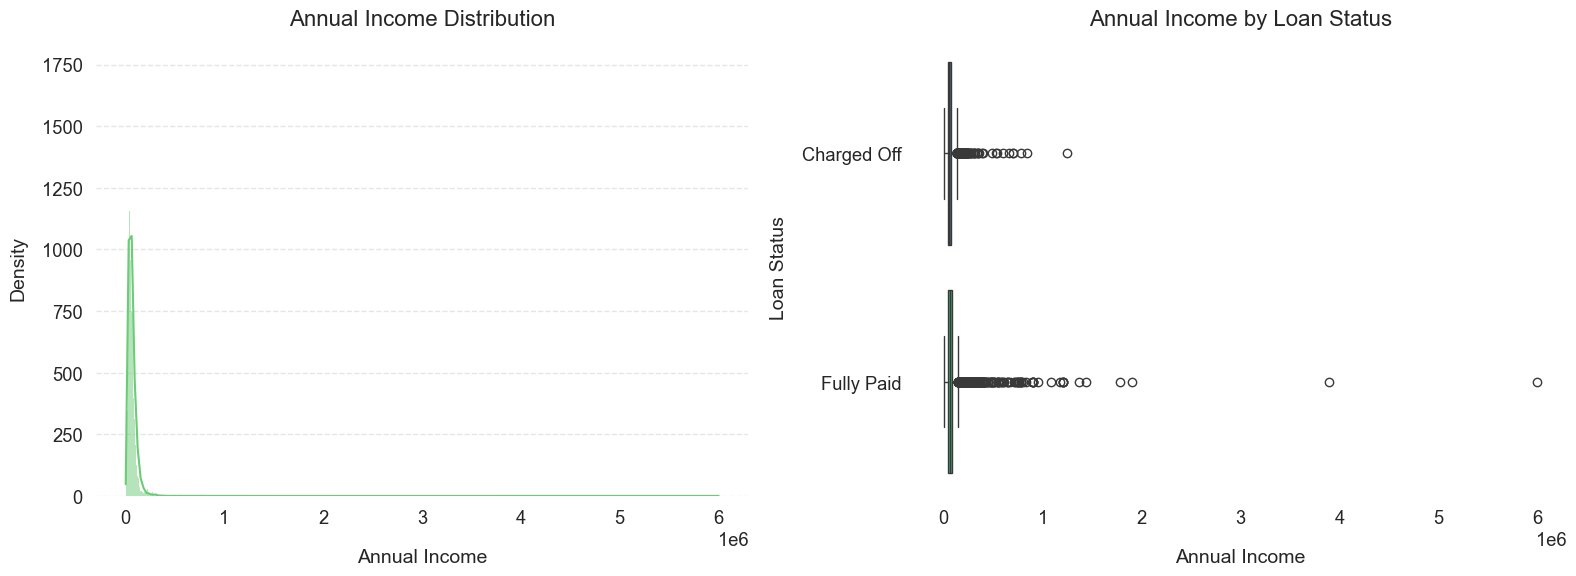

In [234]:
plot_distribution(loan_df, 'annual_inc', 'Annual Income')

The annual income reprted by the borrowers range from min of 4,000 to max of 6,000,000.
There are clearly people with distinctly large income who applying for relatively small loans (up to a maximum of 35,000).
<br> Median annual income is around 60,000
<br> Most people have an annual income less than 115000

**Outlier Detection and Handling**

In [236]:
df = loan_df[np.abs(loan_df.annual_inc-loan_df.annual_inc.mean()) <= (3*loan_df.annual_inc.std())]

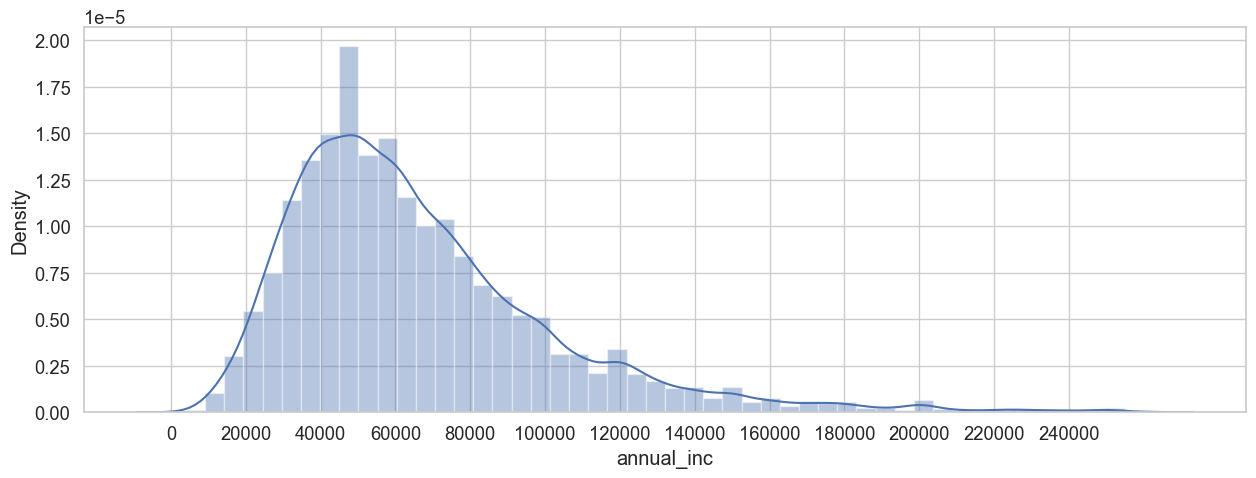

In [237]:
plt.figure(figsize=(15, 5))
sns.distplot(df['annual_inc'], hist_kws={'log':False})
plt.xticks(np.arange(0, 260000, 20000))
plt.show()

**Observation:**
-  10000 seems to be a good bin size to further analyze income as categories

In [239]:
#Create Derived categorical variable
loan_df['income_bin'] = loan_df['annual_inc']/20000
#loan_df['income_bin'] = pd.cut(loan_df['annual_inc'], [x for x in range(0, 6010000, 10000)], labels=[str(x)+'-'+str(x+10)+'k' for x in range (0, 6000, 10)])
loan_df['income_bin'] = loan_df['income_bin'].astype(int)


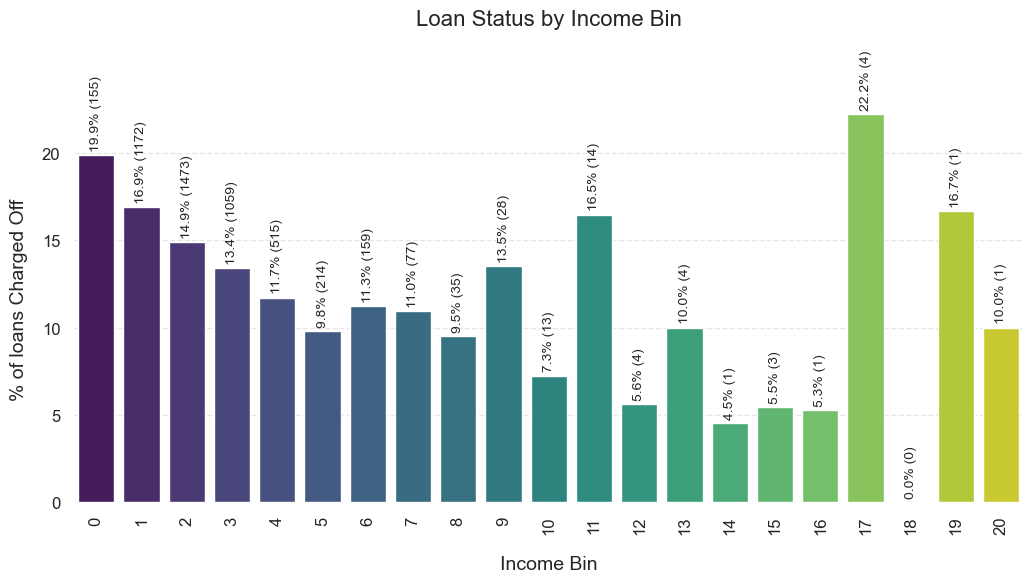

In [240]:

plot_percent_against_loan_status(loan_df.loc[loan_df['income_bin']<21], 'income_bin', 'Income Bin', 90, 50)



**Observation:**
* Loan defaults are higher for lower income, and progressively reduce as incomes go up.
* It will be interesting to see a bivariate analysis of defaults by income buckets and loan amounts later.


##### title
**Definition**<br>The loan title provided by the borrower

In [243]:
perform_univariate_analysis(loan_df, 'title')


Univariate Analysis of 'title'

Description grouped by loan_status:
             count unique                 top  freq
loan_status                                        
Charged Off   4943   2853  Debt Consolidation   277
Fully Paid   30424  15544  Debt Consolidation  1698

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: title, dtype: int64

Overall value counts:
title
Debt Consolidation                        1975
Debt Consolidation Loan                   1541
Personal Loan                              589
Consolidation                              462
debt consolidation                         440
                                          ... 
black bike                                   1
new Home                                     1
Avidity Bowls                                1
Debt-Free                                    1
Merging 2 Accounts into one to save $$       1
Name: count, Length: 17662, dtype: int64


**Observation:**
- title column has 17662 unique values describing the loan by the borrower. This information is already captured with purpose column under 14 catergories of purpose. We will drop this column

In [245]:
loan_df.drop('title', axis=1, inplace=True)


##### addr_state
**Definition**<br>The state provided by the borrower in the loan application

In [247]:
loan_df.addr_state.value_counts(normalize=True).head(10)

addr_state
CA    0.180847
NY    0.095739
FL    0.071677
TX    0.069358
NJ    0.047134
IL    0.039048
PA    0.038822
VA    0.035626
GA    0.035429
MA    0.033393
Name: proportion, dtype: float64

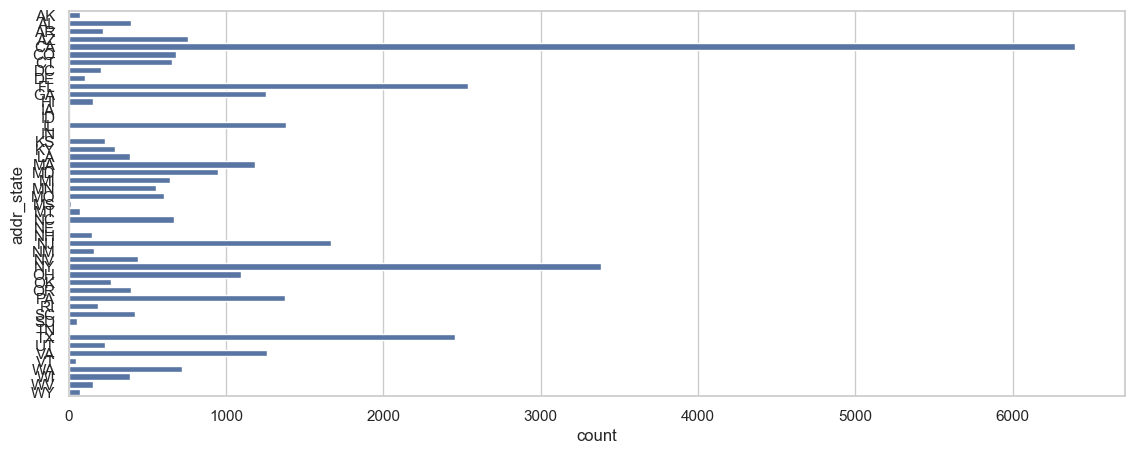

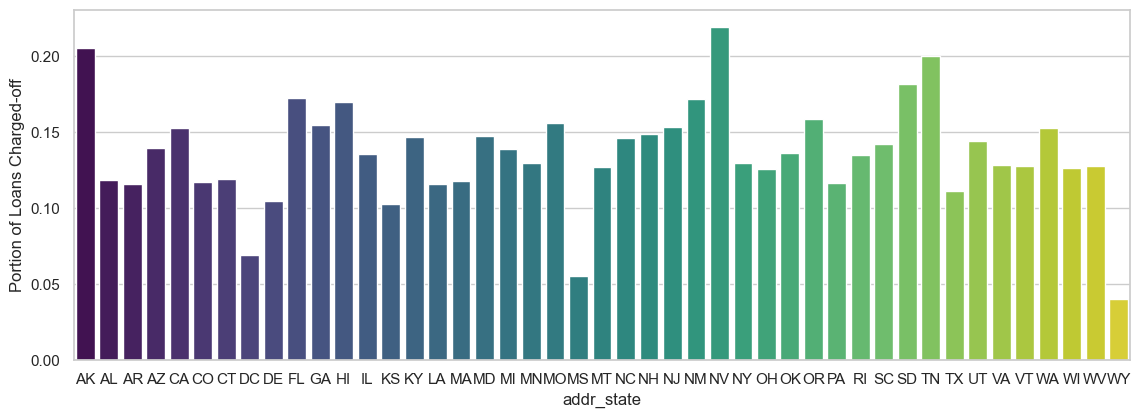

In [248]:
plt.figure(figsize=(30,5))
plt.subplot(1, 2, 1)
sns.countplot(loan_df['addr_state'], order=sorted(loan_df.addr_state.unique()))

#Fraction of loans charged off and fully Paid
charge_off_count = loan_df.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
Fully_paid_count = loan_df.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Fully Paid']

plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=charge_off_count.index, y=charge_off_count.values, palette='viridis')
a.set_ylabel('Portion of Loans Charged-off')
plt.show()


**Observation:**
* California accounts for the largest share of loans (approximately 18%), followed by New York (9.5%) and Florida (7%). This is expected, as these are the three most populous US states.
* States with higher charge-off rates have a relatively small number of loans. Their percentages are therefore not statistically significant for analysis and will be ignored.


##### dti
**Definition**<br>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [251]:
perform_univariate_analysis(loan_df, 'dti')


Univariate Analysis of 'dti'

Description grouped by loan_status:
               count       mean       std  min    25%     50%    75%    max
loan_status                                                                
Charged Off   4943.0  14.160908  6.522564  0.0  9.355  14.440  19.34  29.85
Fully Paid   30424.0  13.280979  6.646843  0.0  8.160  13.345  18.53  29.99

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: dti, dtype: int64

Overall value counts:
dti
0.00     140
12.00     39
18.00     38
19.20     37
13.20     36
        ... 
25.04      1
29.86      1
27.82      1
27.69      1
25.43      1
Name: count, Length: 2842, dtype: int64


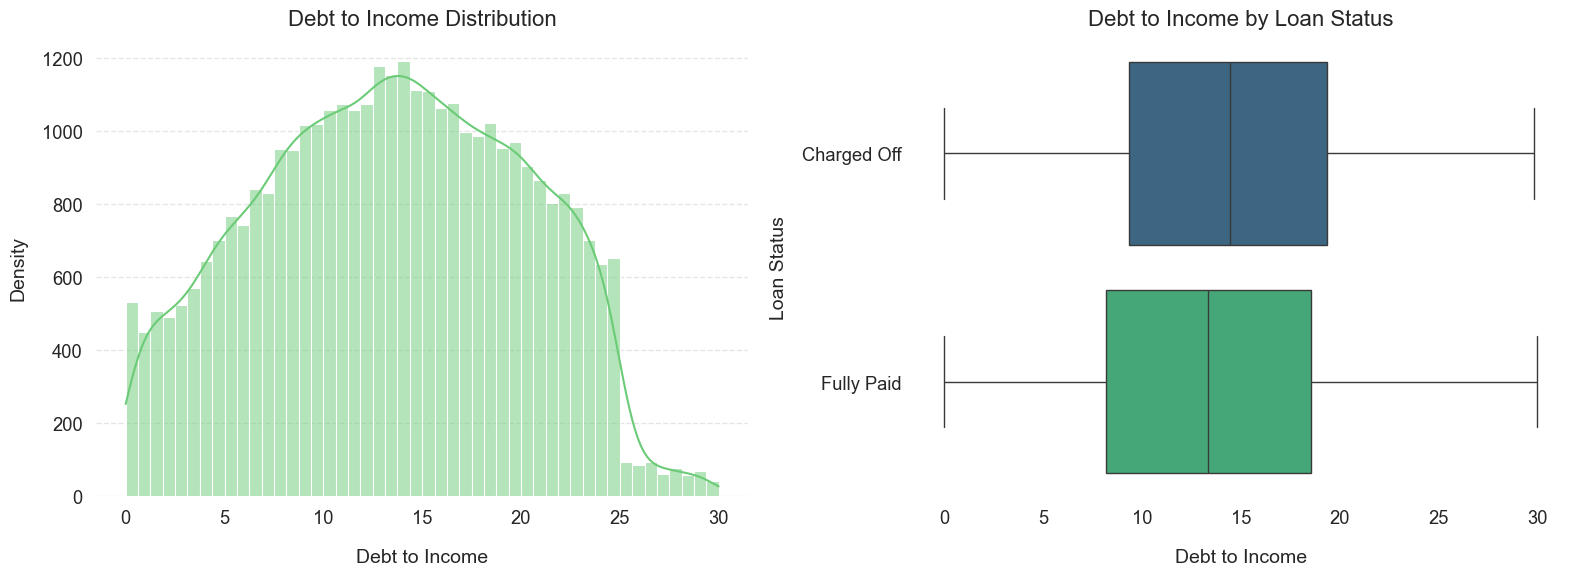

In [252]:
plot_distribution(loan_df, 'dti', 'Debt to Income')

**Observations**
* The dti index varies from min 0 to max of 30. The median dti is of 13.5


##### delinq_2yrs
**Definition**<br>The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.

In [255]:
perform_univariate_analysis(loan_df, 'delinq_2yrs')


Univariate Analysis of 'delinq_2yrs'

Description grouped by loan_status:
               count      mean       std  min  25%  50%  75%   max
loan_status                                                       
Charged Off   4943.0  0.165082  0.529825  0.0  0.0  0.0  0.0   8.0
Fully Paid   30424.0  0.143275  0.486766  0.0  0.0  0.0  0.0  11.0

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: delinq_2yrs, dtype: int64

Overall value counts:
delinq_2yrs
0     31533
1      2939
2       614
3       189
4        53
5        21
6        10
7         4
8         2
9         1
11        1
Name: count, dtype: int64


In [256]:
loan_df.delinq_2yrs.value_counts(normalize=True)

delinq_2yrs
0     0.891594
1     0.083100
2     0.017361
3     0.005344
4     0.001499
5     0.000594
6     0.000283
7     0.000113
8     0.000057
9     0.000028
11    0.000028
Name: proportion, dtype: float64

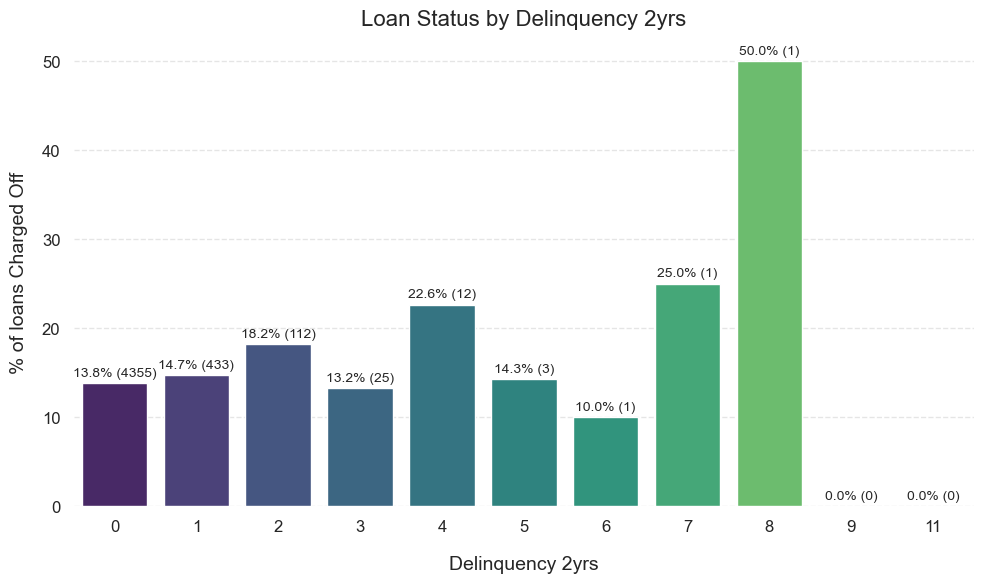

In [257]:
plot_percent_against_loan_status(loan_df, 'delinq_2yrs', 'Delinquency 2yrs')

**Observation:**
*  The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years values ranges between 0 and 11.
* There are higher chances of default if this variable is greater than 1.
* <mark> Not considered for further analysis



##### earliest_cr_line
**Definition**<br>The month the borrower's earliest reported credit line was opened.

In [260]:
loan_df[loan_df.earliest_cr_line_year > 2011]['earliest_cr_line_year'].unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054])

Years are causing Millenium Error

In [262]:
loan_df.loc[loan_df.earliest_cr_line_year > 2011, 'earliest_cr_line_year'] = loan_df.loc[loan_df.earliest_cr_line_year > 2011, 'earliest_cr_line_year'] - 100

In [263]:
loan_df[loan_df.earliest_cr_line_year > 2011]['earliest_cr_line_year'].unique()

array([], dtype=int32)

In [264]:
loan_df.earliest_cr_line_year.value_counts(normalize=True).head()

earliest_cr_line_year
2000    0.083326
1999    0.076201
1998    0.072638
2001    0.065259
1997    0.062403
Name: proportion, dtype: float64

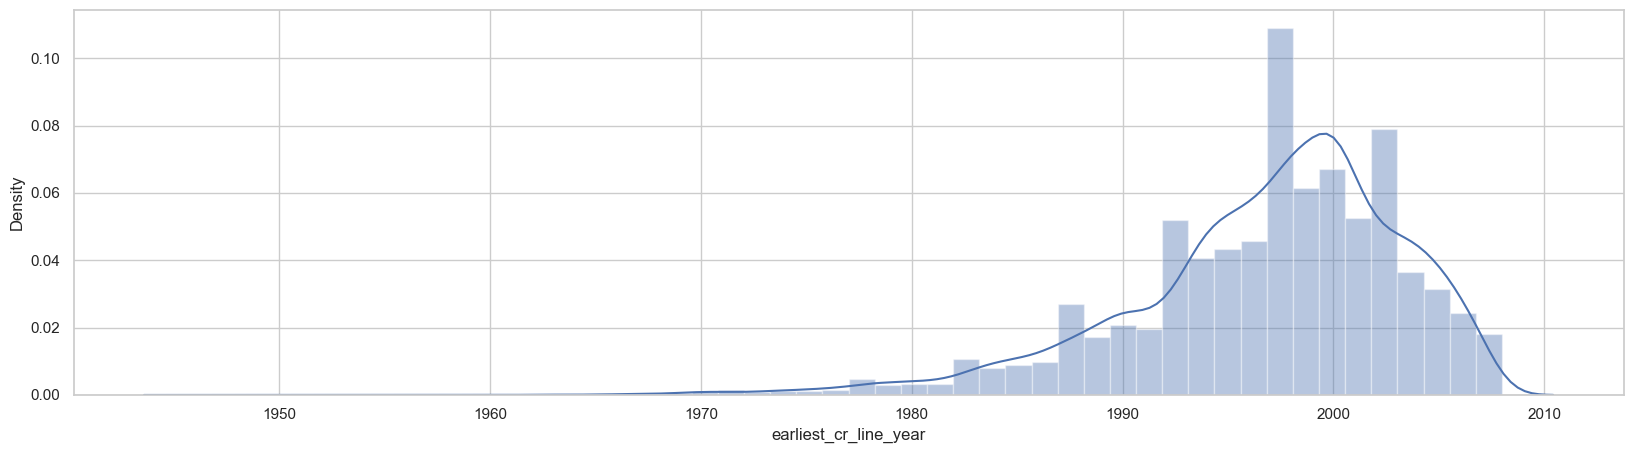

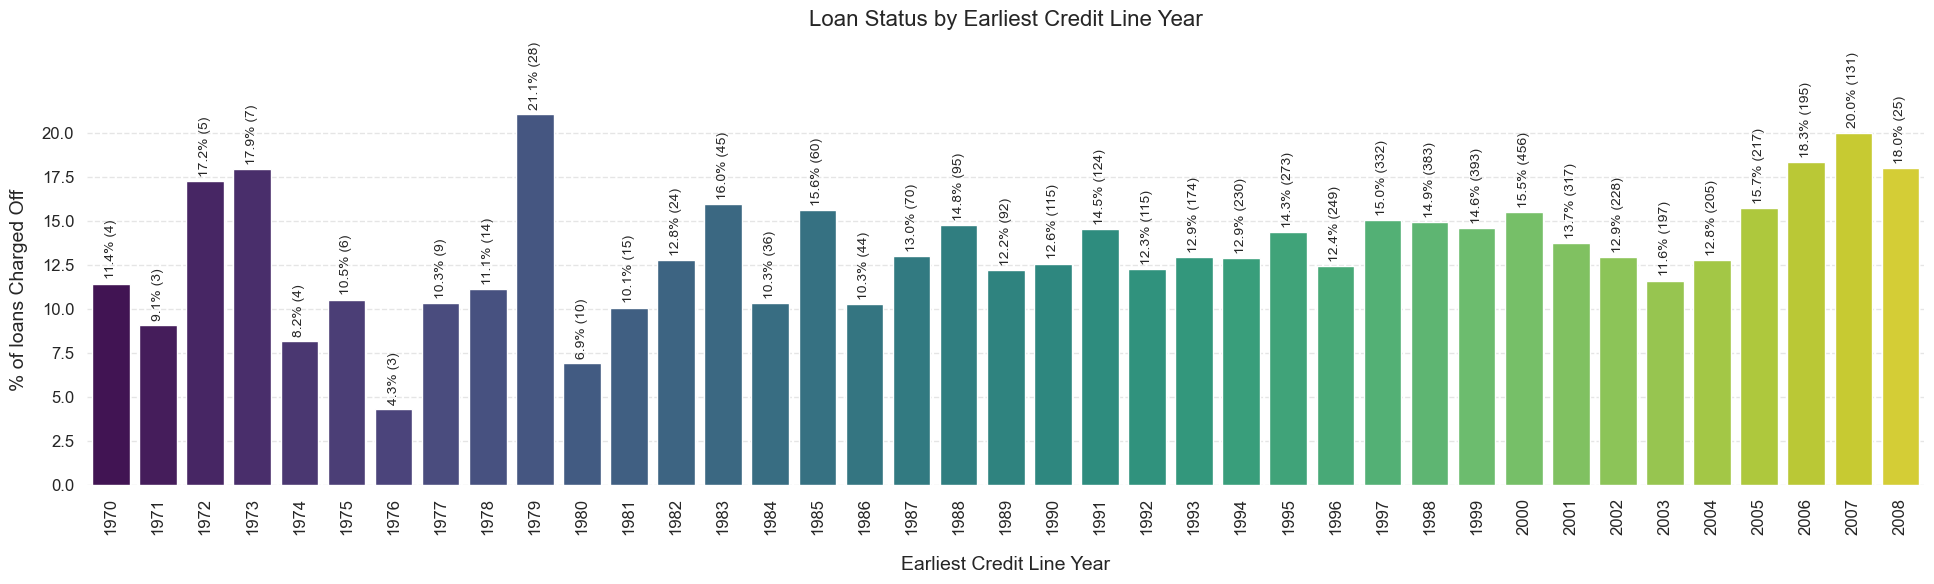

In [265]:
plt.figure(figsize=(20,5))
sns.distplot(loan_df['earliest_cr_line_year'])
plot_percent_against_loan_status(
    loan_df.loc[loan_df['earliest_cr_line_year']>1969],
    'earliest_cr_line_year', 'Earliest Credit Line Year',
    90, 50
)
plt.show()


**Observation:**
* Borrowers with more recent credit histories tend to default more frequently. This is potentially linked to economic downturns like the 2008 subprime crisis and the high-inflation period of the late 1970s.
* Individuals who first borrow during recessions are more prone to default. However, this factor will be excluded from further analysis.


##### open_acc
**Definition**<br>The number of open credit lines in the borrower's credit file.

In [268]:
perform_univariate_analysis(loan_df, 'open_acc')


Univariate Analysis of 'open_acc'

Description grouped by loan_status:
               count      mean       std  min  25%  50%   75%   max
loan_status                                                        
Charged Off   4943.0  9.308517  4.491786  2.0  6.0  9.0  12.0  38.0
Fully Paid   30424.0  9.335820  4.355764  2.0  6.0  9.0  12.0  44.0

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: open_acc, dtype: int64

Overall value counts:
open_acc
7     3584
6     3519
8     3506
9     3341
10    2863
5     2815
11    2485
12    2055
4     2041
13    1709
14    1327
3     1294
15    1069
16     847
17     658
18     489
2      477
19     361
20     263
21     222
22     128
23      83
24      64
25      50
26      29
28      22
27      20
30      13
29      12
34       5
31       5
33       3
32       2
36       2
39       1
38       1
44       1
35       1
Name: count, dtype: int64


The median of the distribution sugests that by large the borrower's seem to have 9 open credit lines.

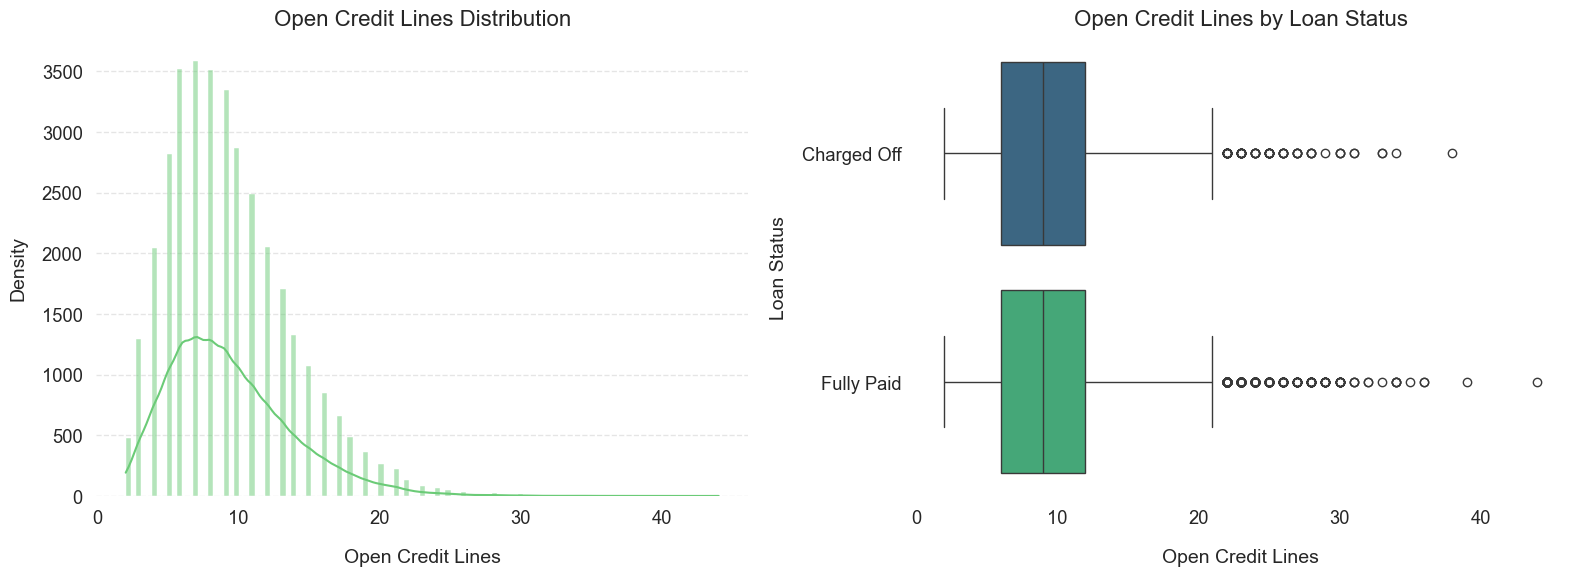

In [270]:
plot_distribution(loan_df, 'open_acc', 'Open Credit Lines')

**Observation:**
-  The median of the distribution sugests that by large the borrower's seem to have 9 open credit lines.
- There is no significant difference in the credit lines of charged off and fully paid loans.


##### revol_bal
**Definition**<br>Total credit revolving balance

In [273]:
loan_df.revol_bal.describe()

count     35367.000000
mean      13367.676733
std       15678.460397
min           0.000000
25%        3782.000000
50%        8934.000000
75%       17064.500000
max      149588.000000
Name: revol_bal, dtype: float64

In [274]:
perform_univariate_analysis(loan_df, 'revol_bal')


Univariate Analysis of 'revol_bal'

Description grouped by loan_status:
               count          mean           std  min     25%     50%  \
loan_status                                                             
Charged Off   4943.0  13680.089824  14768.969553  0.0  4246.5  9562.0   
Fully Paid   30424.0  13316.918847  15820.937992  0.0  3711.0  8833.0   

                 75%       max  
loan_status                     
Charged Off  17809.0  147365.0  
Fully Paid   16941.0  149588.0  

Count grouped by loan_status:
loan_status
Charged Off     4943
Fully Paid     30424
Name: revol_bal, dtype: int64

Overall value counts:
revol_bal
0        821
1         11
1763       9
39         9
1284       8
        ... 
31849      1
5113       1
3725       1
15596      1
26233      1
Name: count, Length: 20351, dtype: int64


The revolving bal varies from min 0 to max of 60376. The median revol_bal is 8712.

**Outlier Detection and Handling**

In [276]:
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
loan_df = loan_df[np.abs(loan_df.revol_bal-loan_df.revol_bal.mean()) <= (3*loan_df.revol_bal.std())]

The values vary a lot. Transforming to a log scale will help analyse better.

In [278]:
loan_df['revol_bal_log'] = loan_df['revol_bal'].apply(lambda x : np.log(x+1))

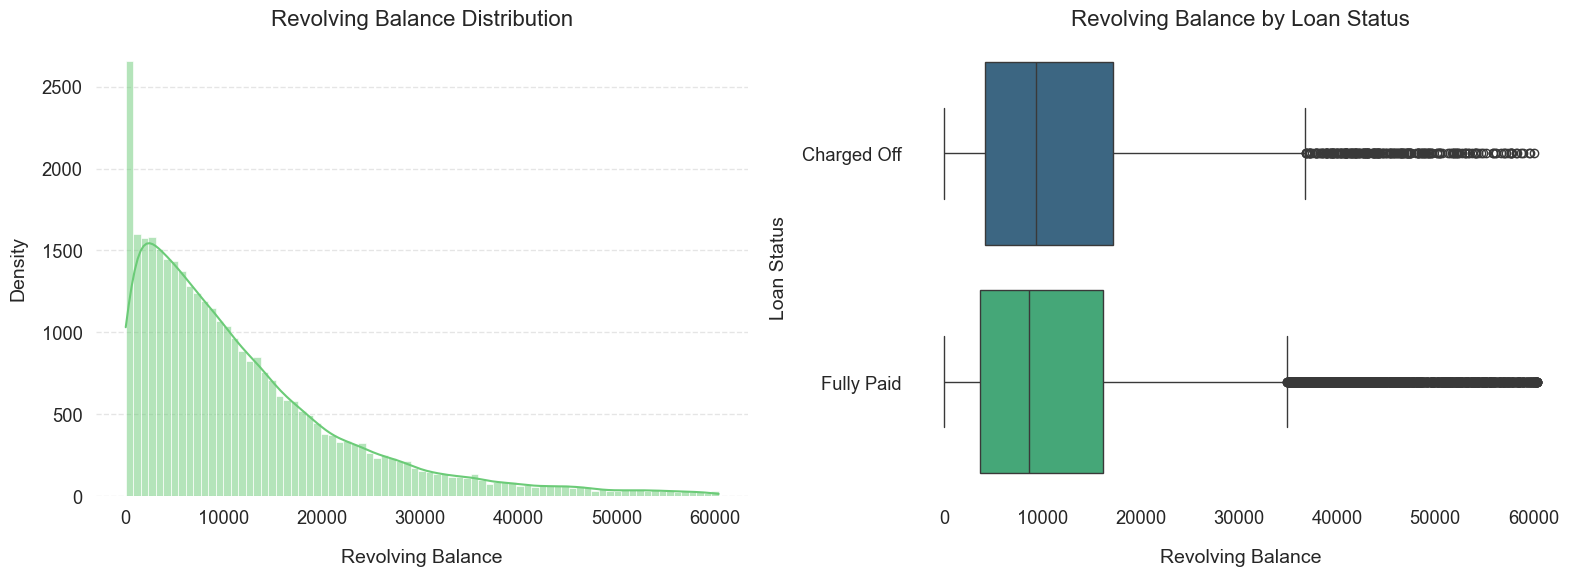

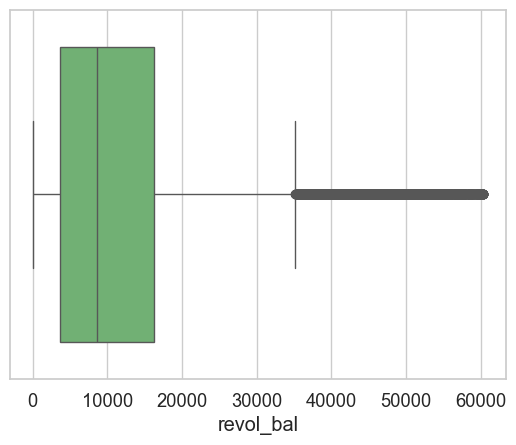

In [279]:
plot_distribution(loan_df, 'revol_bal', 'Revolving Balance')
sns.boxplot(x=loan_df['revol_bal'], data=loan_df, palette=['#66BB6A'])
plt.show()

**Observation:**
-  There is no large difference in revolving balance mean for charged off an fully Paid loans


##### revol_util
Data_Dictionary:Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [282]:
loan_df.revol_util.describe()

count    34597.000000
mean        48.904609
std         28.210493
min          0.000000
25%         25.600000
50%         49.400000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

In [283]:
perform_univariate_analysis(loan_df, 'revol_util')


Univariate Analysis of 'revol_util'

Description grouped by loan_status:
               count       mean        std  min   25%   50%   75%   max
loan_status                                                            
Charged Off   4858.0  56.047332  27.661062  0.0  35.3  59.2  79.0  99.9
Fully Paid   29739.0  47.737813  28.127861  0.0  24.3  47.8  70.8  99.9

Count grouped by loan_status:
loan_status
Charged Off     4858
Fully Paid     29739
Name: revol_util, dtype: int64

Overall value counts:
revol_util
0.00     824
0.20      57
32.00     53
63.00     53
68.70     52
        ... 
0.83       1
47.36      1
24.65      1
33.39      1
7.28       1
Name: count, Length: 1079, dtype: int64


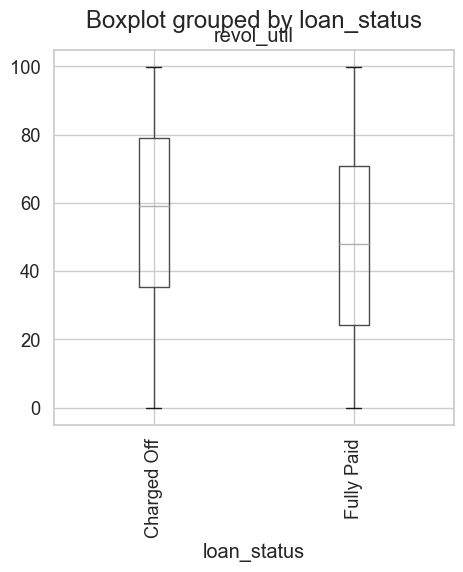

In [284]:
fig, ax = plt.subplots(figsize=(5,5))
loan_df.boxplot(column=['revol_util'],by='loan_status', ax=ax, rot=90)
plt.show()

**Observation:**
-  The average utilization rate is around 49%
-  <mark>Average revolving Utilisation rate is seen to be higher for Charged Off loans than the Fully Paid loans</mark>. This requires more analysis.

In [286]:
loan_df['revol_util_bin'] = round(loan_df['revol_util']/5)

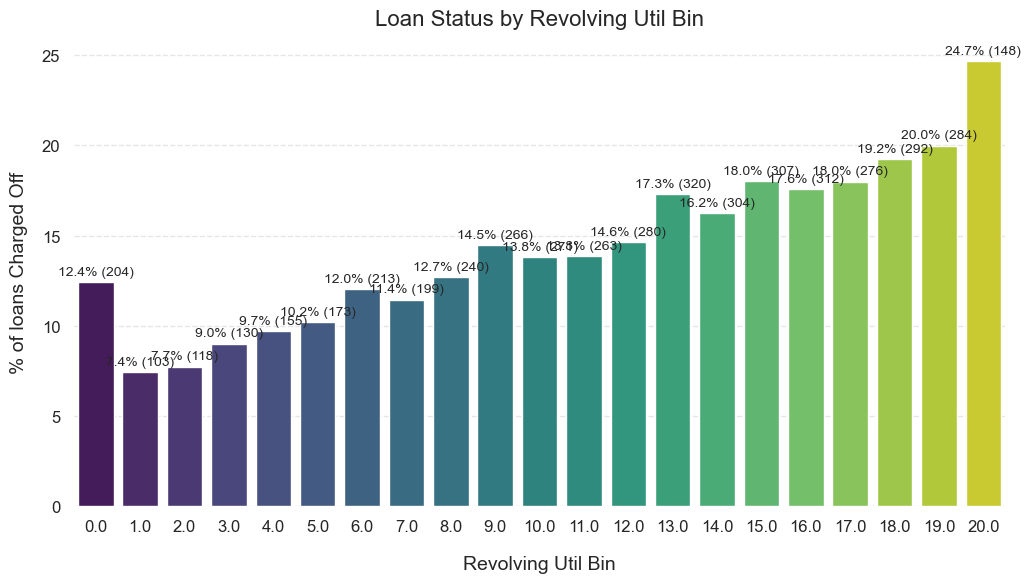

In [287]:
plot_percent_against_loan_status(loan_df, 'revol_util_bin', 'Revolving Util Bin')


##### total_acc
**Definition**<br>The total number of credit lines currently in the borrower's credit file.

In [289]:
loan_df.total_acc.describe()

count    34597.000000
mean        22.006272
std         11.325562
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

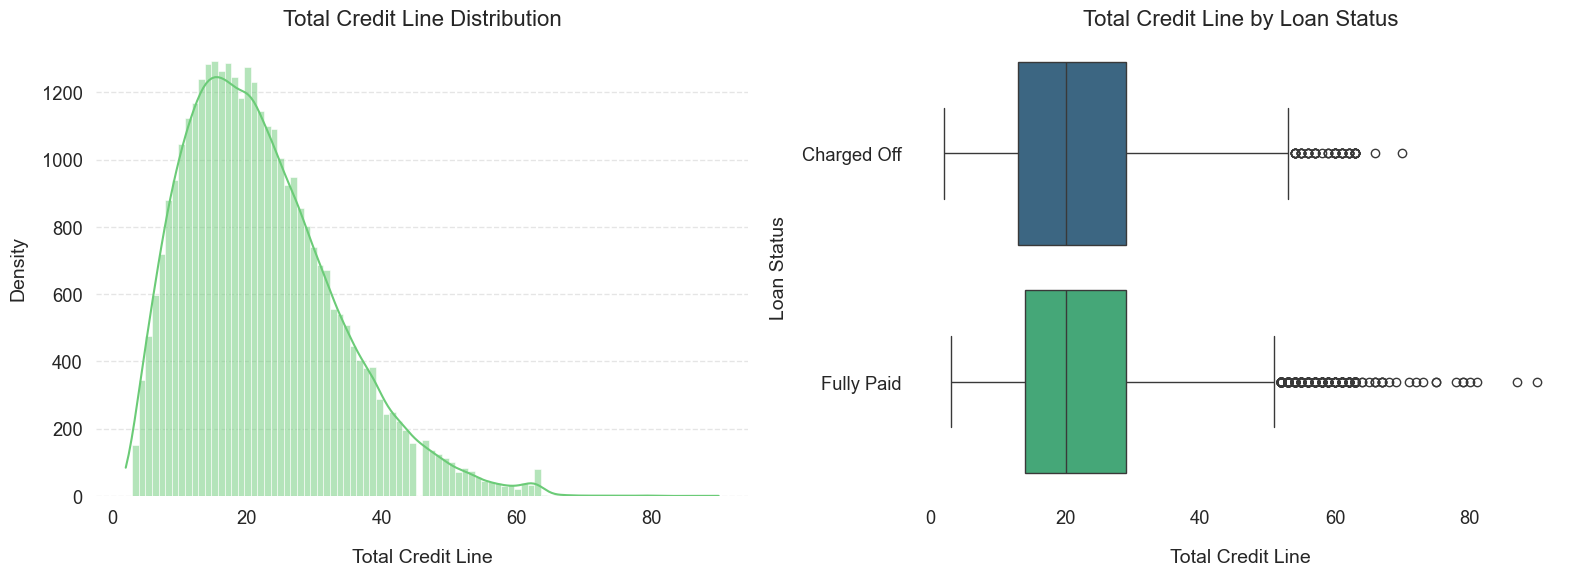

In [290]:
plot_distribution(loan_df, 'total_acc', 'Total Credit Line')

**Observation:**
-  The are approx. 22 average credit lines for the borrower's.
-  There is no big difference between the Charged Off and Fully Paid credit lines

##### total_pymnt
**Definition**<br>Payments received to date for total amount funded.

In [293]:
loan_df.total_pymnt.describe()

count    34597.000000
mean     11894.392156
std       8715.509427
min         33.730000
25%       5571.230000
50%       9771.780000
75%      16113.960000
max      58563.680000
Name: total_pymnt, dtype: float64

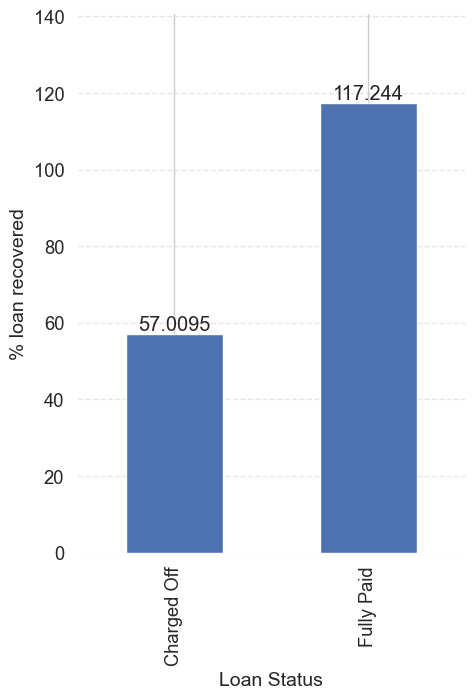

In [294]:
plt.figure(figsize=(5,7))
ax = (loan_df.groupby('loan_status').total_pymnt.sum() * 100 / loan_df.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=14)
ax.set_xlabel('Loan Status', fontsize=14)
plt.margins(0.2, 0.2)
for container in ax.containers:
    ax.bar_label(container)
manage_grid_lines(ax)
sns.despine(left=True, bottom=True)
plt.show()

<span style='color: red;'>Lending Club is only able to recover 57% of all charged off loans, and from fully paid loans it is able to make a profit of only 17%</span>

In [296]:
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
loan_df = loan_df[np.abs(loan_df.total_pymnt-loan_df.total_pymnt.mean()) <= (3*loan_df.total_pymnt.std())]

In [297]:
loan_df['total_pymnt'] = loan_df['total_pymnt'].apply(lambda x : np.log(x))

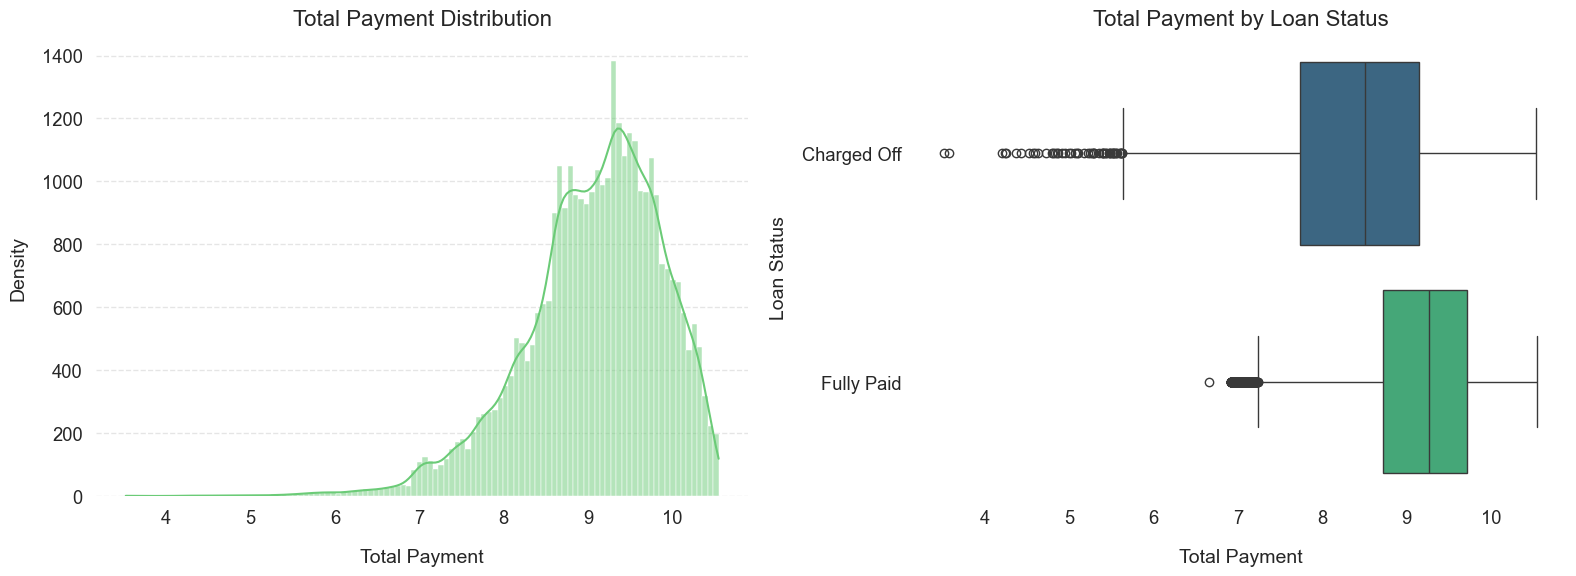

In [298]:
plot_distribution(loan_df, 'total_pymnt', 'Total Payment')

**Observation:**
-  The average payment received to date for the Charged Off loan is comparatively less than Fully Paid loans.
-  This variable may not be avaialble at the time of loan funding. We can drop this varaible from analysis.

In [300]:
loan_df = loan_df.drop('total_pymnt',axis=1)


##### total_pymnt_inv
**Definition**<br>Payments received to date for portion of total amount funded by investors.

**Observation:**
-  This variable may not be avaialble at the time of loan funding. We can drop this variable from analysis.

In [303]:
loan_df = loan_df.drop('total_pymnt_inv',axis=1)


##### total_rec_prncp
**Definition**<br>Principal received to date

**Observation:**
-  This variable may not be available at the time of loan funding. we can remove this variable from analysis.

In [306]:
loan_df = loan_df.drop('total_rec_prncp',axis=1)


##### total_rec_int
**Definition**<br>Interest received to date.

**Observation:**
-  This variable may not be avaialble at the time of loan funding. We may drop this variable from analysis.

In [309]:
loan_df = loan_df.drop('total_rec_int',axis=1)


##### total_rec_late_fee
**Definition**<br>Late fees received to date.

**Observation:**
-  The distribution of late fee is very insignificant to this analysis. we can drop this variable.
-  This variable may not be avaialble at the time of loan funding.

In [312]:
loan_df = loan_df.drop('total_rec_late_fee',axis=1)


##### recoveries
**Definition**<br>post charge off gross recovery.

**Observation:**
-  Recoveries is only for the Charged Off loans.
- This Variable does not help as it comes to action after the loan has been Charged Off. Lets drop this variable.

In [315]:
loan_df = loan_df.drop('recoveries',axis=1)


##### collection_recovery_fee
**Definition**<br>post charge off collection fee.

**Observation:**
-  collection_recovery_fee is only for the Charged Off loans.
- This Variable does not help as it comes to action after the loan has been Charged Off. Lets drop this variable.

In [318]:
loan_df = loan_df.drop('collection_recovery_fee',axis=1)


##### last_pymnt_d
**Definition**<br>Last month payment was received.<br>
**Note**<br>
We have already dropped this column as we have created last_pymnt_d_year and last_pymnt_d_month

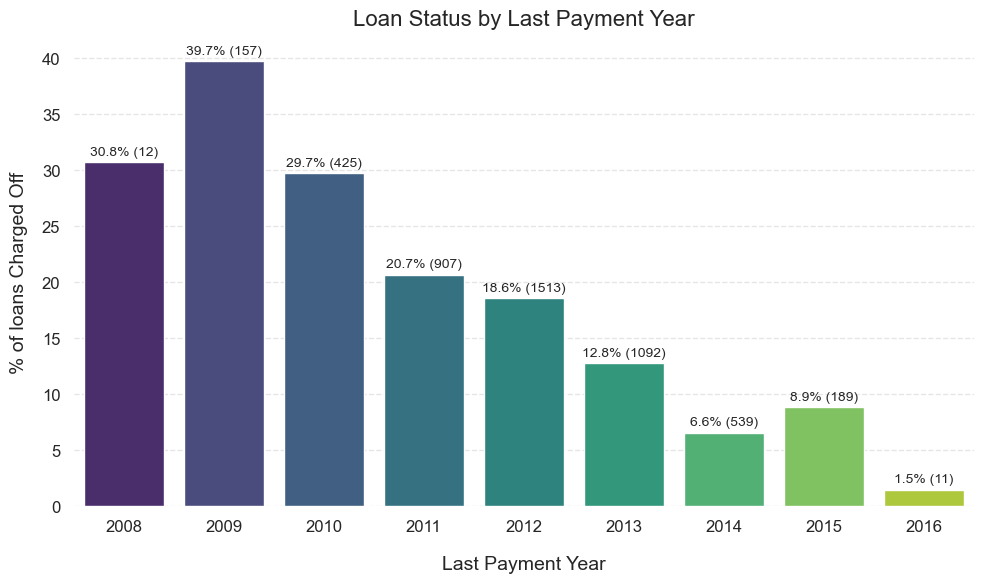

In [320]:
plot_percent_against_loan_status(loan_df, 'last_pymnt_d_year', 'Last Payment Year')


**Observation:**
*  Overall, around 75% of the last payment dates are during 2012-2014 period.
*  40% of loans with a last payment date of 2009 are Charged Off.
* This variable does not affect analysis and will be ignored.
* The American subprime mortgage crisis was a multinational financial crisis that occurred between 2007 and 2010 that contributed to the 2007–2008 global financial crisis. The crisis led to a severe economic recession, with millions losing their jobs and many businesses going bankrupt. Source: Wikipedia


##### last_pymnt_amnt
**Definition**<br>Last total payment amount received.

In [323]:
perform_univariate_analysis(loan_df, 'last_pymnt_amnt')


Univariate Analysis of 'last_pymnt_amnt'

Description grouped by loan_status:
               count         mean          std   min     25%     50%      75%  \
loan_status                                                                     
Charged Off   4845.0   325.325422   497.317468  0.01  117.43  241.33   403.97   
Fully Paid   29229.0  3031.433908  4431.620667  0.16  257.23  867.79  4174.13   

                 max  
loan_status           
Charged Off  11800.0  
Fully Paid   36115.2  

Count grouped by loan_status:
loan_status
Charged Off     4845
Fully Paid     29229
Name: last_pymnt_amnt, dtype: int64

Overall value counts:
last_pymnt_amnt
200.00     16
100.00     13
50.00      12
150.00     11
400.00     11
           ..
2156.45     1
4557.73     1
3820.84     1
2430.00     1
1016.15     1
Name: count, Length: 30818, dtype: int64


The value vary a lot. Lets conver it to log scale and plot to find trend.

In [325]:
loan_df['last_pymnt_amnt_log'] = loan_df['last_pymnt_amnt'].apply(lambda x : np.log(x+1))

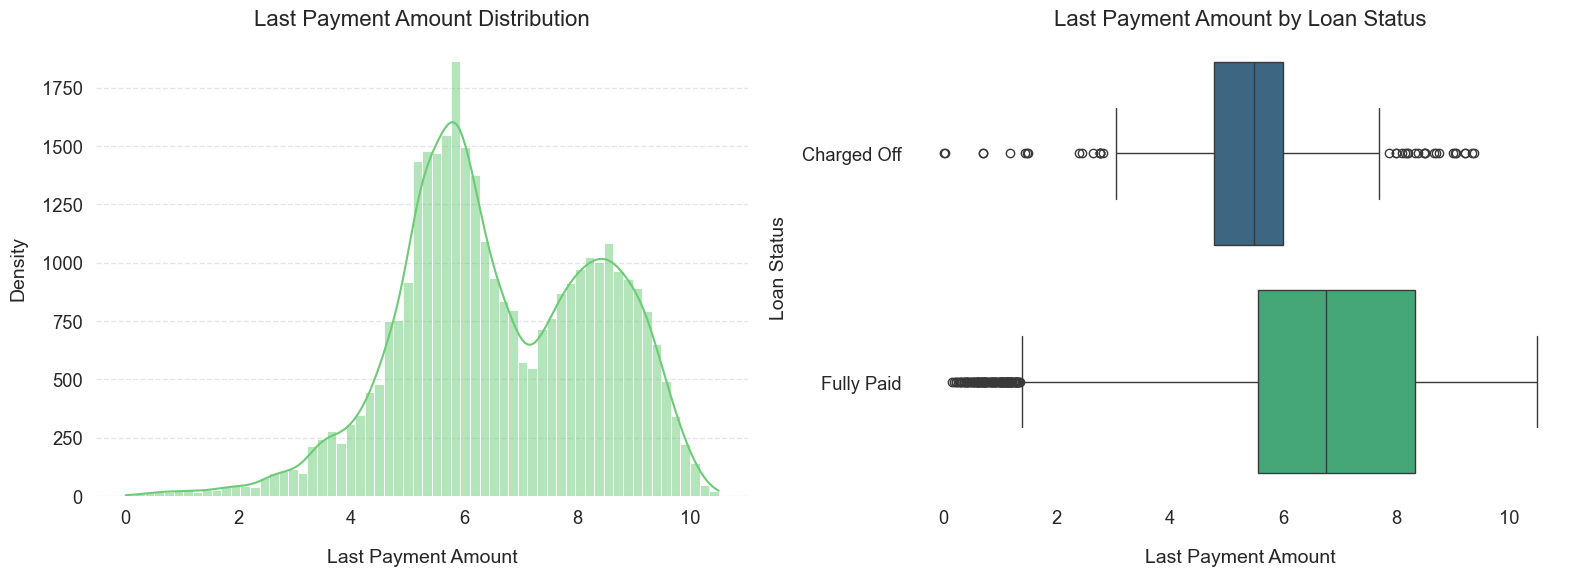

In [326]:
plot_distribution(loan_df, 'last_pymnt_amnt_log', 'Last Payment Amount')

**Observation:**
-  The last Payment amount received is significantly lower for Charged Off loans as compared to the Fully Paid loans. This is expected in case of charged of loans


##### last_credit_pull_d
**Definition**<br>The most recent month LC pulled credit for this loan<br>
**Note**<br>
We have already dropped this column and have created two columns last_credit_pull_d_month, last_credit_pull_d_year

In [329]:
loan_df.last_credit_pull_d_year.value_counts(normalize=True)

last_credit_pull_d_year
2016    0.372660
2014    0.162206
2015    0.145008
2013    0.135939
2012    0.106768
2011    0.054646
2010    0.018049
2009    0.004197
2008    0.000528
Name: proportion, dtype: float64

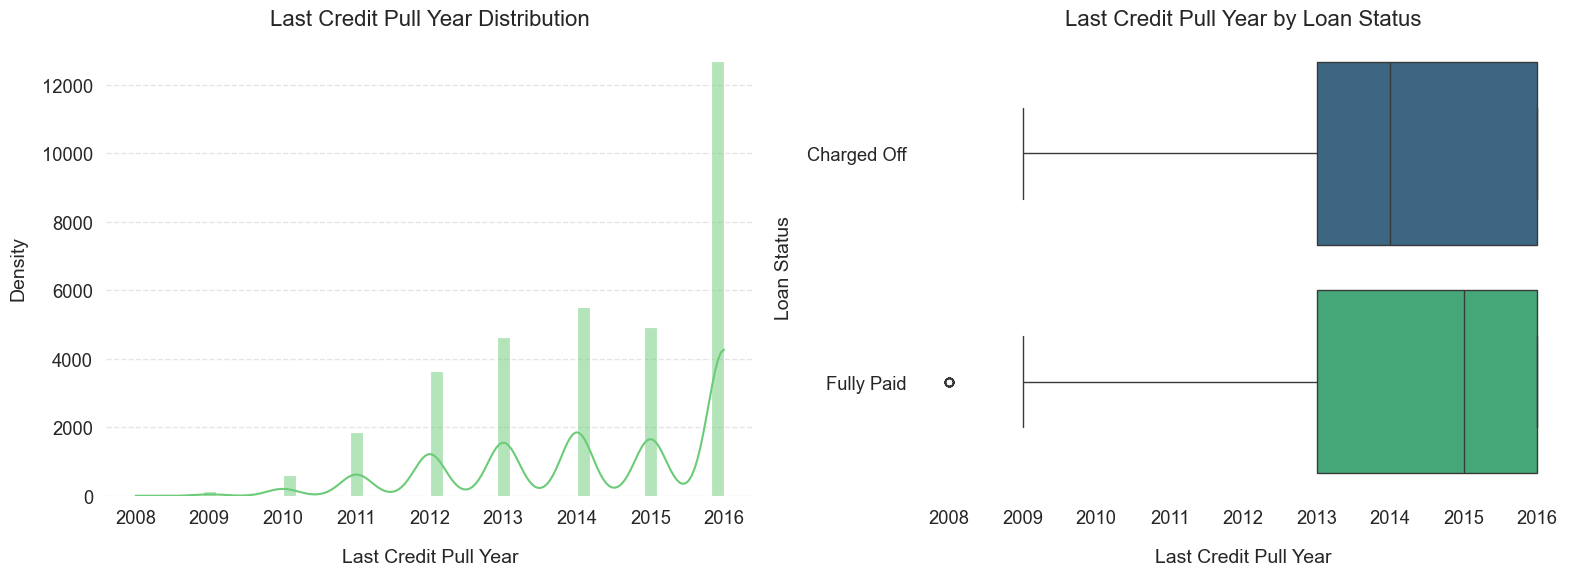

In [330]:
plot_distribution(loan_df, 'last_credit_pull_d_year', 'Last Credit Pull Year')

**Observation:**
-  Lending Club is pulling more credit reports in recent years, suggesting that the company is taking bad loans more seriously
- This variable can be ignored in our analysis.


Derived variable - ratio of loan amount to annual income

#### Derived Features

##### loan_amount_bin

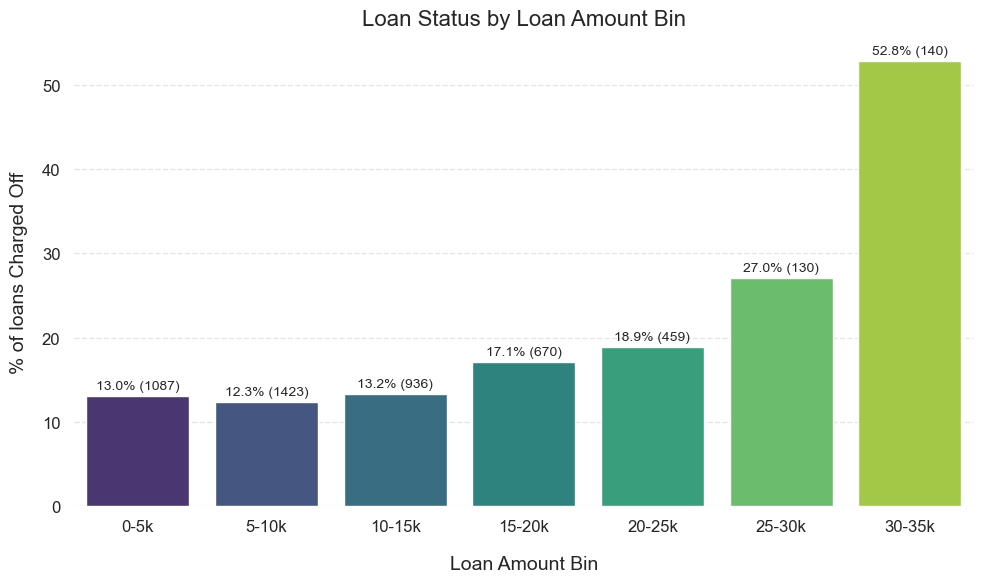

In [335]:
loan_df['loan_amnt_bin'] = pd.cut(
    loan_df['loan_amnt'],
    bins=range(0, 36000, 5000),
    labels=[f'{x}-{5+x}k' for x in range(0, 35, 5)],
    include_lowest=True)
plot_percent_against_loan_status(loan_df, 'loan_amnt_bin', 'Loan Amount Bin')

Observations: <br>

*   As loan amount increase the percentage of loan being charged off also increases
*   People who take loans between \$20,000 to \$35,000 are more likely to be charged-off as there is a higher chance of loan_default
* Loans for small_business already had 26.4% charged off rate will do bivariate analysis to gather more insights

##### interest_rate_buckets

**Definition**<br>
Derived feature by rounding off the interest rate feature (int_rate)

In [339]:
loan_df['interest_rate_buckets'] = round(loan_df['int_rate'])

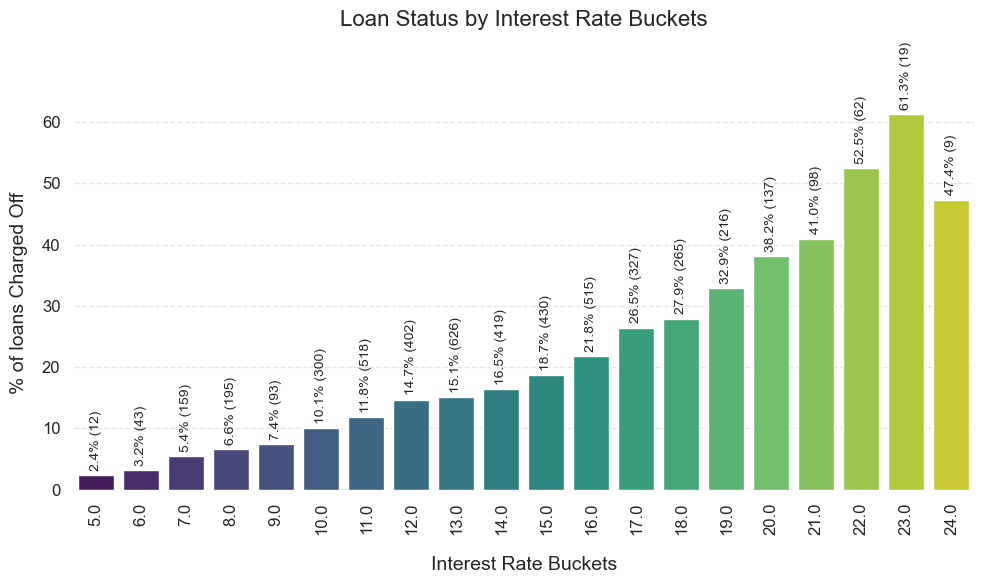

In [340]:
plot_percent_against_loan_status(loan_df, 'interest_rate_buckets', 'Interest Rate Buckets', 90, 50)

##### dti_bin
**Definition**
Bins created from dti column

In [342]:
loan_df['dti_bin'] = pd.cut(loan_df['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

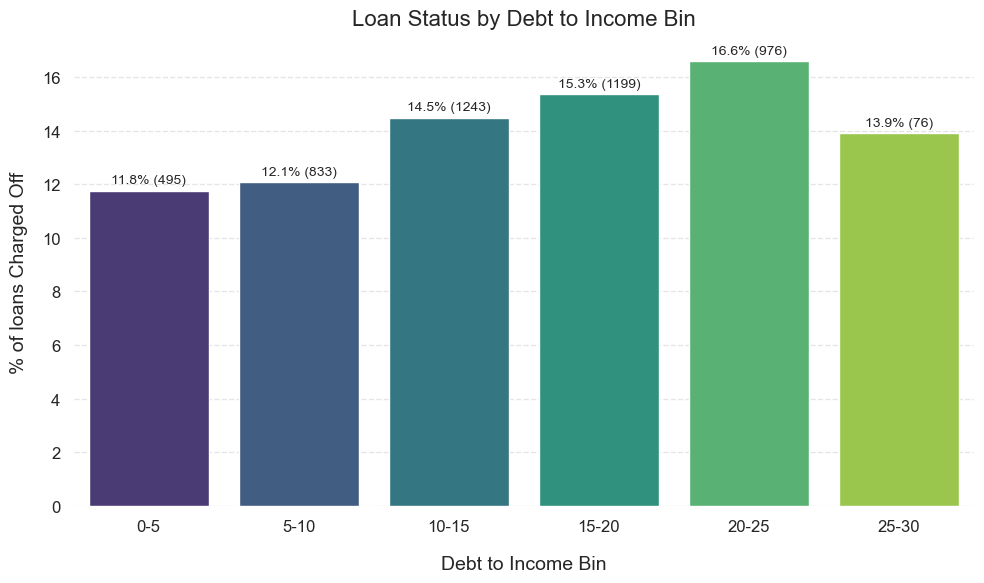

In [343]:
plot_percent_against_loan_status(loan_df, 'dti_bin', 'Debt to Income Bin')

**Observation:**
* When the debt-to-income ratio (DTI) is higher than 20%, a larger percentage of loans are charged off.
* There is a positive correlation between DTI and the likelihood of a loan being charged off—the higher the DTI, the higher the risk of default.
+ However, this risk factor falls below our key risk threshold.

##### loan_to_income_ratio
**Definition**<br>
Column created as a ratio of loan_amnt and annual_ic

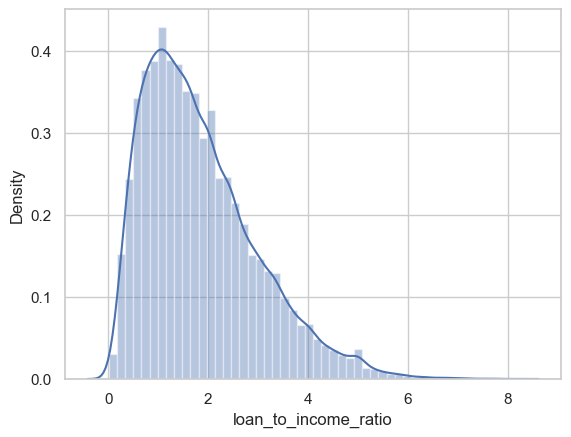

<Figure size 700x500 with 0 Axes>

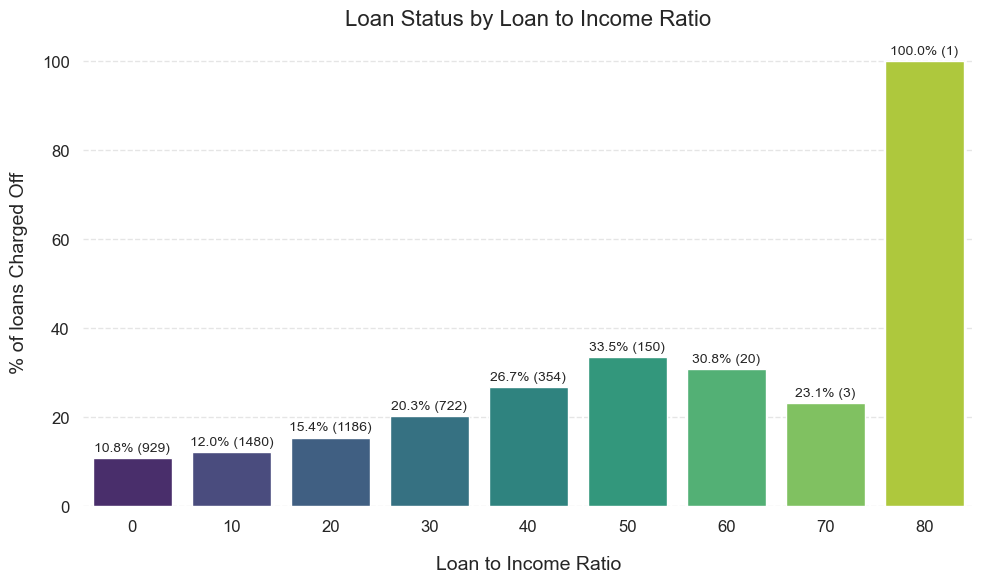

In [346]:
loan_df['loan_to_income_ratio'] = loan_df['loan_amnt'] * 10 / loan_df['annual_inc']
sns.distplot(loan_df['loan_to_income_ratio'])
loan_df['ratio_bin'] = (loan_df['loan_to_income_ratio'].astype(int)) * 10
plt.figure(figsize=(7,5))
plot_percent_against_loan_status(loan_df, 'ratio_bin', 'Loan to Income Ratio')

**Observation:**
*  When the loan-to-income ratio is greater than 20%, there is a significant increase in the charge-off rate.
* <span style='color: red;'>Loan amounts exceeding 30% of annual income exhibit a high rate of default. This variable is considerably above our key risk factor threshold.</span>

### Bivariate Analysis

In [349]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34074 entries, 1 to 39680
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 34074 non-null  int64   
 1   funded_amnt               34074 non-null  int64   
 2   funded_amnt_inv           34074 non-null  float64 
 3   term                      34074 non-null  int32   
 4   int_rate                  34074 non-null  float64 
 5   installment               34074 non-null  float64 
 6   grade                     34074 non-null  object  
 7   emp_title                 34074 non-null  object  
 8   emp_length                34074 non-null  int64   
 9   home_ownership            34074 non-null  object  
 10  annual_inc                34074 non-null  float64 
 11  verification_status       34074 non-null  object  
 12  loan_status               34074 non-null  object  
 13  purpose                   34074 non-null  object  


##### Avg. Loan Amount over time

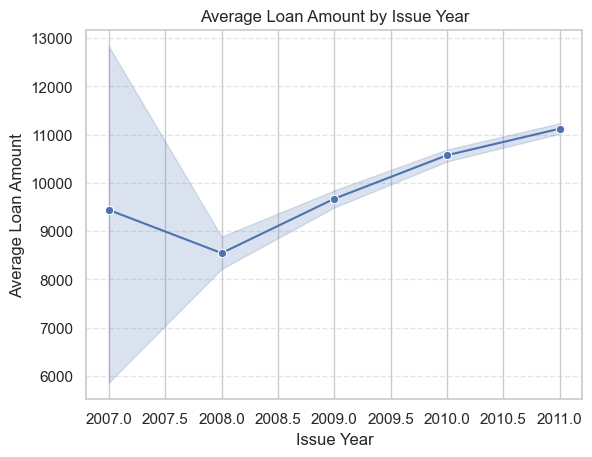

In [351]:
ax = sns.lineplot(x='issue_d_year', y='loan_amnt', data=loan_df, marker='o')
manage_grid_lines(ax)
# Set the title and labels
plt.title('Average Loan Amount by Issue Year')
plt.xlabel('Issue Year')
plt.ylabel('Average Loan Amount')
plt.show()

##### Home ownership vs Loan Status

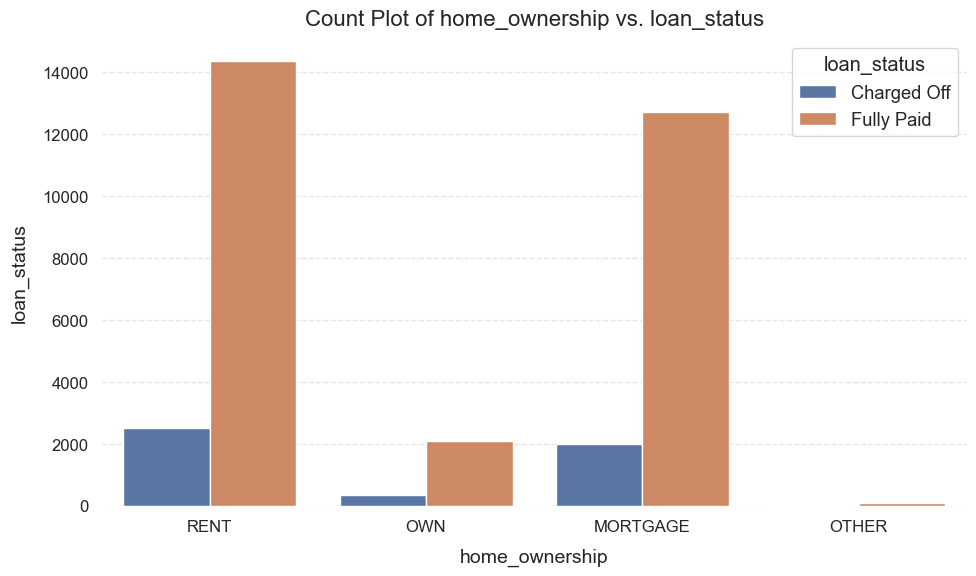

In [353]:
bivariate_analysis(loan_df, 'home_ownership', 'loan_status', 'count', 0)

**Observations:**


* Defaulters are more among the customers who are on RENT or MORTGAGE
* The percentage of defaulters are less than 16% compared to the Fully Paid ones, so we can conclude that this is not deciding factor in identifying the default risk factors




##### Loan Purpose vs Loan Status

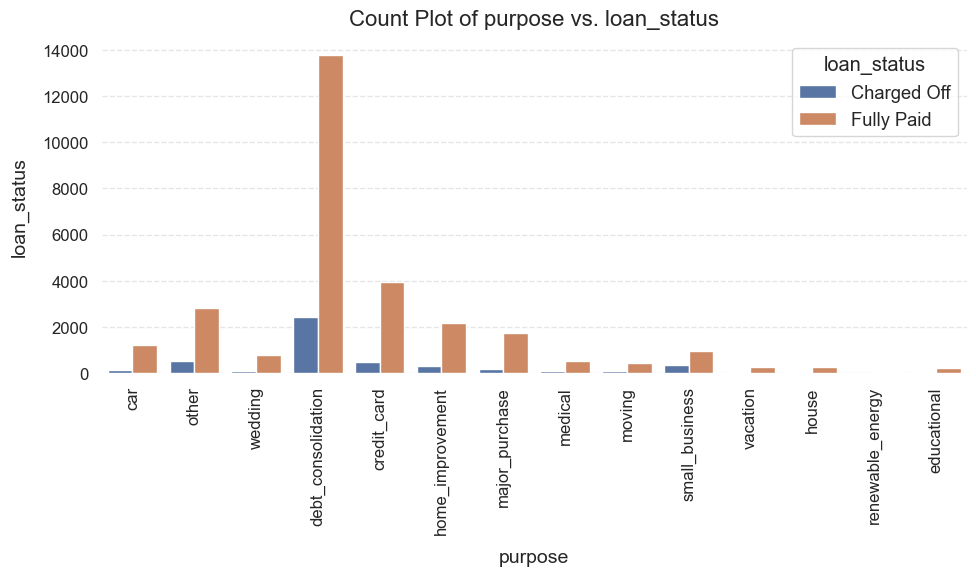

In [356]:
bivariate_analysis(loan_df, 'purpose', 'loan_status', 'count', 90)

**Observations:**


*   Debt consolidation is the main reason for the loan borrowal and the defaulting trend also is higher for the loans taken on this purpose
*   Lending club should be more cautious in lending the loans for debt consolidation


##### Annual Income vs Loan Status

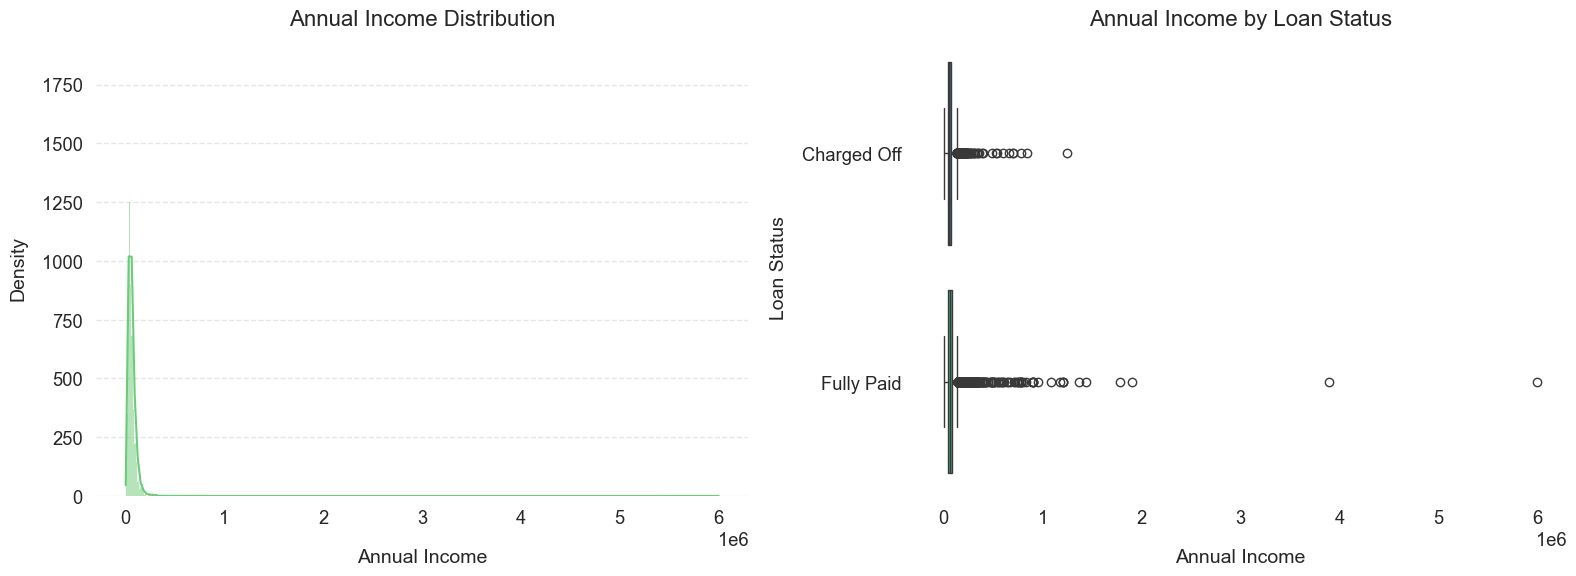

In [359]:
plot_distribution(loan_df, 'annual_inc', 'Annual Income')

**Observations:**
* Borrowers with "Fully Paid" loans have a slightly lower median annual income compared to those with "Charged Off" loans
* The income distribution for "Charged Off" loans appears slightly wider
* There are more high-income outliers in the "Charged Off" category than in the "Fully Paid" category. This suggests that even high-income borrowers can default, although this may be rare.

This tells us that income alone does not seem to be a definitive predictor of loan default, as borrowers with higher incomes also show defaults.


Lets try to combine the annual_income with dti for the curstomer and then do the analysis since it gives the financial status of the customer

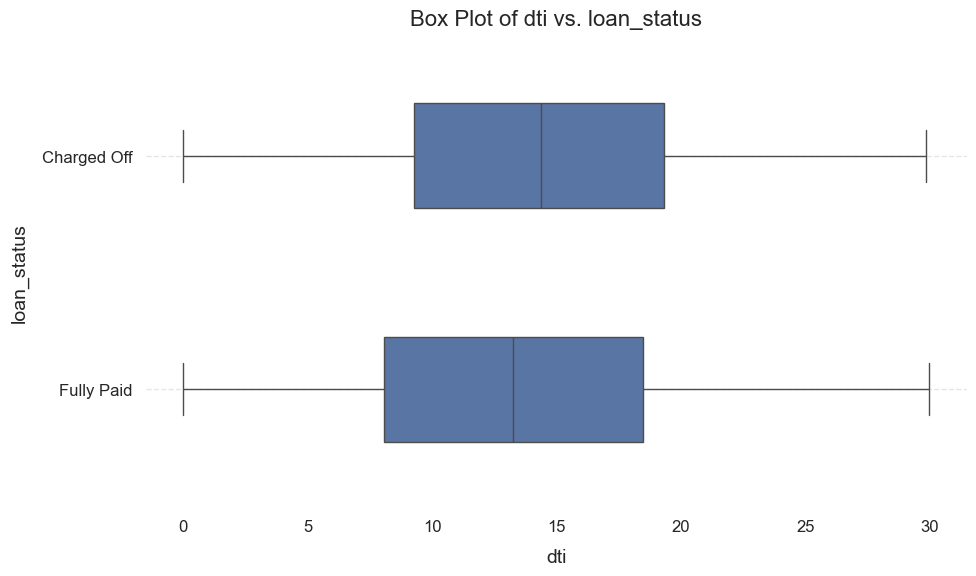

In [361]:
bivariate_analysis(loan_df, 'dti', 'loan_status', 'box')

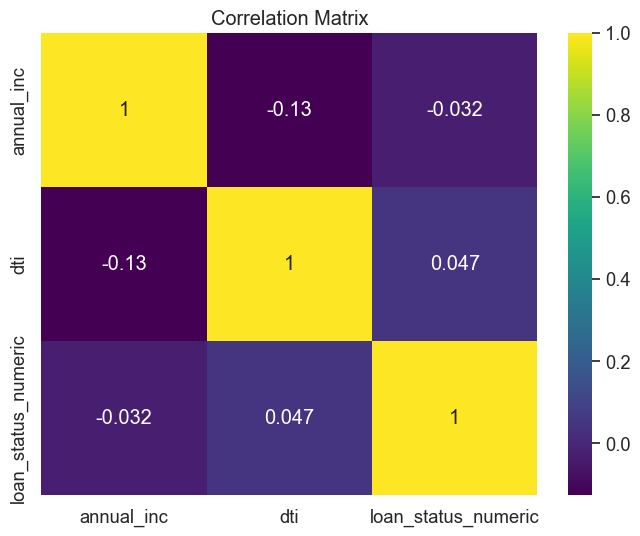

In [362]:
# Map loan_status to numeric for correlation analysis
loan_df['loan_status_numeric'] = loan_df['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

# Select relevant columns for correlation analysis
correlation_columns = ['annual_inc', 'dti', 'loan_status_numeric']

# Compute correlation matrix
correlation_matrix = loan_df[correlation_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

Checking the financial stability of the customers taking loan for debt consolidation

In [364]:
debt_consolidation_df = loan_df[loan_df['purpose'] == 'debt_consolidation']
debt_consolidation_df.groupby('loan_status')[['annual_inc', 'dti']].agg(['mean', 'median'])

annual_inc                 dti       
                     mean   median       mean median
loan_status                                         
Charged Off  61101.014656  54000.0  15.221239  15.54
Fully Paid   65611.095986  57996.0  14.325024  14.40

**Observations:**
* As we can see above, there is a negative correlation between annual_income, dti and the default trend. The higher the income the dti is lower and the chances of loan repayment are more.
* Lending club can consider the financial stability of the customer by checking their income and dti before approving the loan

* Also, we can see that customers who default the loans taken for debt consolidation have lower income and higher dti. These three factors should be considered
while approving the loan

##### Loan status vs Loan attributes

##### Loan amount and interest rate

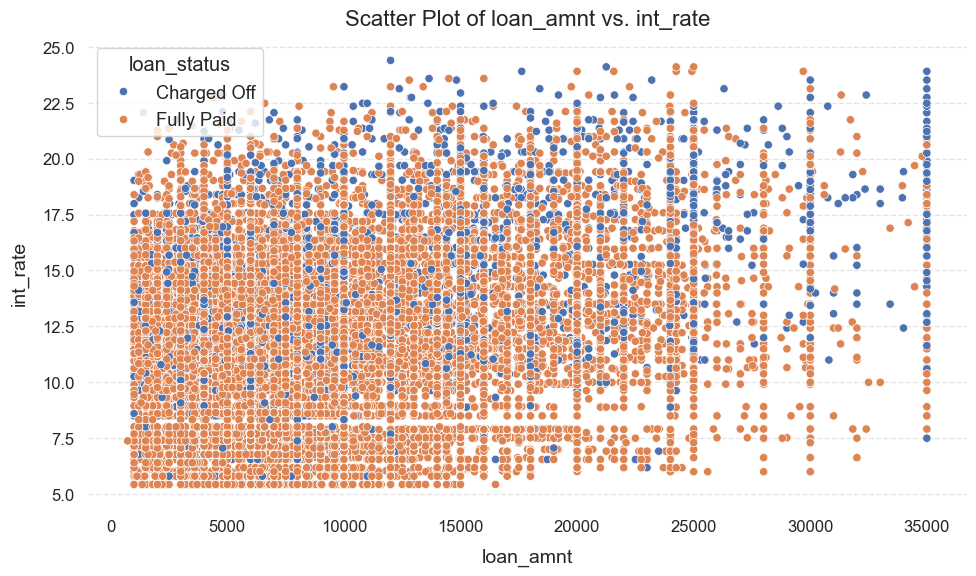

In [368]:
# Checking the defaulting trends based on the loan amount and the interest rate
bivariate_analysis(loan_df, 'loan_amnt', 'int_rate', 'scatter',hue='loan_status')

**Observations:**
* We can see that the full paid and the charged off loans are spread across the loan_amnt range. The number of loans are lesser on the higher amount range
* As the interest gets higher, the chances of being charged off is high

To avoid loss for the lending club, the interest rates should be decided based on the other factors like dti. For higher dti where the default chances are high, it would be good to charge higher interest rates to recover the cost

##### Defaulting based on the loan grade

As part of the Univariate analysis earlier, we have seen that the charged-off percentage is higher when the grade is low (A being highest and G being lowest). Lets find the relation between grade and other variables

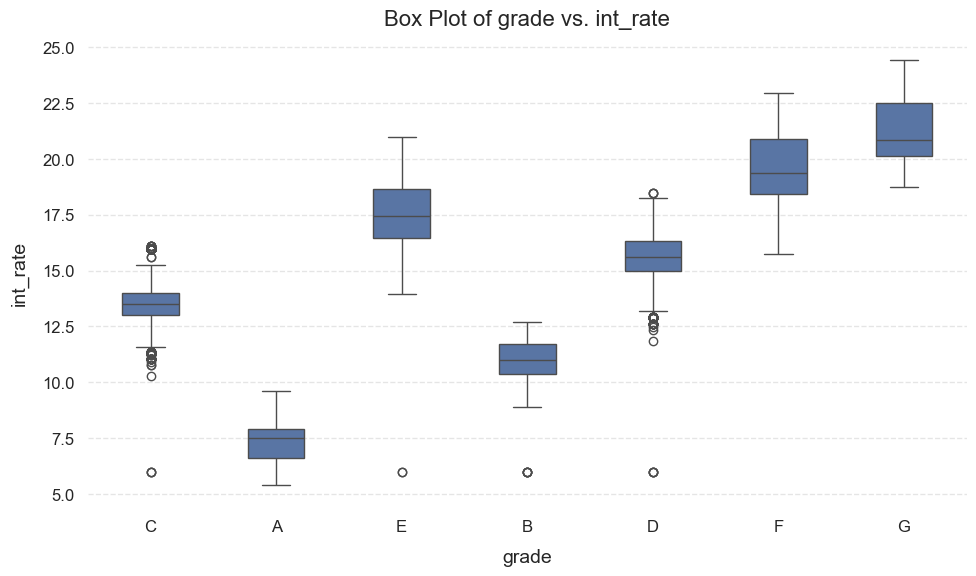

In [371]:
bivariate_analysis(loan_df, 'grade', 'int_rate', 'box')

As we can see above, the interest rate seems to be higher for the lower grade. This aligns with the fact that when interest rate goes up default chances are high.

So the loans with higher grade has lower interest rate and less chances of being defaulted.

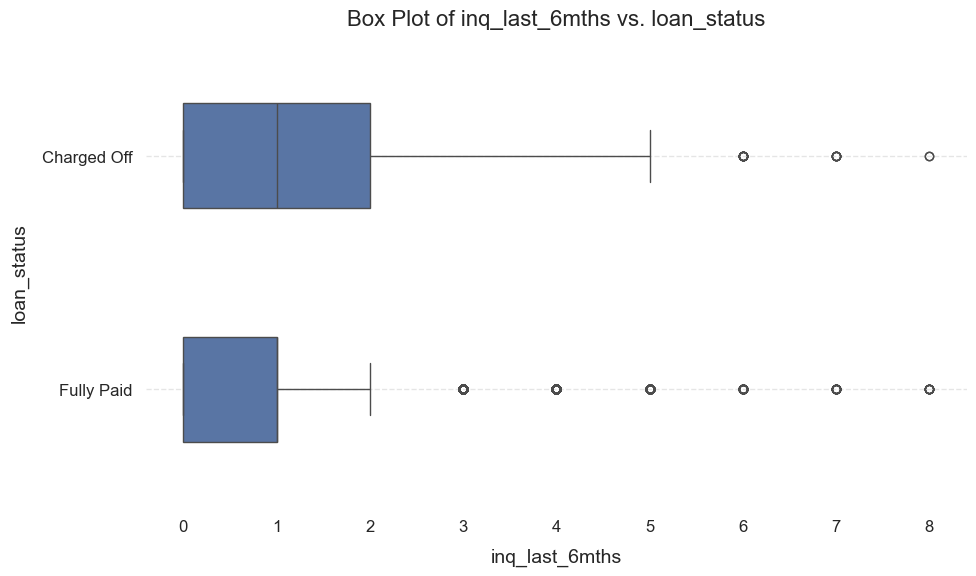

In [373]:
bivariate_analysis(loan_df, 'inq_last_6mths', 'loan_status', 'box')

There is a clear relationship between loans being charged off and the inquiries on the customer

**Bi-variate analysis Observations**
* 60-month term loans have a higher percentage of charged-off loans compared to 36-month term loans
*  The charge-off percentage increases as loan grades decline
* "Debt Consolidation" is the primary driver for both loan origination and charge-offs, while "Small Business" loans have a higher charge-off representation of more than one fourth of small business loans being charged off
* As annual income increases the charge off rate reduces
* The default risk is higher for the customers who take the loans for the purpose = 'debt consolidation' and where the annual income is lower and dti is higher
* As the interest rate goes up, the tendency to default also increases. Since grading is linked to the interest rate, there is a chance of high default rates with lower grades (D-G)
* The defaulters are more on the customers who are on RENT or MORTGAGE
* The customers with the history of public bankruptcies have high default rate, so this aspect should have a strict validation before the approval


### Multivariate Analysis

##### Loan Grade vs Term vs Purpose

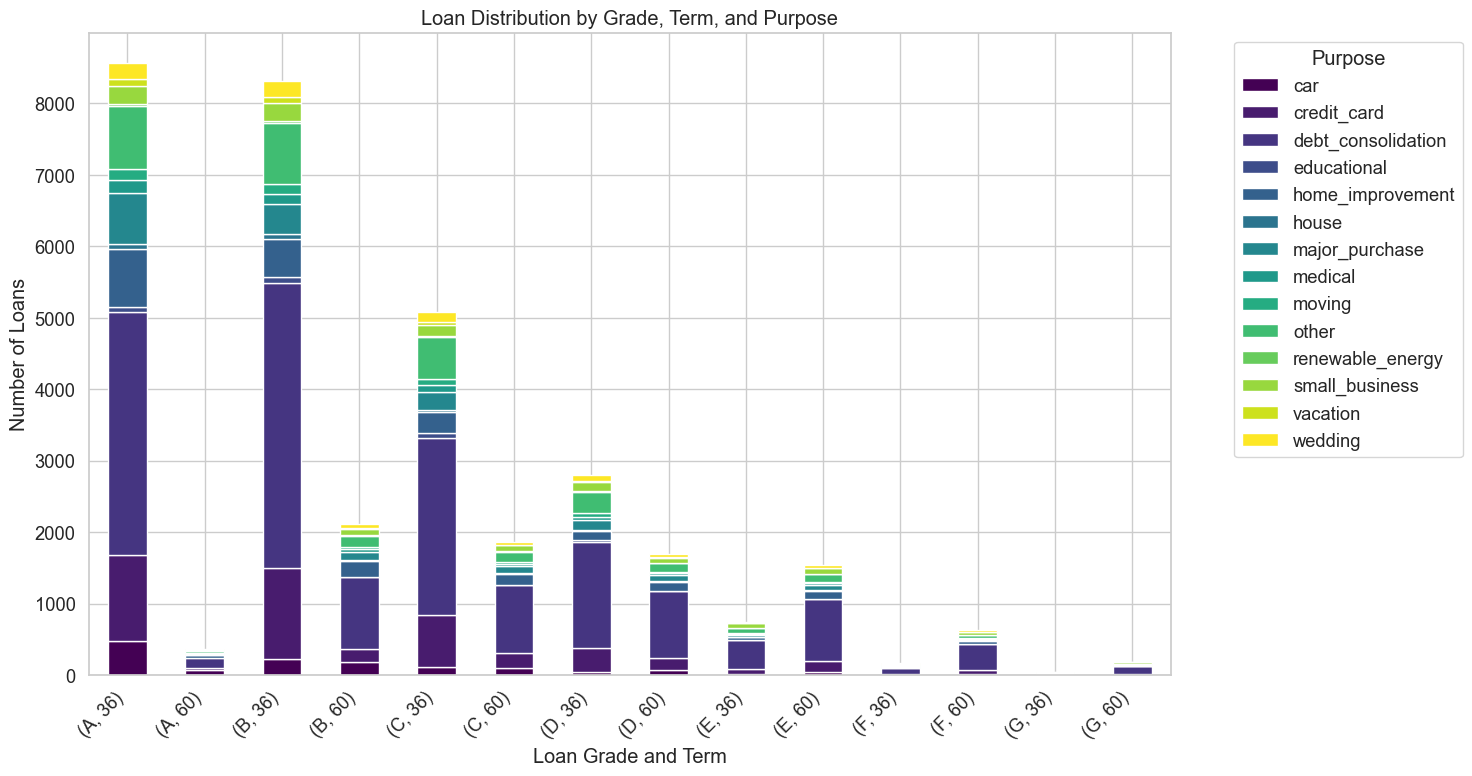

In [588]:
# Group data by 'grade', 'term', and 'purpose', then get counts
grouped_data = loan_df.groupby(['grade', 'term', 'purpose'])['loan_amnt'].count().reset_index()
grouped_data = grouped_data.rename(columns={'loan_amnt': 'count'})

# Pivot the data to create a suitable format for stacked bar chart
pivoted_data = grouped_data.pivot_table(index=['grade', 'term'], columns='purpose', values='count', fill_value=0)

# Create the stacked bar chart
ax = pivoted_data.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')

plt.title('Loan Distribution by Grade, Term, and Purpose')
plt.xlabel('Loan Grade and Term')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Purpose', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 

plt.show()

**Observations**
* Grade: Loans are heavily concentrated in the higher grades (A, B, C), with a significant drop-off as the grade worsens. This suggests that lenders are primarily approving loans for borrowers with better creditworthiness.
* Term: 36-month loans are significantly more common than 60-month loans across all grades. This indicates a preference for shorter-term lending.
* Purpose: Debt consolidation is the most common loan purpose across almost all grades and terms. This highlights a trend of borrowers using loans to manage existing debt.
* As grade decreases: The number of loans decreases, and the purpose distribution becomes more diverse

<Figure size 640x480 with 0 Axes>

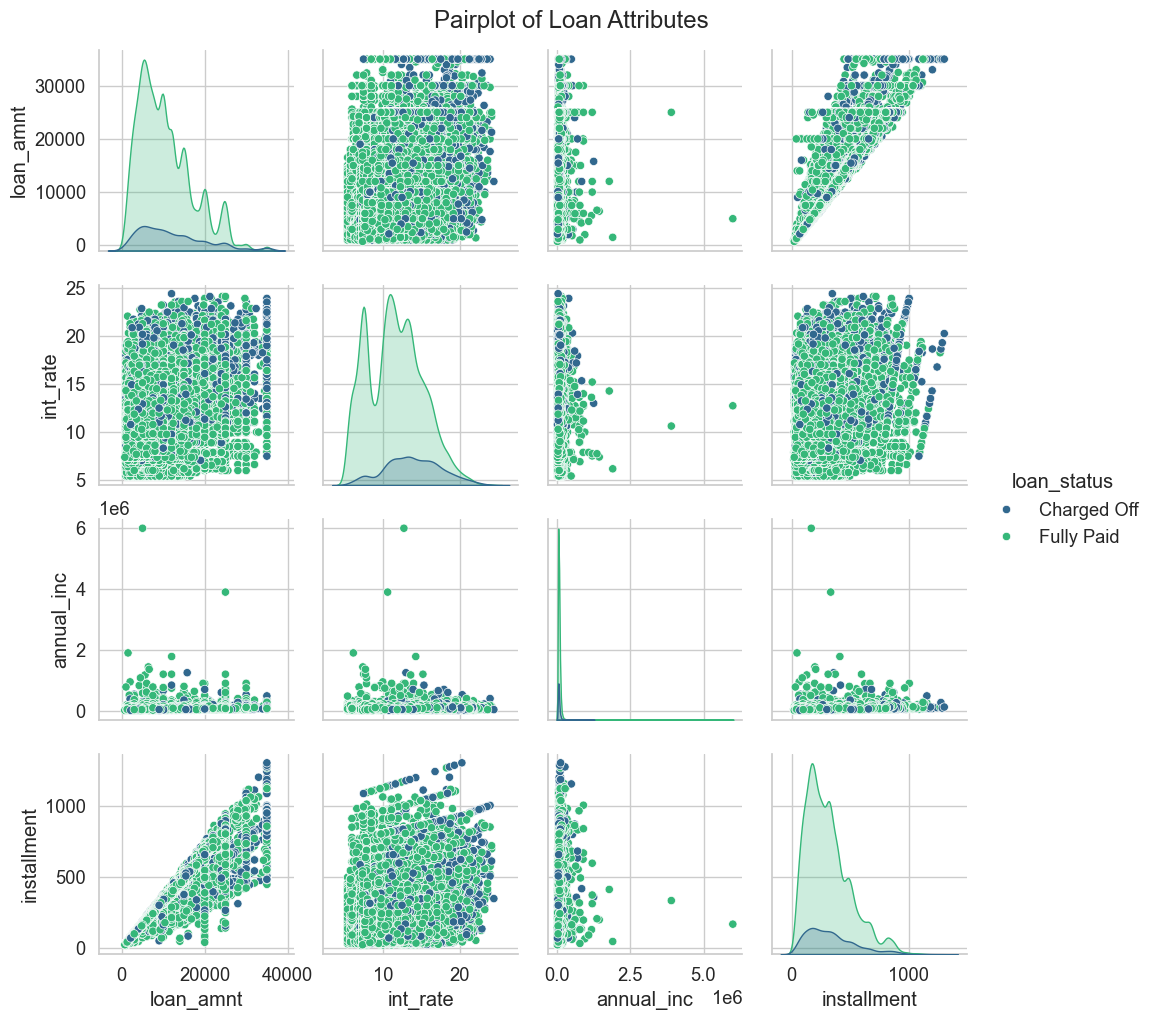

In [377]:
sns.despine(left=True, bottom=True)
sns.pairplot(data=loan_df[['loan_amnt', 'int_rate', 'annual_inc', 'installment', 'loan_status']],
             hue='loan_status',diag_kind='kde', palette='viridis')
plt.suptitle('Pairplot of Loan Attributes', y=1.02)
plt.show()

**Observations**
* Across most plots, there isn't a clear visual separation between charged-off and fully paid loans. This suggests that these attributes alone might not be strong predictors of loan status. However, some subtle trends might exist:
      Potentially higher interest rates for charged-off loans in some cases or Possibly a higher concentration of charged-off loans among lower income borrowers

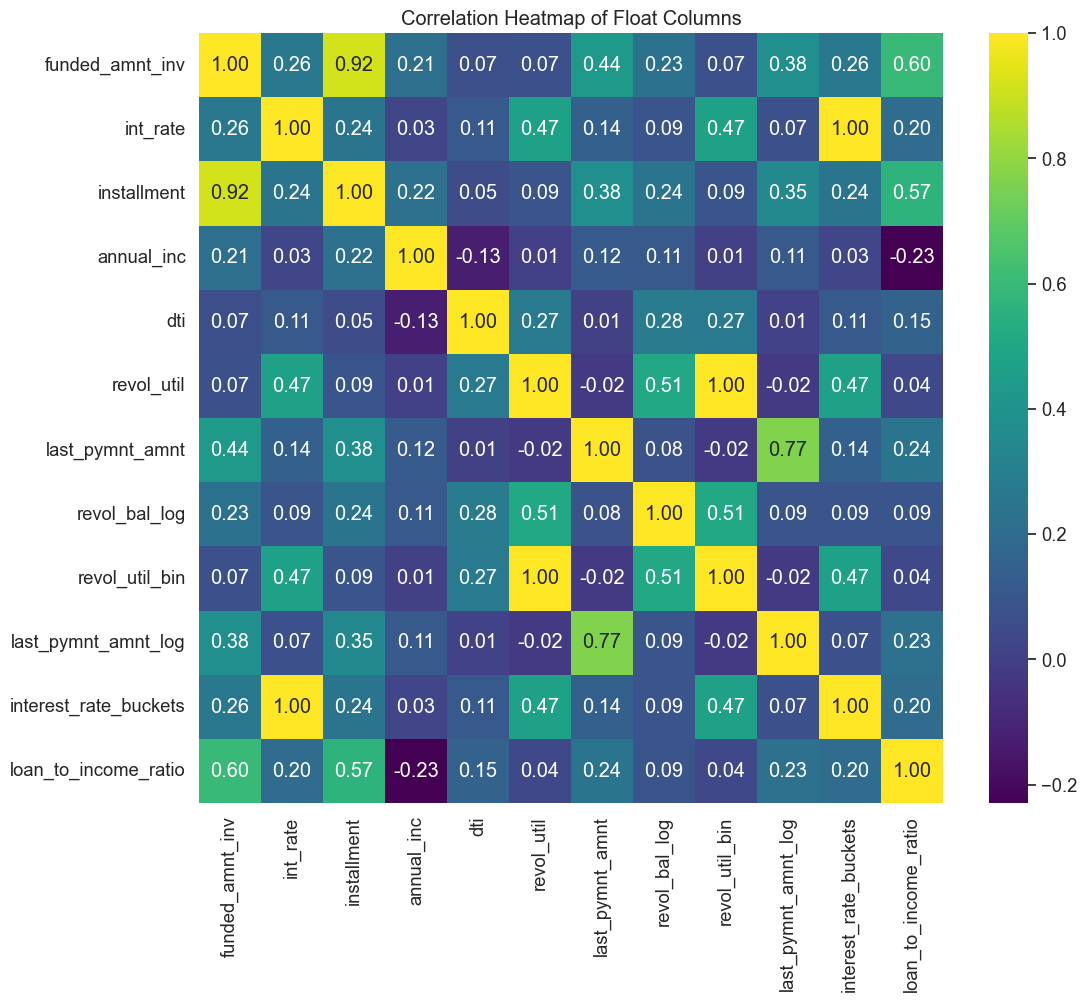

In [578]:
float_cols = loan_df.select_dtypes(include=['float64']).columns

# Calculate the correlation matrix
corr_matrix = loan_df[float_cols].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Float Columns')
plt.show()

**Observations**
**Strong Positive Correlations**

* funded_amnt_inv & installment (0.92): The amount of money invested in a loan is highly correlated with the monthly installment amount. This makes sense as larger loans generally have larger installments.
* funded_amnt_inv & loan_amnt (1.00): Perfect correlation, indicating these two variables are likely the same or directly proportional.
* installment & loan_amnt (0.92): Similar to the first point, confirming the strong link between loan amount and installment.
* last_pymnt_amnt & last_pymnt_amnt_log (0.77): The last payment amount and its logarithmic transformation are naturally highly correlated.